In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 680.05it/s]
100%|██████████| 720/720 [00:08<00:00, 89.78it/s] 
8280it [00:00, 242313.37it/s]
7920it [00:00, 247361.27it/s]
720it [00:00, 797.44it/s]
100%|██████████| 720/720 [00:07<00:00, 93.02it/s] 
8280it [00:00, 264885.23it/s]
720it [00:00, 818.57it/s]
100%|██████████| 720/720 [00:07<00:00, 91.87it/s] 
8280it [00:00, 84315.60it/s]
700it [00:00, 842.31it/s]
100%|██████████| 700/700 [00:07<00:00, 99.35it/s] 
8280it [00:00, 246965.89it/s]
509it [00:00, 1188.64it/s]
100%|██████████| 509/509 [00:02<00:00, 190.05it/s]
3664it [00:00, 247307.41it/s]
700it [00:00, 848.03it/s]
100%|██████████| 700/700 [00:07<00:00, 96.96it/s] 
8280it [00:00, 254884.94it/s]
700it [00:00, 780.25it/s]
100%|██████████| 700/700 [00:07<00:00, 96.89it/s] 
8280it [00:00, 261213.35it/s]
710it [00:01, 399.86it/s]
100%|██████████| 710/710 [00:07<00:00, 94.30it/s] 
8280it [00:00, 245239.37it/s]
710it [00:01, 401.63it/s]
100%|██████████| 710/710 [00:07<00:00, 97.18it/s] 
8280it [00:00, 241103.83it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'opt_type': 'AdamW',
 'lr': 0.0001,
 'weight_decay': 0.0001,
 'amsgrad': False,
 'nesterov': False,
 'momentum': 0.9,
 'centered': False,
 'min_lr': 1e-06,
 'factor': 0.5,
 'patience': 5}

In [13]:
train_conf

{'num_epochs': 200, 'device': 'cuda:0'}

In [14]:
train_conf['device'] = 'cpu'
model_conf['device'] = 'cpu'
device = 'cpu'

In [15]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.25581


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.079803


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.088381


100%|██████████| 248/248 [00:19<00:00, 12.68it/s]


Mean val loss: 0.070369


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084379


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.07349
EarlyStopping counter: 1 out of 10
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082074


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.055683


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.080983


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.054796


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.079752


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.048992


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078858


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.049059


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077419


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.046212


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077009


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.046244


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07623


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.039359


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.075075


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039903
EarlyStopping counter: 1 out of 10
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074924


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.051737
EarlyStopping counter: 2 out of 10
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074603


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.037879


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073449


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.034816


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073714


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.032704


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073642


100%|██████████| 248/248 [00:19<00:00, 12.68it/s]


Mean val loss: 0.032561


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073114


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035408
EarlyStopping counter: 1 out of 10
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073084


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.033161
EarlyStopping counter: 2 out of 10
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.072742


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03873
EarlyStopping counter: 3 out of 10
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07216


100%|██████████| 248/248 [00:19<00:00, 12.69it/s]


Mean val loss: 0.031387


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.072572


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035068
EarlyStopping counter: 1 out of 10
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073534


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.028925


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071798


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030905
EarlyStopping counter: 1 out of 10
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071496


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.034213
EarlyStopping counter: 2 out of 10
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071668


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.028814


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071973


100%|██████████| 248/248 [00:19<00:00, 15.23it/s]


Mean val loss: 0.028361


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071588


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030632
EarlyStopping counter: 1 out of 10
Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071029


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.027082


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071145


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.027996
EarlyStopping counter: 1 out of 10
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071379


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.026817


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070897


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02883
EarlyStopping counter: 1 out of 10
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070833


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.029393
EarlyStopping counter: 2 out of 10
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070767


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035981
EarlyStopping counter: 3 out of 10
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070401


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.02586


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070911


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03086
EarlyStopping counter: 1 out of 10
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069998


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.038781
EarlyStopping counter: 2 out of 10
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070344


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025985
EarlyStopping counter: 3 out of 10
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070014


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.025218


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069733


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025796
EarlyStopping counter: 1 out of 10
Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070012


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026815
EarlyStopping counter: 2 out of 10
Epoch 40...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069421


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.02511


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 41...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069315


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.024053


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 42...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069092


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024637
EarlyStopping counter: 1 out of 10
Epoch 43...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069388


100%|██████████| 248/248 [00:19<00:00, 15.14it/s]


Mean val loss: 0.024103


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069105


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026514
EarlyStopping counter: 1 out of 10
Epoch 45...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068271


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.027574
EarlyStopping counter: 2 out of 10
Epoch 46...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067768


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025036
EarlyStopping counter: 3 out of 10
Epoch 47...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068575


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024637
EarlyStopping counter: 4 out of 10
Epoch 48...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068148


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025125
EarlyStopping counter: 5 out of 10
Epoch 49...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068255


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026093
EarlyStopping counter: 6 out of 10
Epoch 50...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067986


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025725
EarlyStopping counter: 7 out of 10
Epoch 51...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067646


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.024021


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 52...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068056


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023967


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067685


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.023643


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067281


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024207
EarlyStopping counter: 1 out of 10
Epoch 55...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067245


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023369


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 56...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067198


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023518
EarlyStopping counter: 1 out of 10
Epoch 57...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067265


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023102


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 58...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067179


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02331
EarlyStopping counter: 1 out of 10
Epoch 59...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06666


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.022866


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 60...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066606


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026216
EarlyStopping counter: 1 out of 10
Epoch 61...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066477


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022933


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066566


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024198
EarlyStopping counter: 1 out of 10
Epoch 63...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066542


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023532
EarlyStopping counter: 2 out of 10
Epoch 64...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066439


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022796


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 65...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066081


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023589
EarlyStopping counter: 1 out of 10
Epoch 66...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066926


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.022759


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 67...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065846


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023361
EarlyStopping counter: 1 out of 10
Epoch 68...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066548


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026039
EarlyStopping counter: 2 out of 10
Epoch 69...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066099


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022965
EarlyStopping counter: 3 out of 10
Epoch 70...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065527


100%|██████████| 248/248 [00:19<00:00, 12.70it/s]


Mean val loss: 0.022662


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065572


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.02249


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066093


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022761
EarlyStopping counter: 1 out of 10
Epoch 73...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065445


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023336
EarlyStopping counter: 2 out of 10
Epoch 74...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065023


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022634
EarlyStopping counter: 3 out of 10
Epoch 75...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066282


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024856
EarlyStopping counter: 4 out of 10
Epoch 76...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065378


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023669
EarlyStopping counter: 5 out of 10
Epoch 77...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065892


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023013
EarlyStopping counter: 6 out of 10
Epoch 78...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065468


100%|██████████| 248/248 [00:19<00:00, 15.29it/s]


Mean val loss: 0.02237


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 79...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065509


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022189


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065604
Epoch    80: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022682
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065066


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.022093


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 82...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06524


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022974
EarlyStopping counter: 1 out of 10
Epoch 83...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064284


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.02219


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 84...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064941


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.022338


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 86...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063959


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022535
EarlyStopping counter: 1 out of 10
Epoch 87...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064762


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.022109


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 88...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063948


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.022001


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 89...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064536


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022341
EarlyStopping counter: 1 out of 10
Epoch 90...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06509


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022123
EarlyStopping counter: 2 out of 10
Epoch 91...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064057


100%|██████████| 248/248 [00:19<00:00, 12.72it/s]


Mean val loss: 0.021836


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 92...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065005


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.021815


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 93...


 32%|███▏      | 83/259 [00:18<00:37,  4.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063244


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021439


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 112...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063608


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021434


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 113...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063165


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021535
EarlyStopping counter: 1 out of 10
Epoch 114...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063478


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021417


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 115...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063798


100%|██████████| 248/248 [00:19<00:00, 15.17it/s]


Mean val loss: 0.021498


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 116...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063898
Epoch   116: reducing learning rate of group 0 to 6.2500e-06.


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.021487


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 117...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063595


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021415


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 118...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064099


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.021446


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 119...


  9%|▉         | 24/259 [00:06<00:48,  4.88it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063636


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.021343


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063356


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.021362


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 138...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062871


100%|██████████| 248/248 [00:19<00:00, 12.56it/s]


Mean val loss: 0.021363


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 139...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062214


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021354


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 140...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063262


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021345


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 141...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062807


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021389


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 142...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063032


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021349


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 143...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063789


 43%|████▎     | 107/248 [00:09<00:10, 13.48it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063643


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.02135


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062969


100%|██████████| 248/248 [00:19<00:00, 15.26it/s]


Mean val loss: 0.021332


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 163...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06288


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021335


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 164...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062397


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.021331


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062517


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.02133


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 166...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063309


100%|██████████| 248/248 [00:19<00:00, 12.55it/s]


Mean val loss: 0.021342


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 167...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062943


100%|██████████| 248/248 [00:19<00:00, 12.57it/s]


Mean val loss: 0.021324


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 168...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063188


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021348


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 169...


 25%|██▌       | 65/259 [00:14<00:41,  4.64it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021351


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0633


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021335


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063167


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021316


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06346


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021351


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063225


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021319


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063288


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.021317


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 192...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06274


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021323


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 193...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062662


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021323


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 194...


 68%|██████▊   | 175/259 [00:37<00:17,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [67]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [68]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'rb') as f:
#     results = pickle.load(f)

In [17]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name']), map_location=device))

<All keys matched successfully>

## Train and validation losses

In [18]:
from itertools import chain

In [19]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [20]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

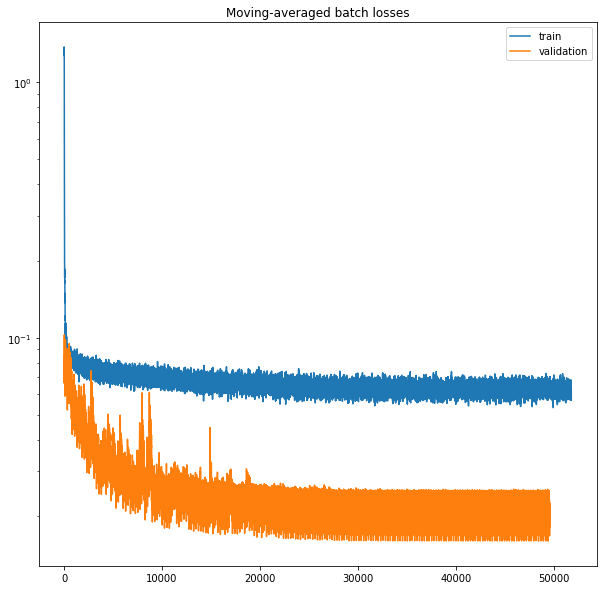

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

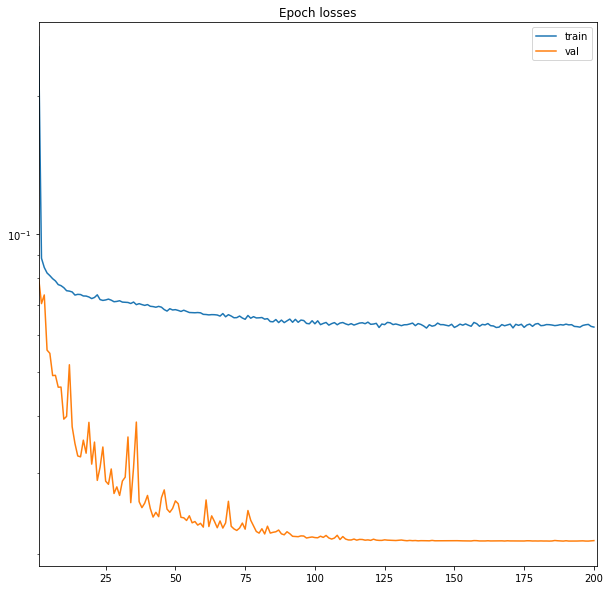

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [19]:
import os

In [20]:
import torch

In [21]:
from visualization_utils import output_to_binary, plot_sample

In [22]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

In [23]:
device

'cpu'

carb96558


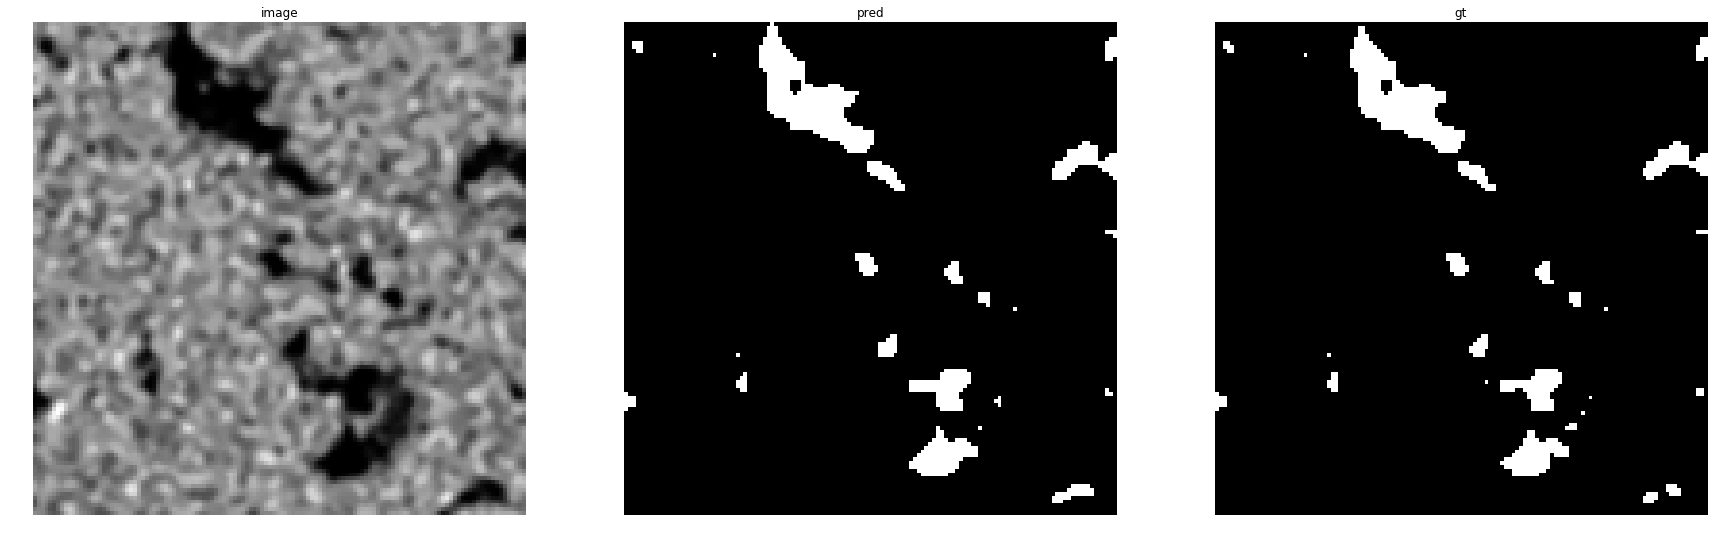

accuracy    : 0.9962158203125
precision   : 0.9449838187702265
recall      : 0.9875986471251409
f1          : 0.9658213891951488
pr_auc      : 0.9969125284124004
iou         : 0.9339019189765458


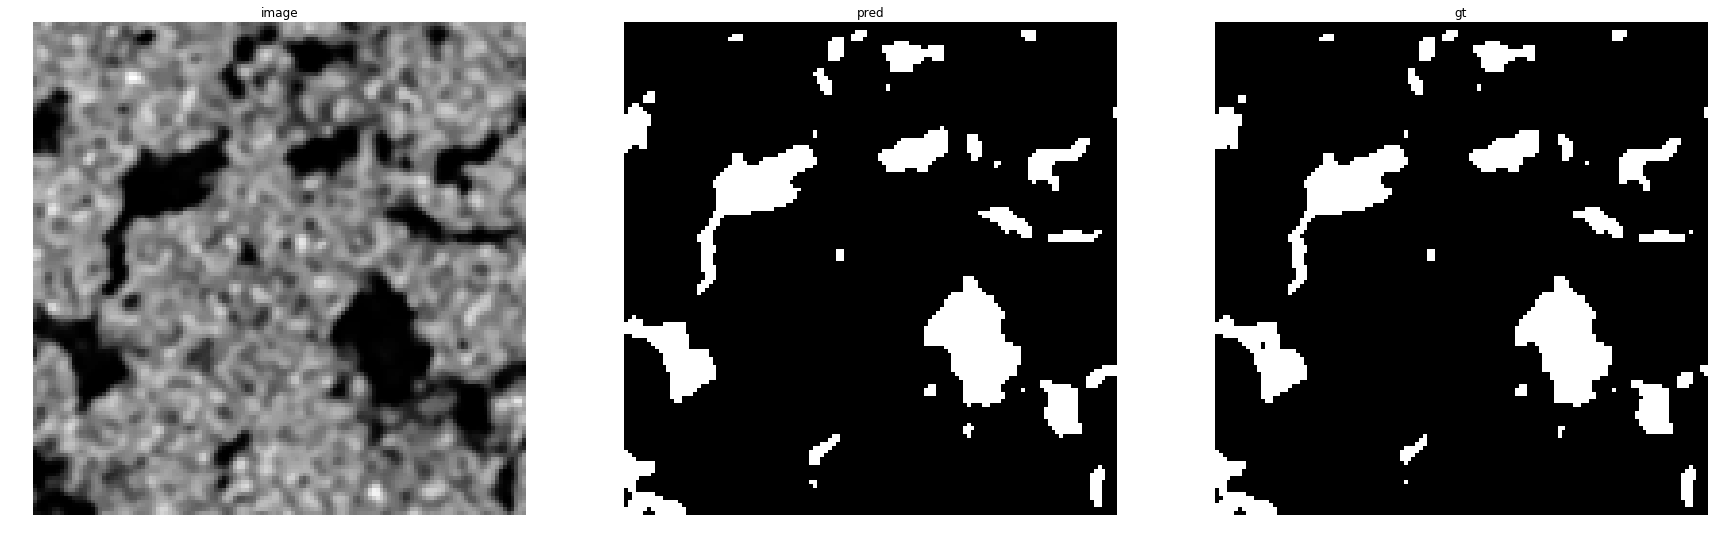

accuracy    : 0.9947509765625
precision   : 0.9615576635047429
recall      : 0.9953488372093023
f1          : 0.978161503301168
pr_auc      : 0.9988509950972937
iou         : 0.9572564612326043


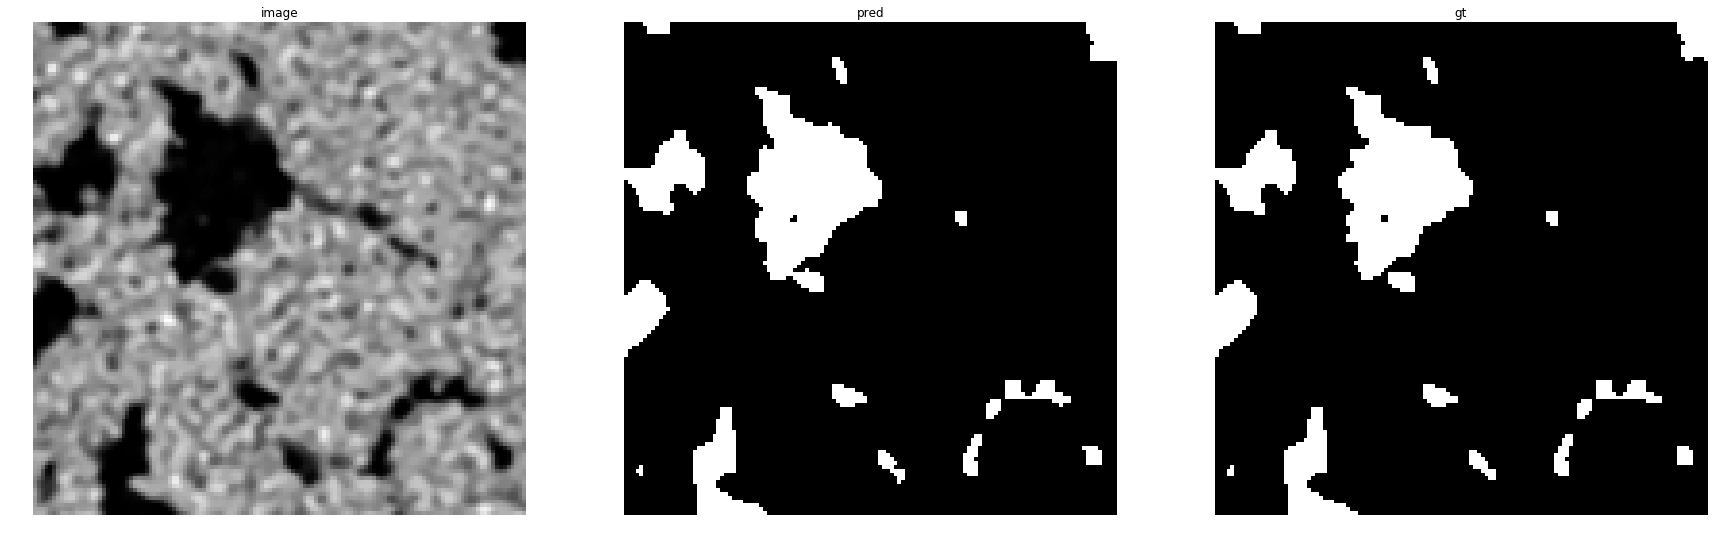

accuracy    : 0.99676513671875
precision   : 0.9770173646578141
recall      : 0.9958355023425299
f1          : 0.9863366847125548
pr_auc      : 0.9995278002718667
iou         : 0.9730417090539166


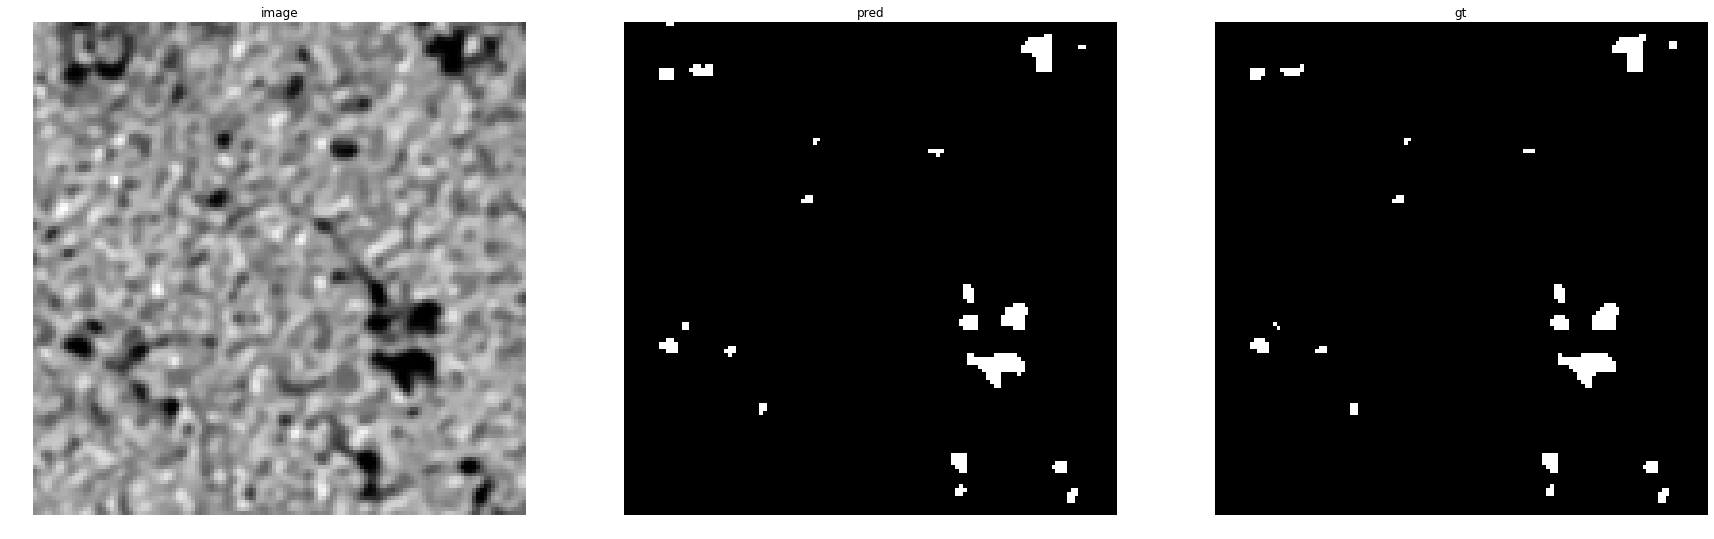

accuracy    : 0.9981689453125
precision   : 0.9385113268608414
recall      : 0.9634551495016611
f1          : 0.9508196721311475
pr_auc      : 0.9947472713259587
iou         : 0.90625


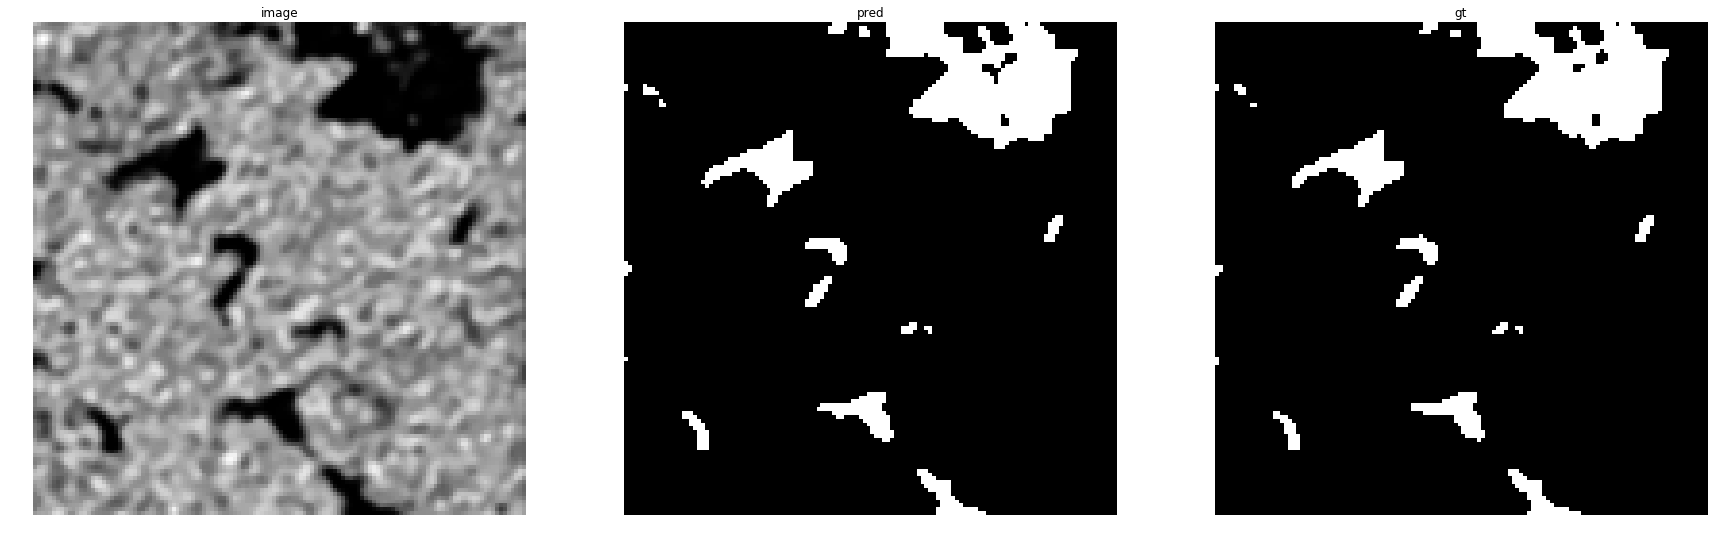

accuracy    : 0.9964599609375
precision   : 0.9732654360280076
recall      : 0.9896440129449838
f1          : 0.9813863928112965
pr_auc      : 0.9988799856024518
iou         : 0.9634530560806553


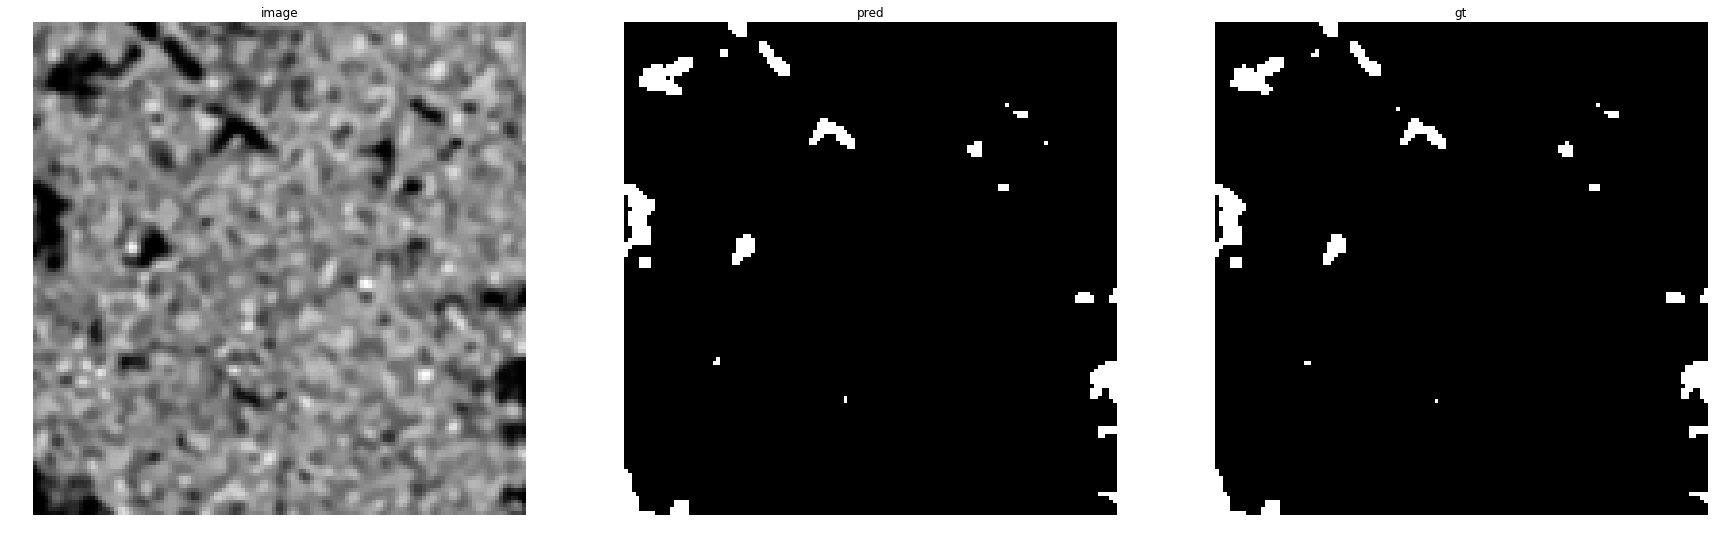

accuracy    : 0.9984130859375
precision   : 0.9596774193548387
recall      : 0.9875518672199171
f1          : 0.9734151329243355
pr_auc      : 0.9968633735653564
iou         : 0.9482071713147411


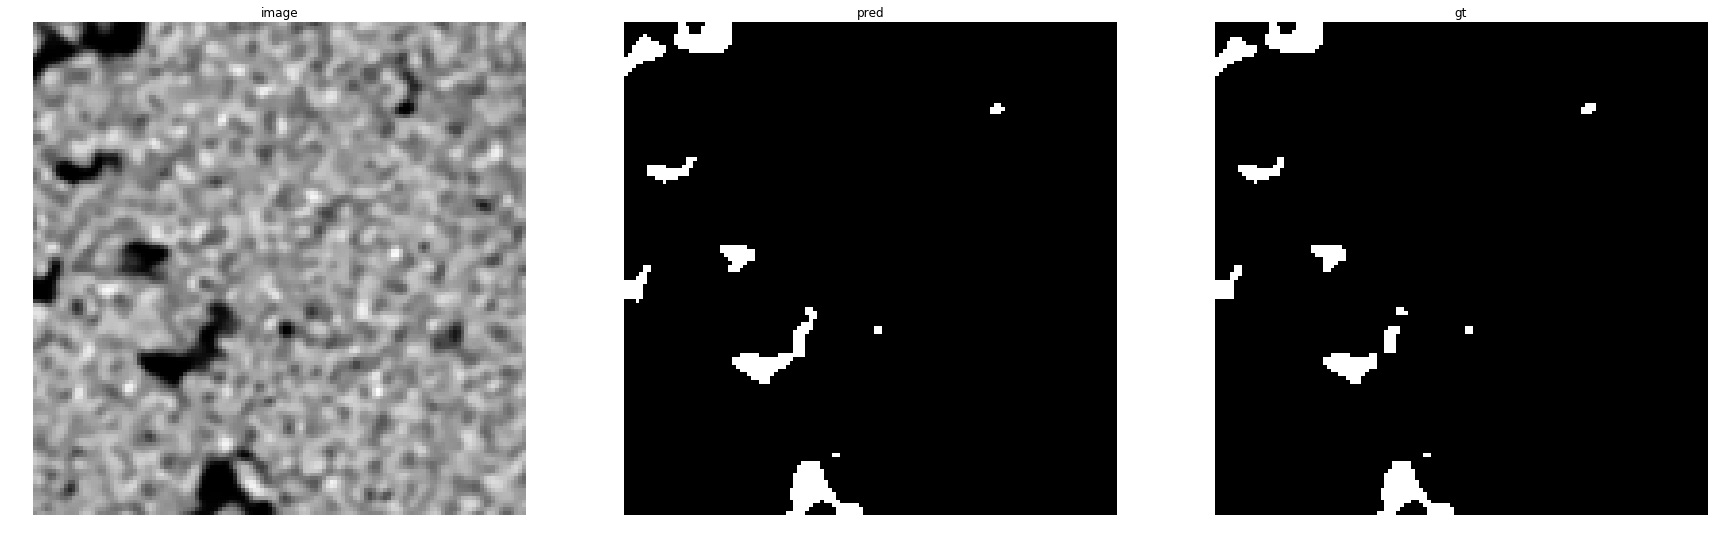

accuracy    : 0.9979248046875
precision   : 0.9422718808193669
recall      : 0.9941060903732809
f1          : 0.9674952198852772
pr_auc      : 0.9980328925519708
iou         : 0.937037037037037


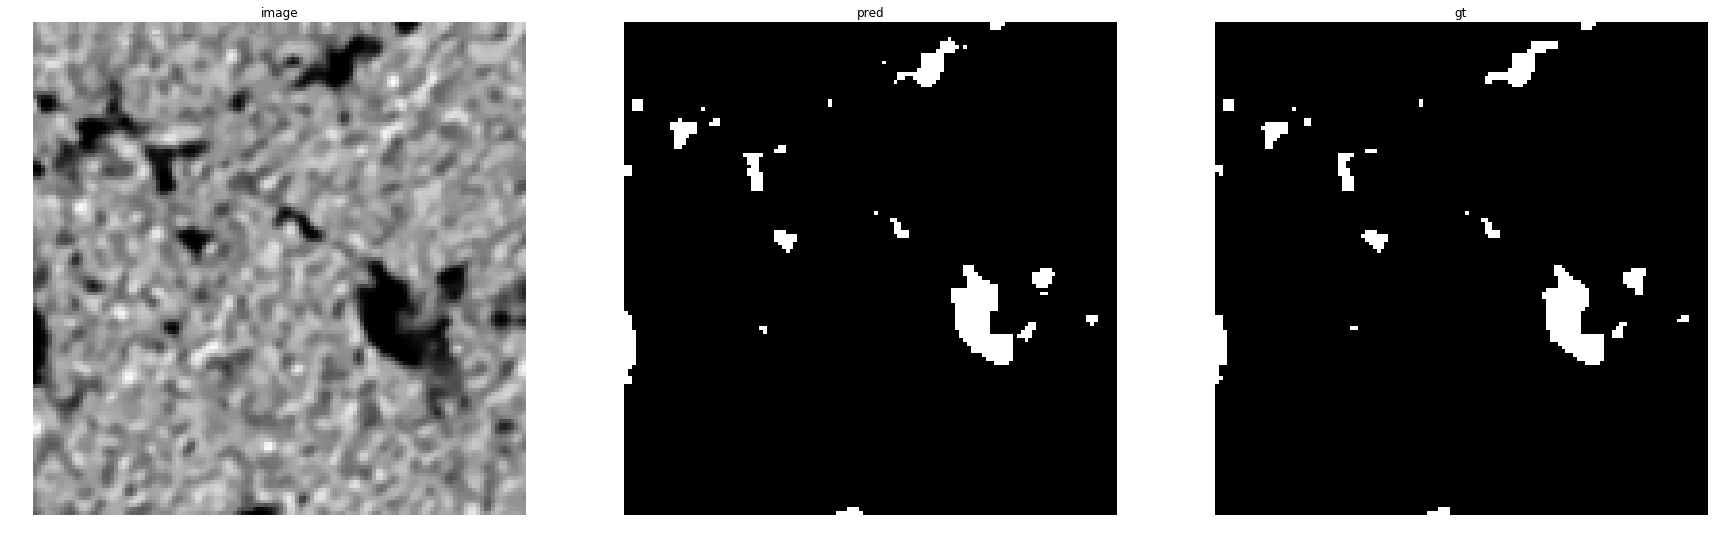

accuracy    : 0.9971923828125
precision   : 0.945054945054945
recall      : 0.9699248120300752
f1          : 0.9573283858998144
pr_auc      : 0.9945715211713695
iou         : 0.9181494661921709


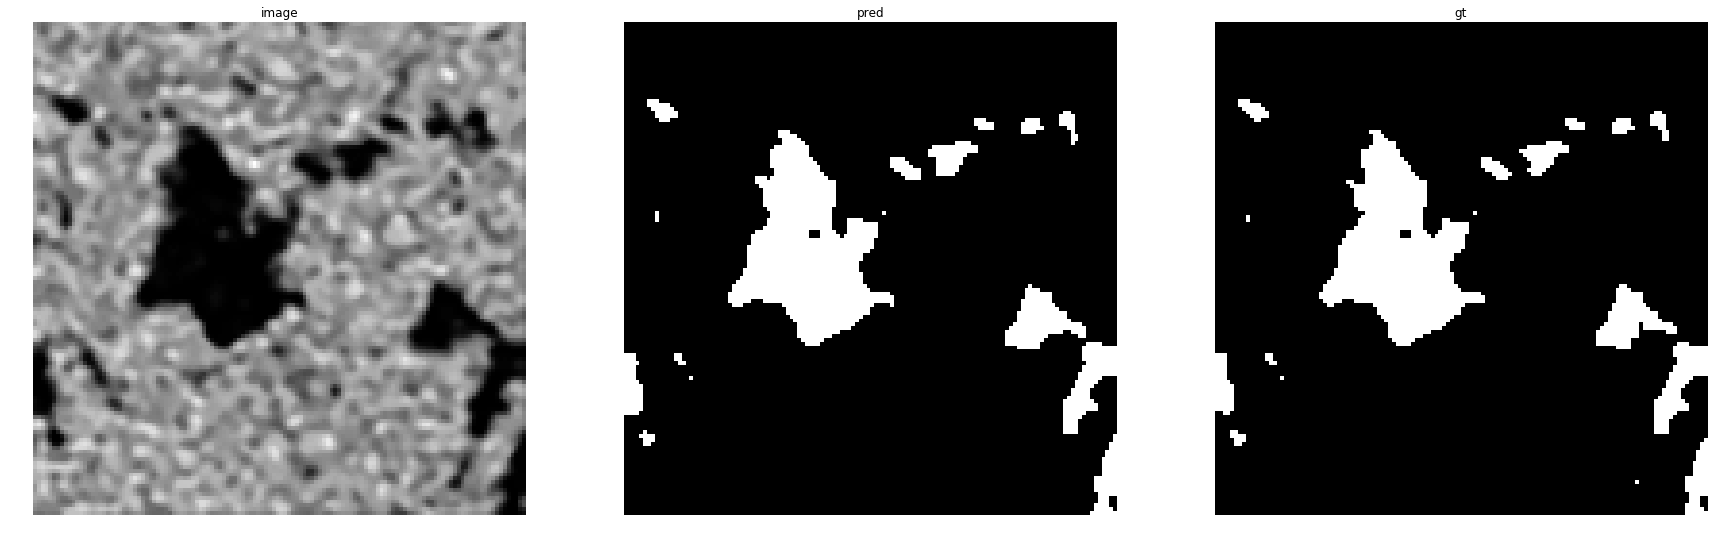

accuracy    : 0.99627685546875
precision   : 0.9695350080171031
recall      : 0.9977997799779978
f1          : 0.9834643534833288
pr_auc      : 0.9991182043350124
iou         : 0.9674666666666667


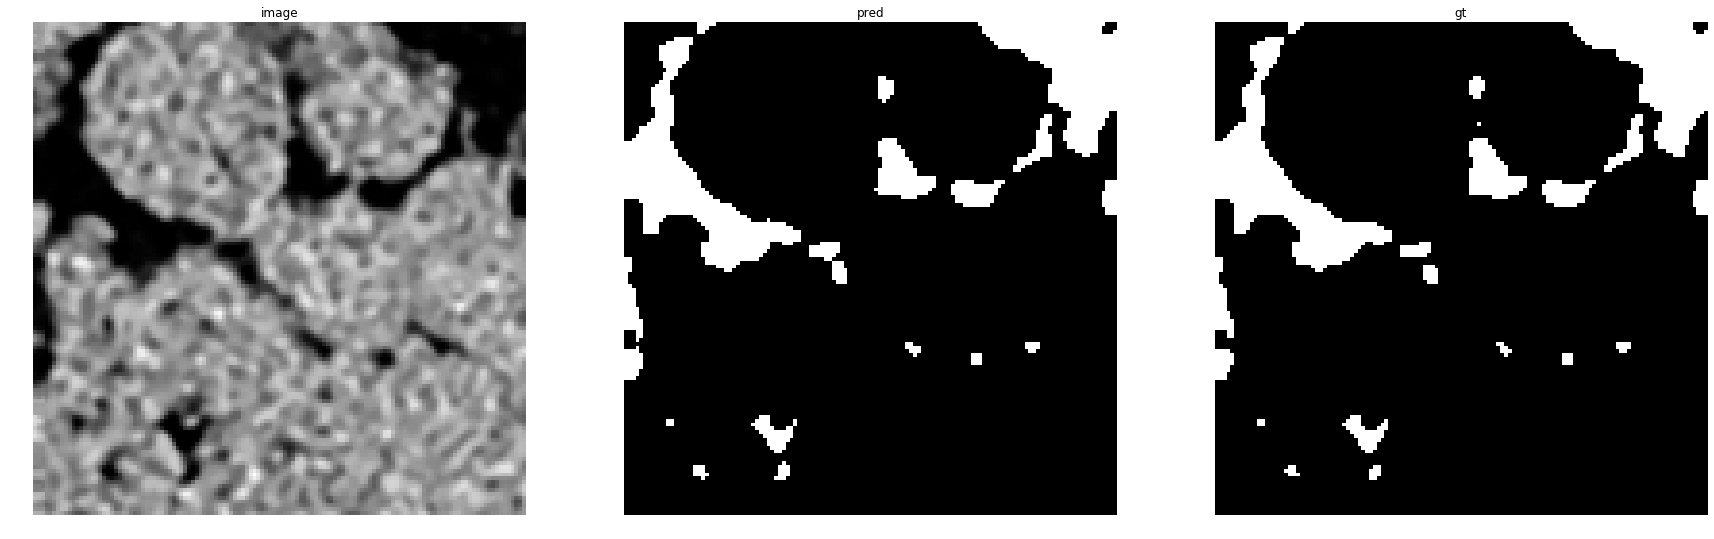

accuracy    : 0.99652099609375
precision   : 0.9781420765027322
recall      : 0.9934409687184662
f1          : 0.9857321652065082
pr_auc      : 0.9994294793140523
iou         : 0.9718657453109576
carb71


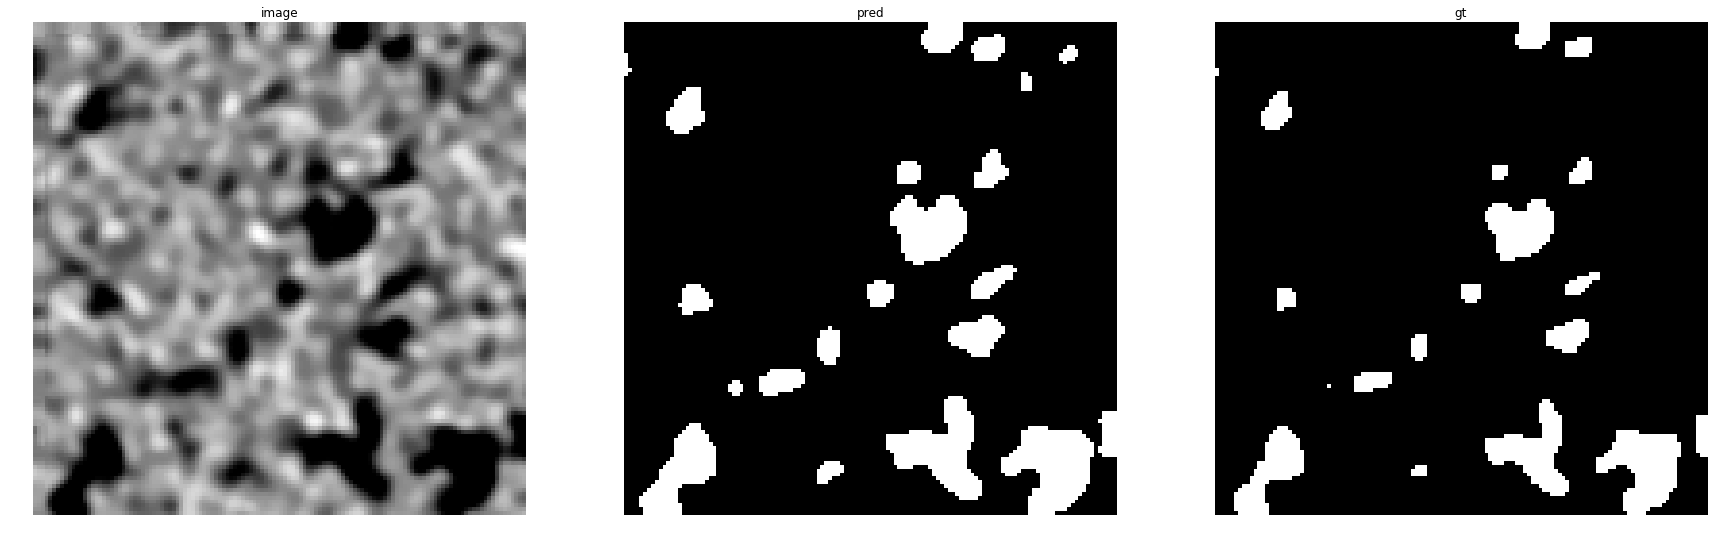

accuracy    : 0.9639892578125
precision   : 0.7030699547055863
recall      : 1.0
f1          : 0.8256501182033097
pr_auc      : 0.9957431998542603
iou         : 0.7030699547055863


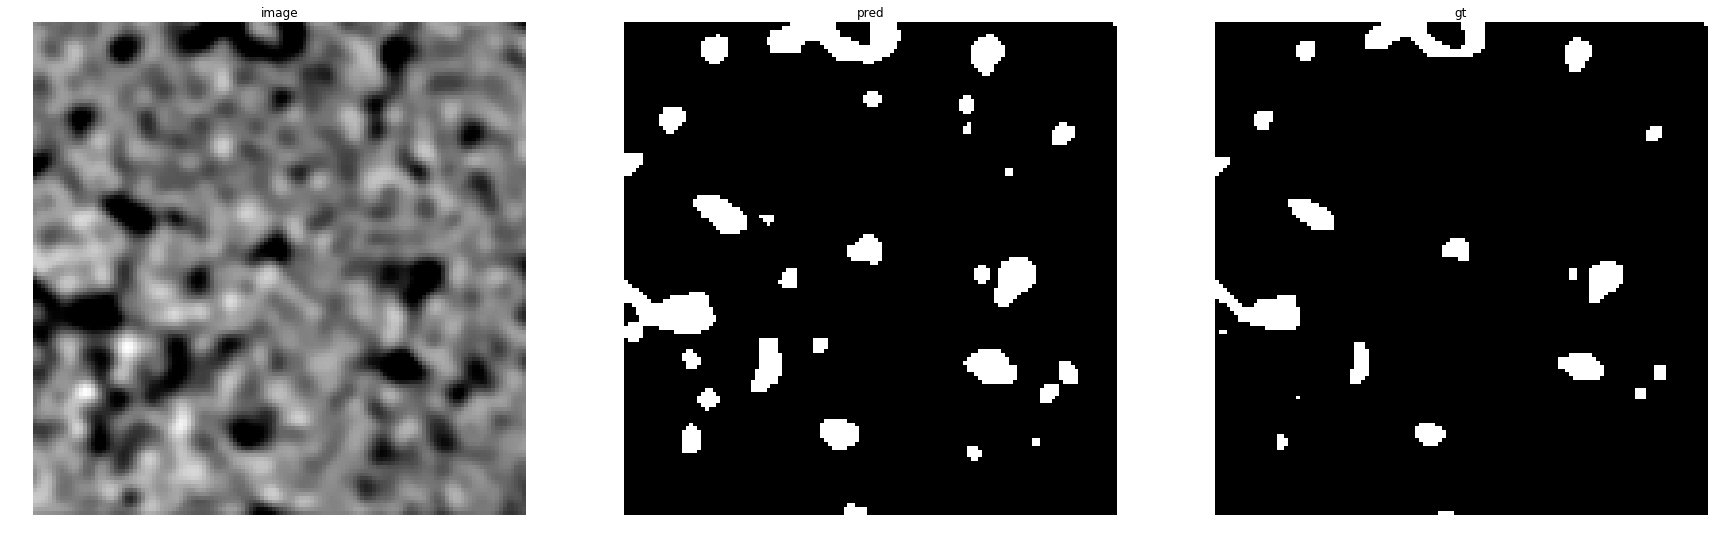

accuracy    : 0.96392822265625
precision   : 0.5704941860465116
recall      : 1.0
f1          : 0.7265155020823693
pr_auc      : 0.9799419714215298
iou         : 0.5704941860465116


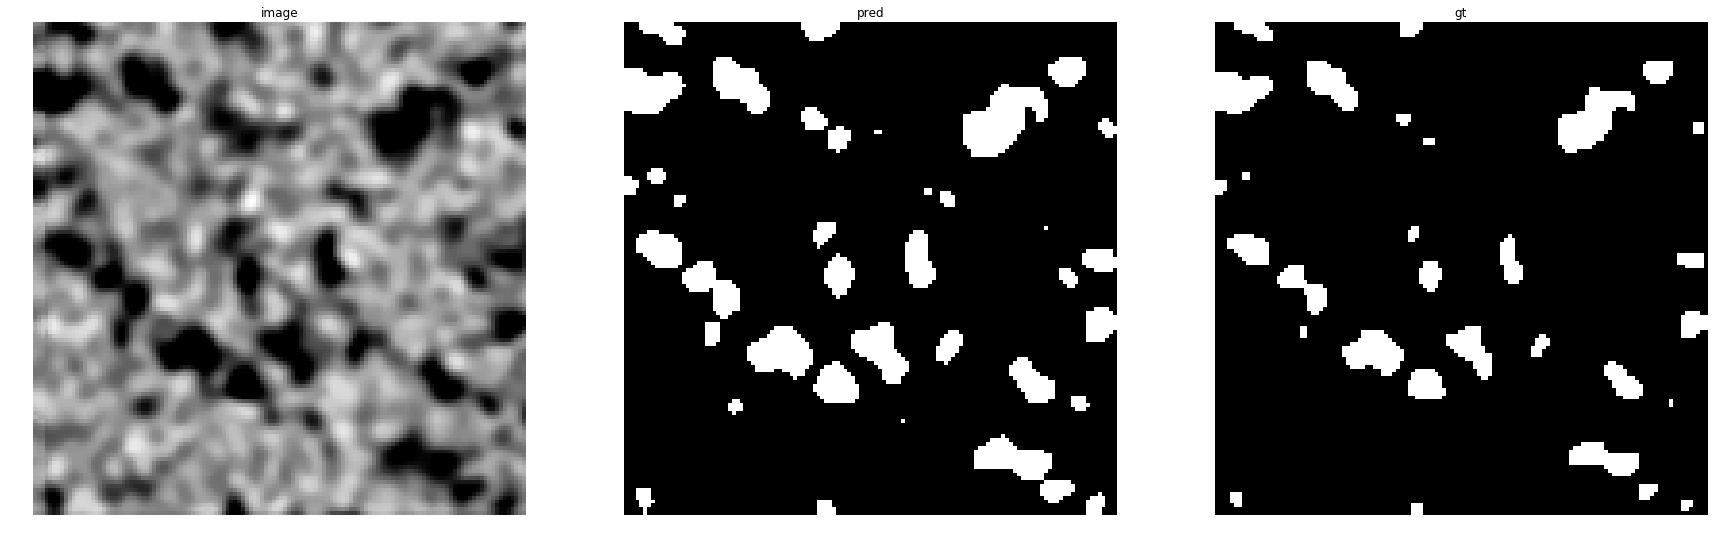

accuracy    : 0.95220947265625
precision   : 0.6363214119832792
recall      : 1.0
f1          : 0.7777462390008516
pr_auc      : 0.9898681616131395
iou         : 0.6363214119832792


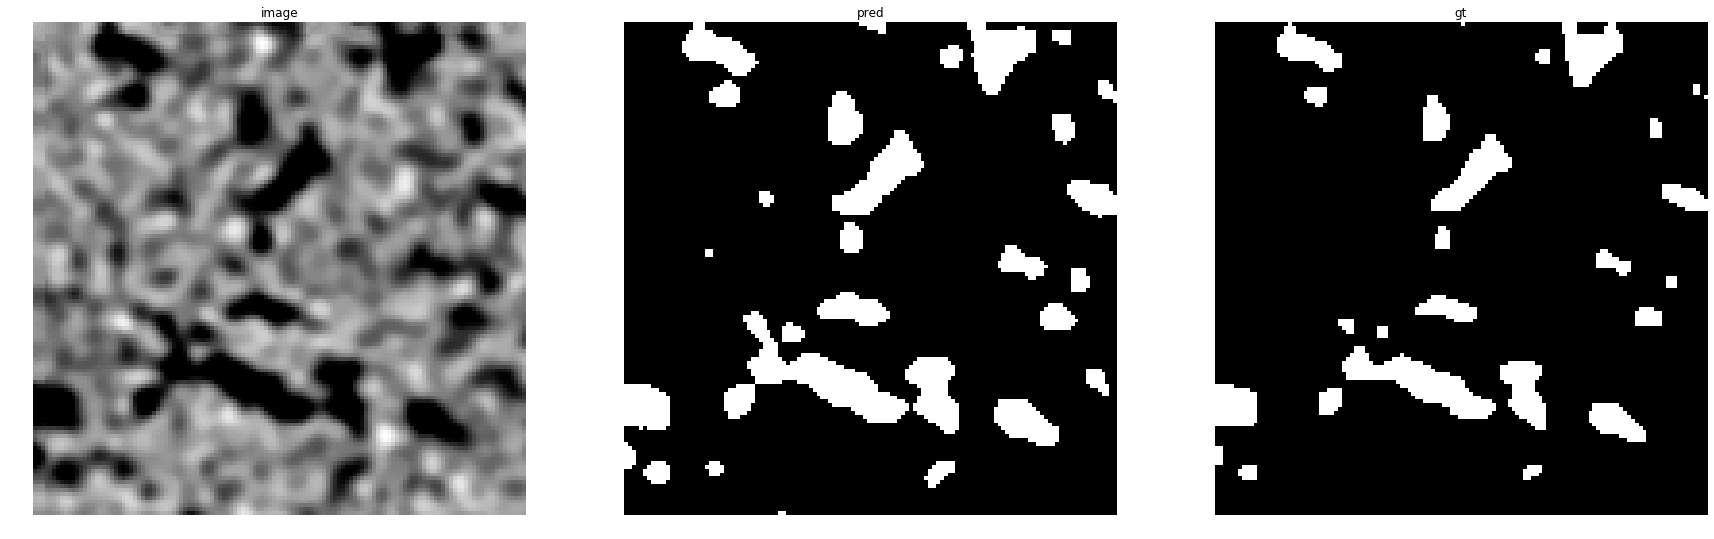

accuracy    : 0.95440673828125
precision   : 0.675534234627126
recall      : 0.9980670103092784
f1          : 0.8057217165149545
pr_auc      : 0.9907080032877698
iou         : 0.6746515679442509


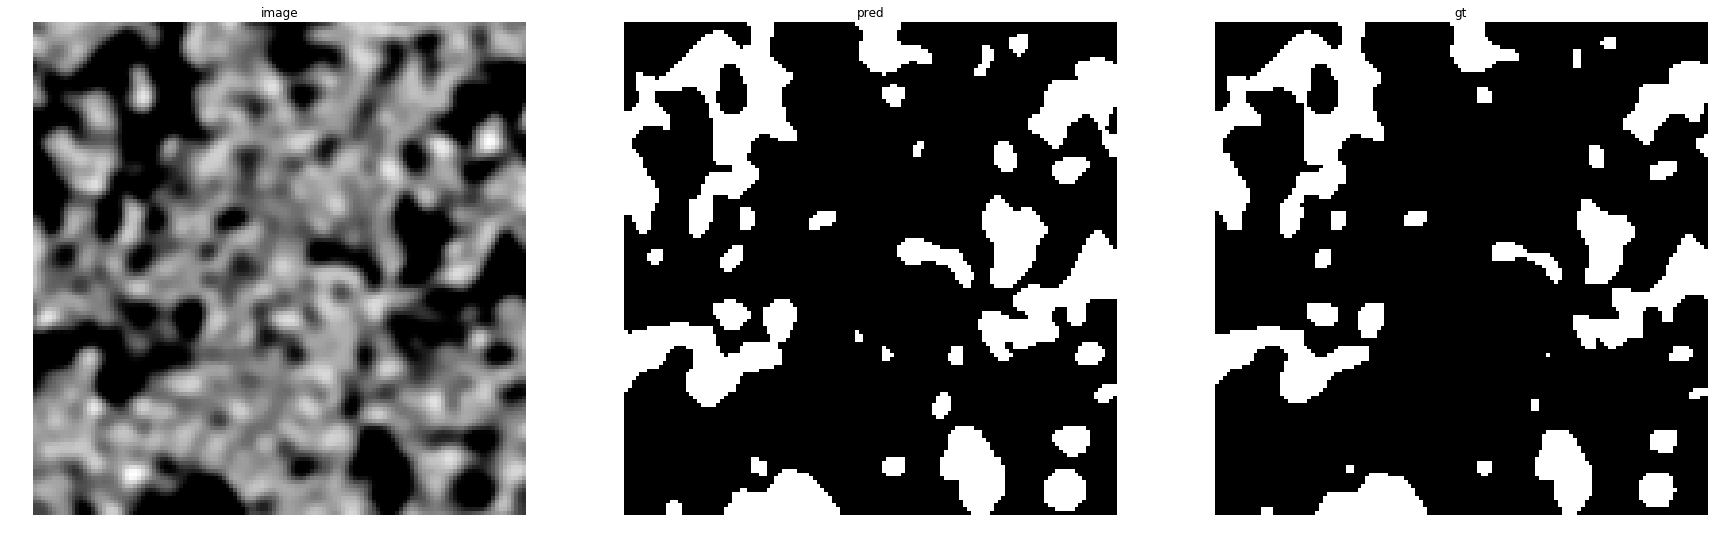

accuracy    : 0.9542236328125
precision   : 0.8151447661469933
recall      : 0.9990900818926297
f1          : 0.8977923139820115
pr_auc      : 0.9943593666674551
iou         : 0.814540059347181


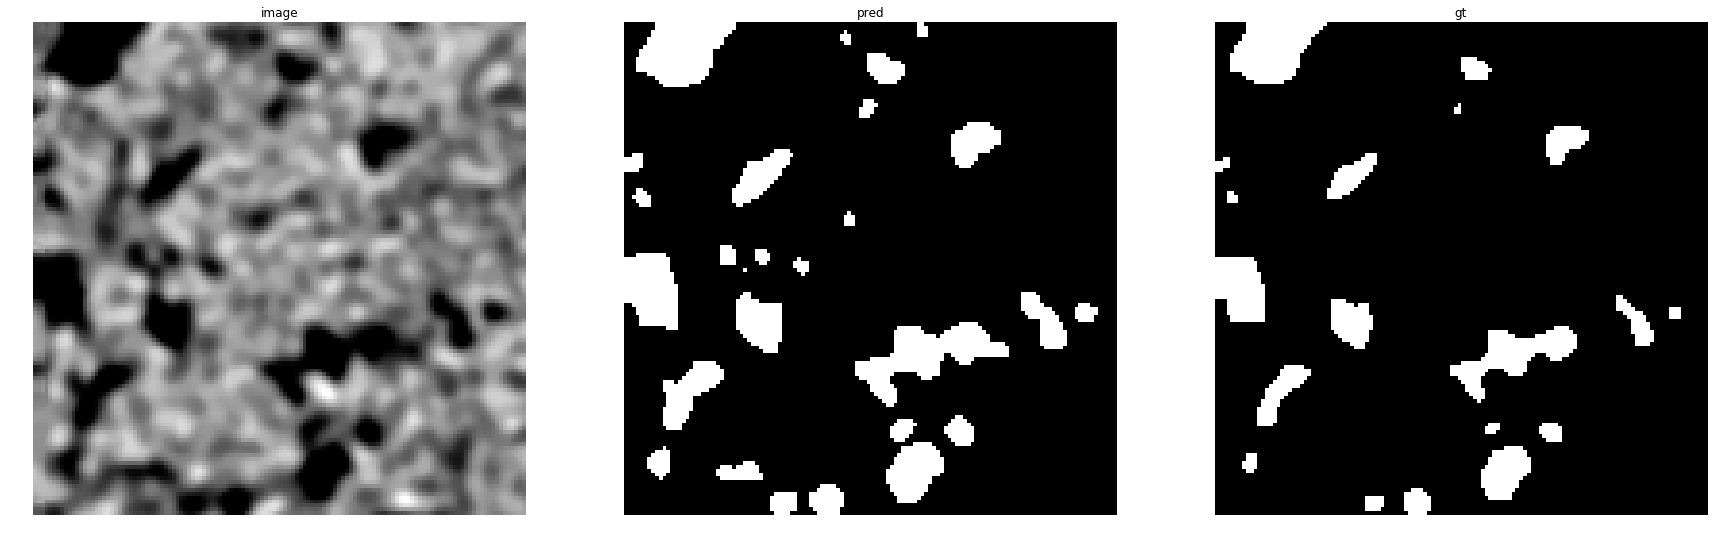

accuracy    : 0.95758056640625
precision   : 0.6765937645416473
recall      : 1.0
f1          : 0.807105190119345
pr_auc      : 0.9923502565941247
iou         : 0.6765937645416473


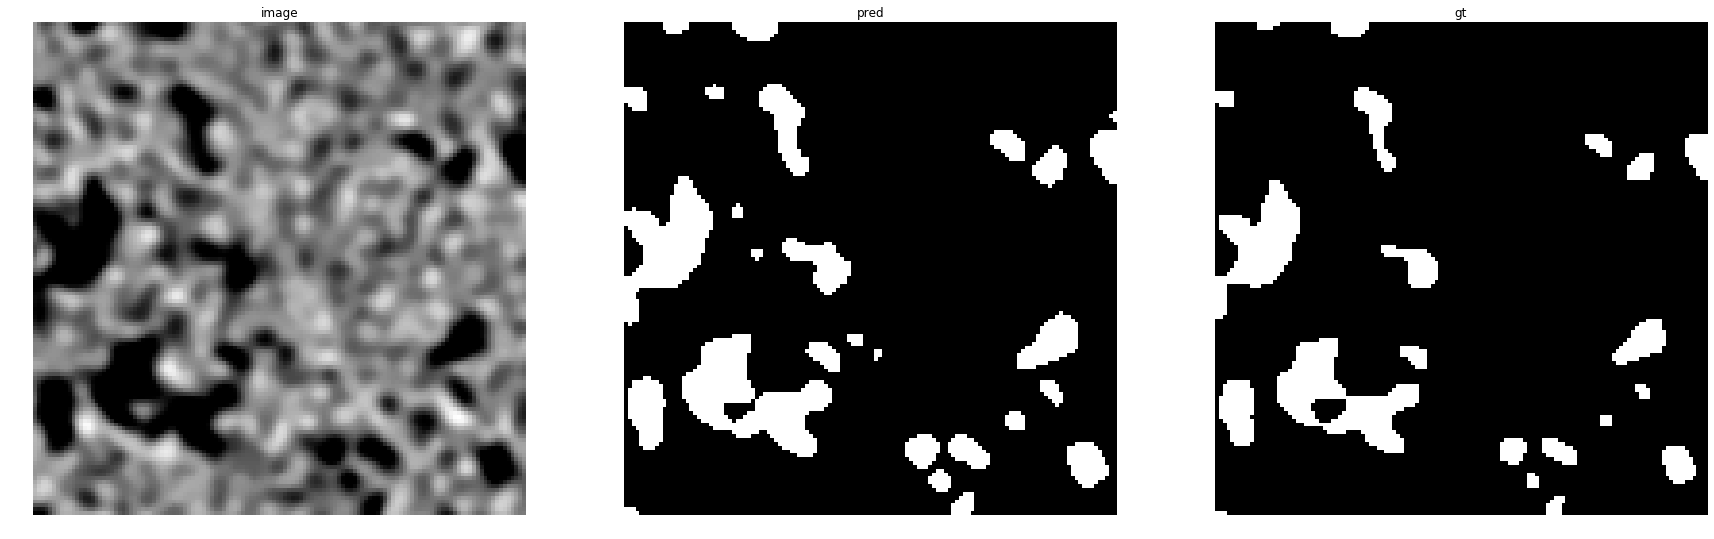

accuracy    : 0.96258544921875
precision   : 0.7366609294320138
recall      : 0.9994162288382954
f1          : 0.848154570225415
pr_auc      : 0.9946981112171515
iou         : 0.7363440860215054


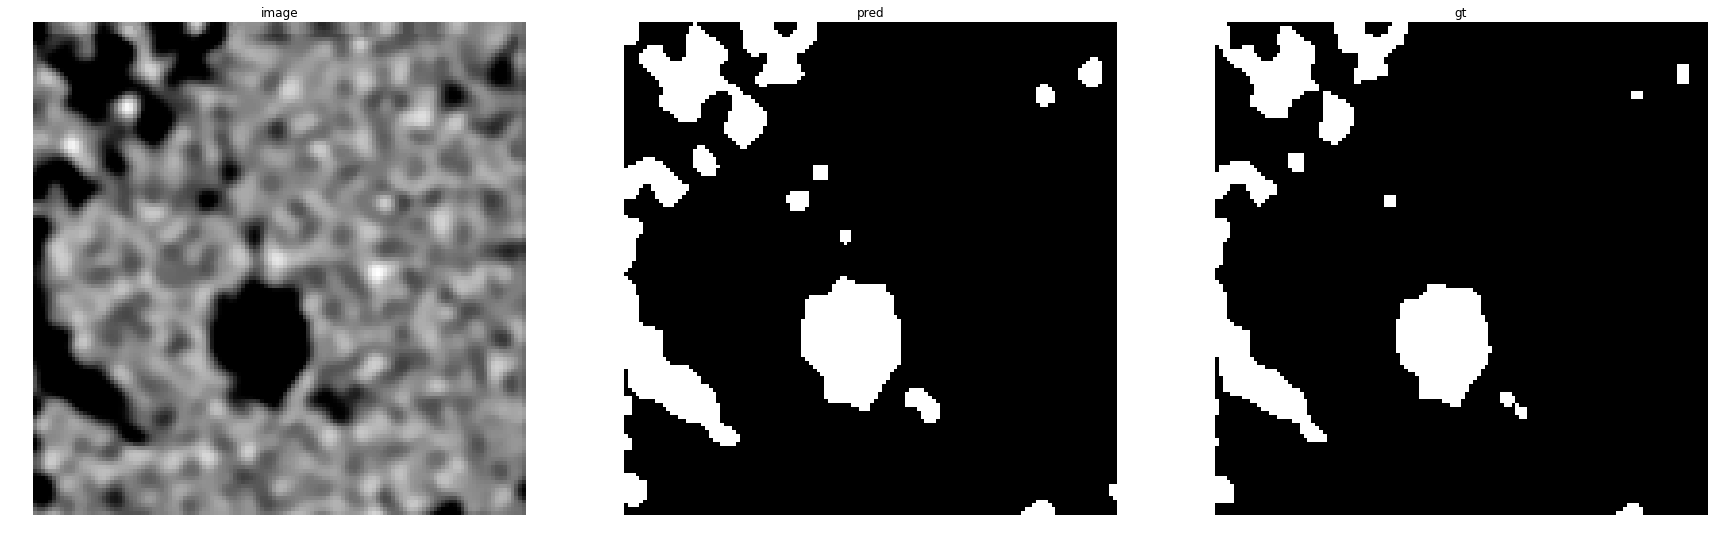

accuracy    : 0.97113037109375
precision   : 0.7954043305346885
recall      : 0.994475138121547
f1          : 0.883869383746624
pr_auc      : 0.9939224628153386
iou         : 0.7919049714034316


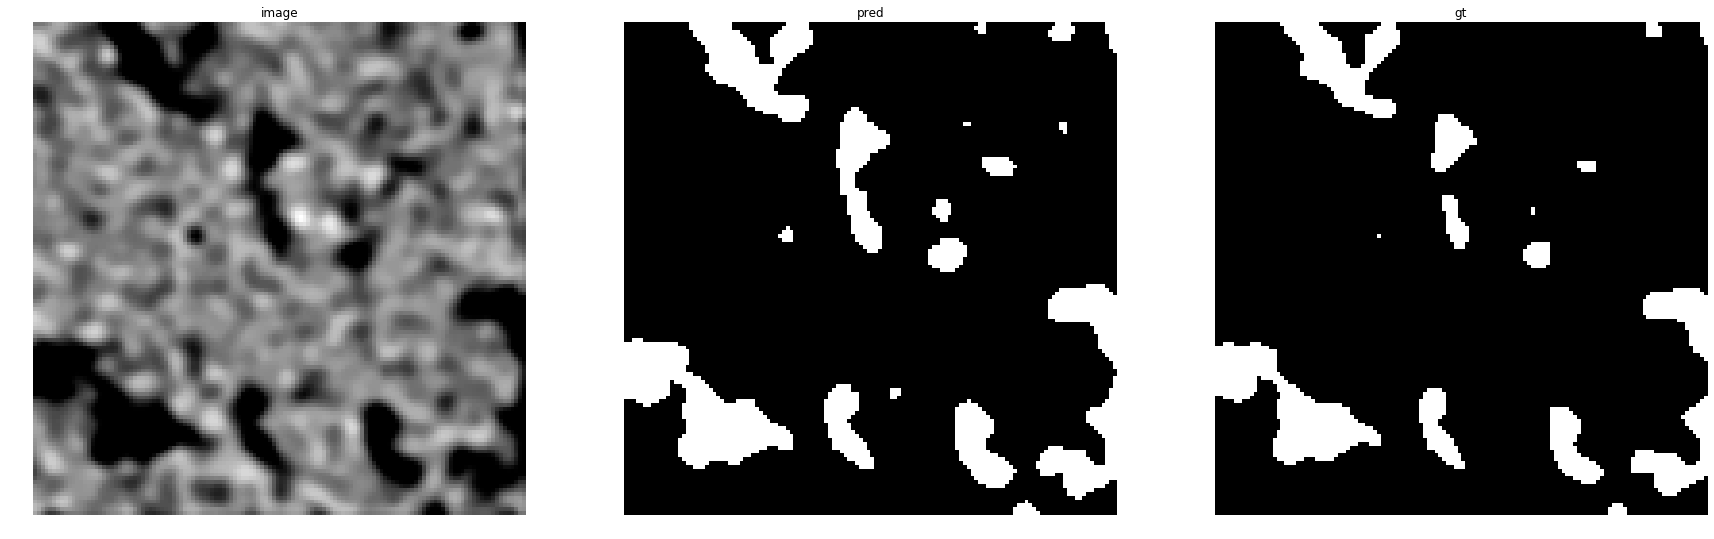

accuracy    : 0.9658203125
precision   : 0.7670549084858569
recall      : 1.0
f1          : 0.8681732580037664
pr_auc      : 0.9947608900917613
iou         : 0.7670549084858569


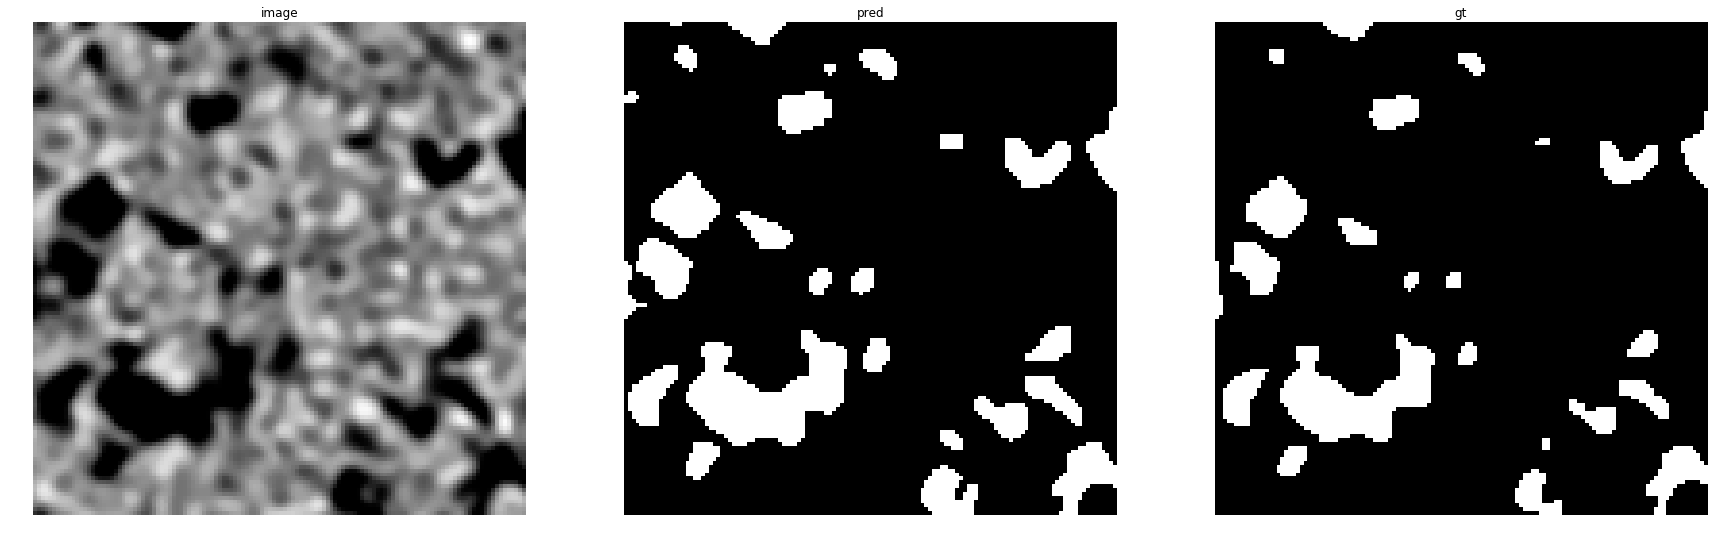

accuracy    : 0.95941162109375
precision   : 0.7407407407407407
recall      : 1.0
f1          : 0.851063829787234
pr_auc      : 0.9939210893837366
iou         : 0.7407407407407407
carbRNF


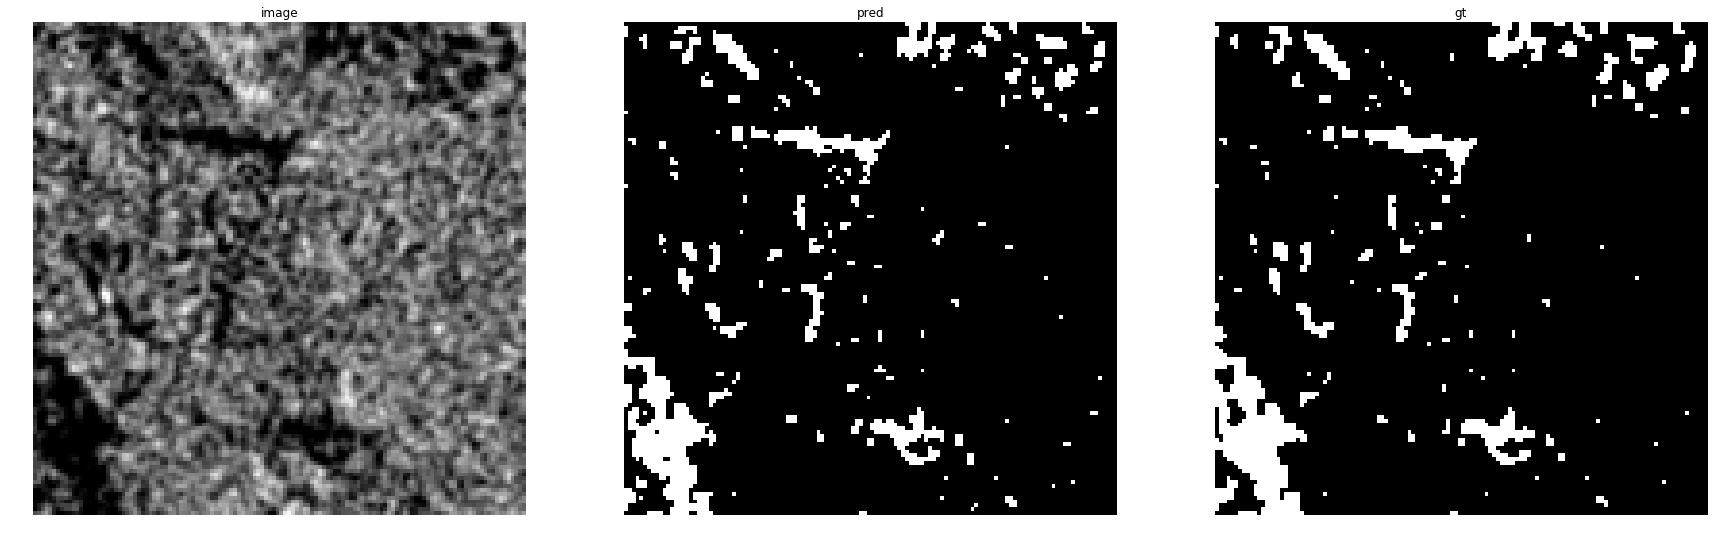

accuracy    : 0.9853515625
precision   : 0.9278278972935462
recall      : 0.9076714188730483
f1          : 0.9176389842141387
pr_auc      : 0.9802011961169739
iou         : 0.8478123018389346


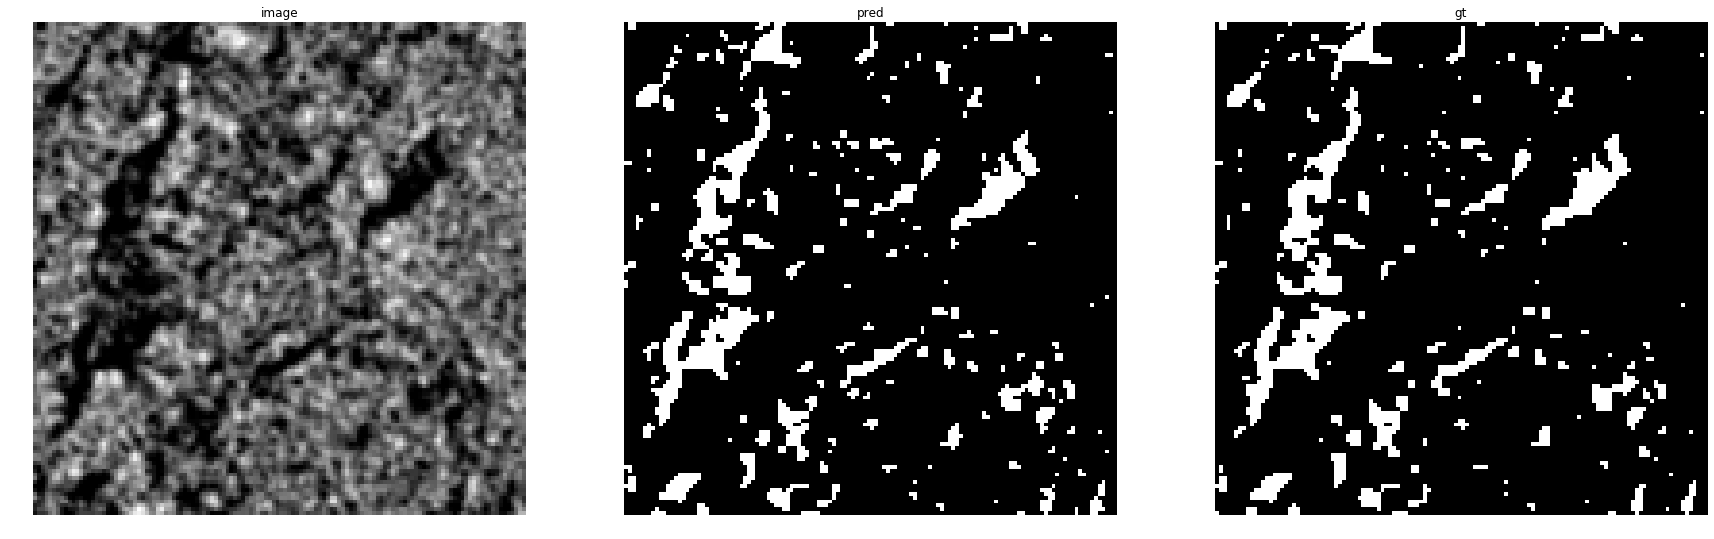

accuracy    : 0.9815673828125
precision   : 0.9088050314465409
recall      : 0.9312567132116004
f1          : 0.919893899204244
pr_auc      : 0.9820552660163557
iou         : 0.8516699410609038


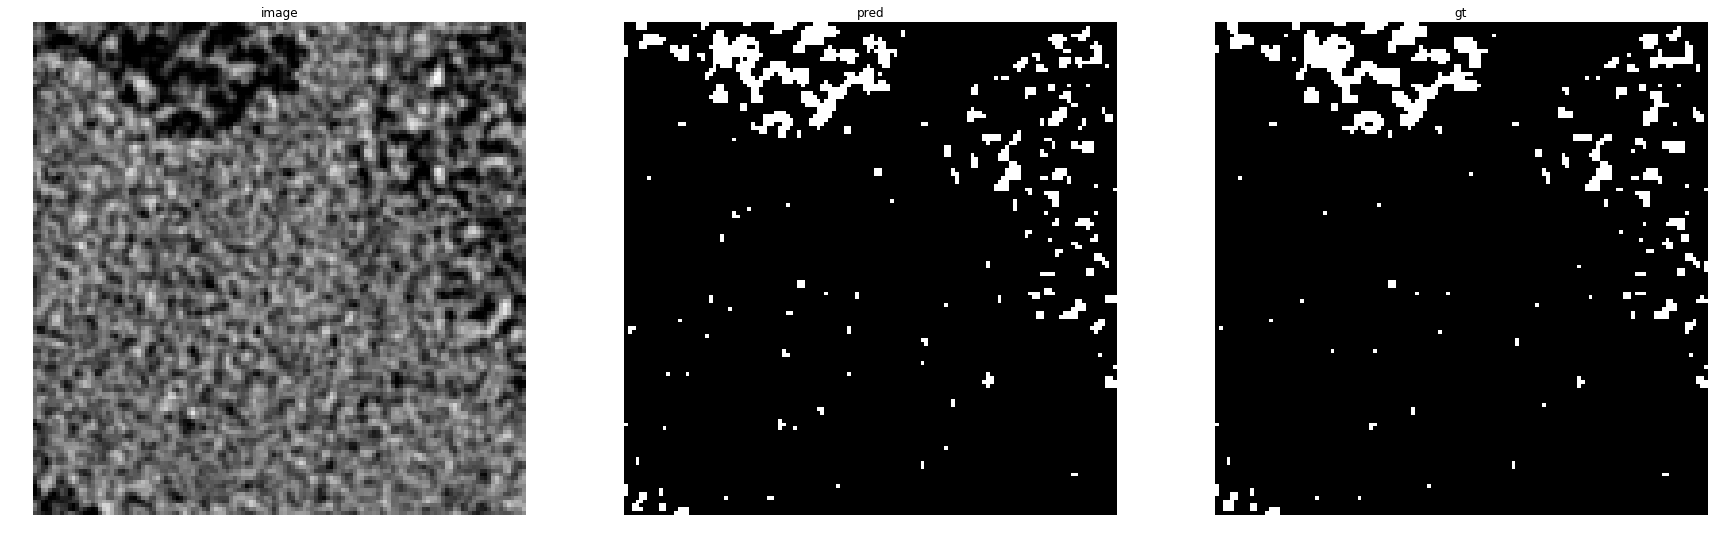

accuracy    : 0.98834228515625
precision   : 0.8850346878097126
recall      : 0.9225206611570248
f1          : 0.9033889731917045
pr_auc      : 0.9732358245102861
iou         : 0.8238007380073801


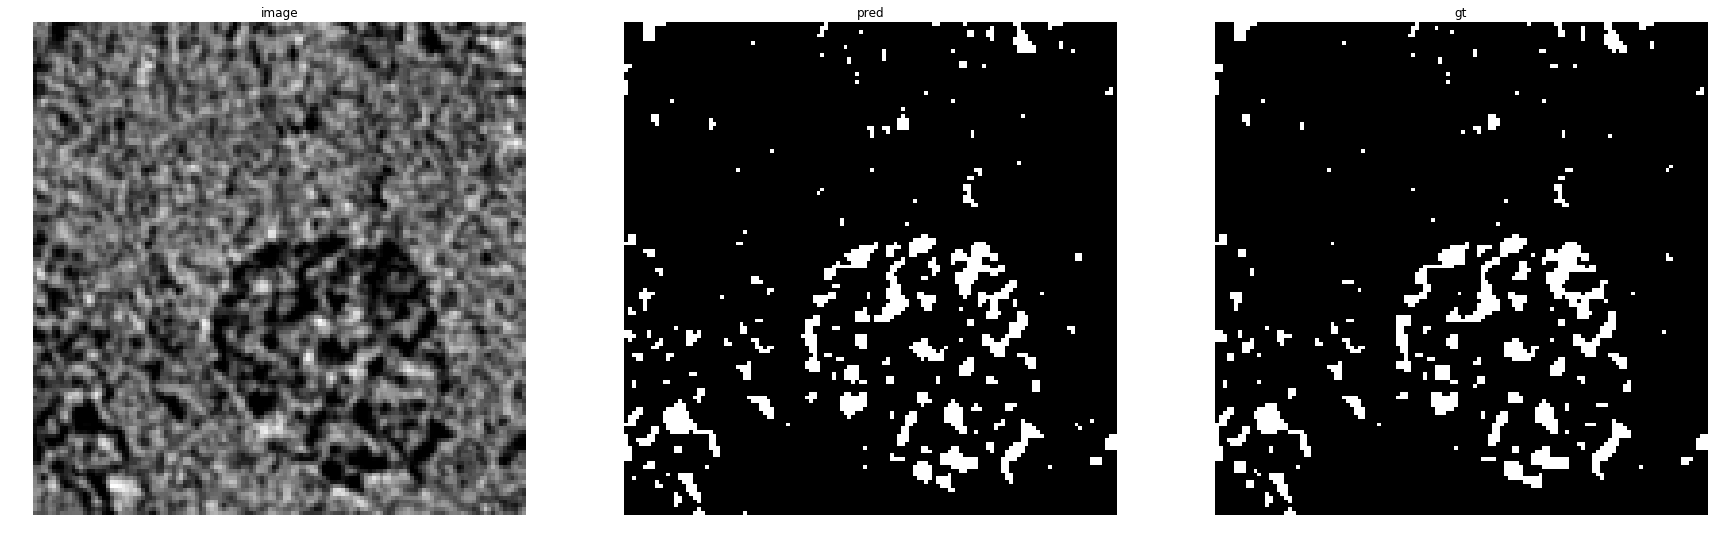

accuracy    : 0.98687744140625
precision   : 0.9003067484662577
recall      : 0.9324861000794281
f1          : 0.9161139289894655
pr_auc      : 0.977397639897875
iou         : 0.8452123830093593


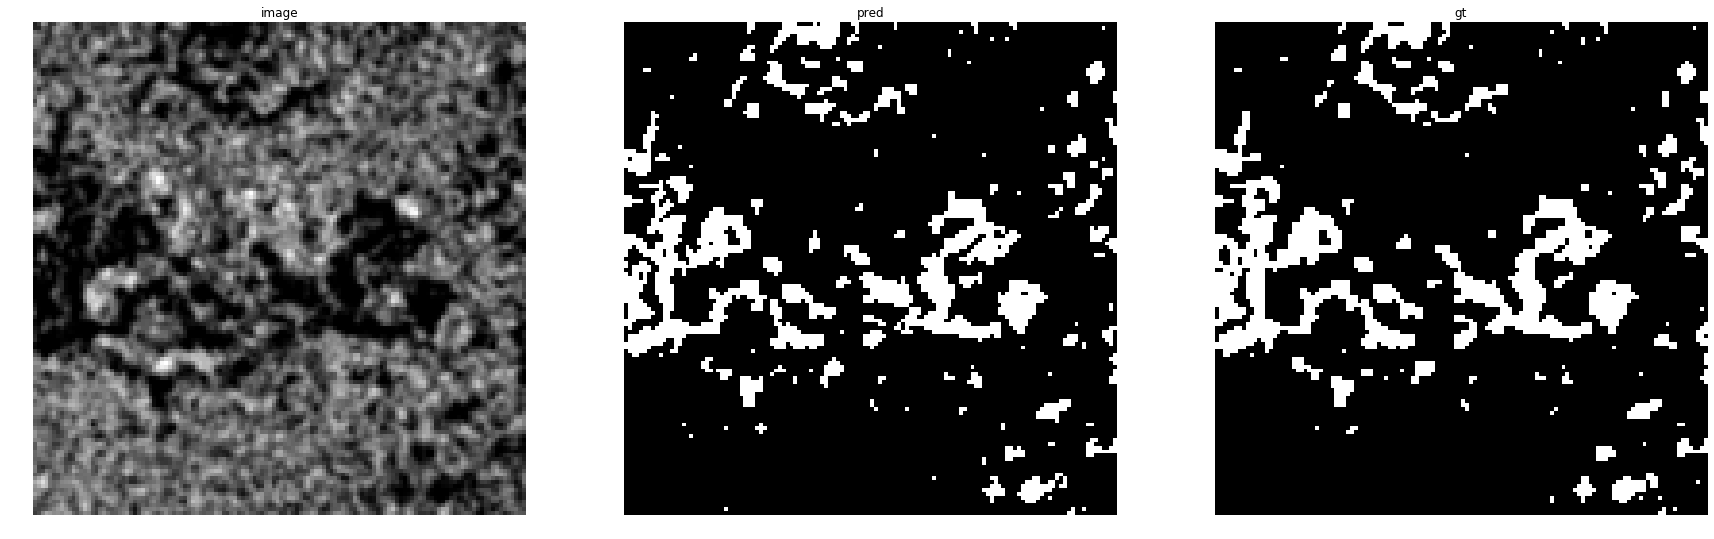

accuracy    : 0.9796142578125
precision   : 0.9414780008543358
recall      : 0.9179508538109121
f1          : 0.9295655841417124
pr_auc      : 0.9860266520343552
iou         : 0.8684003152088259


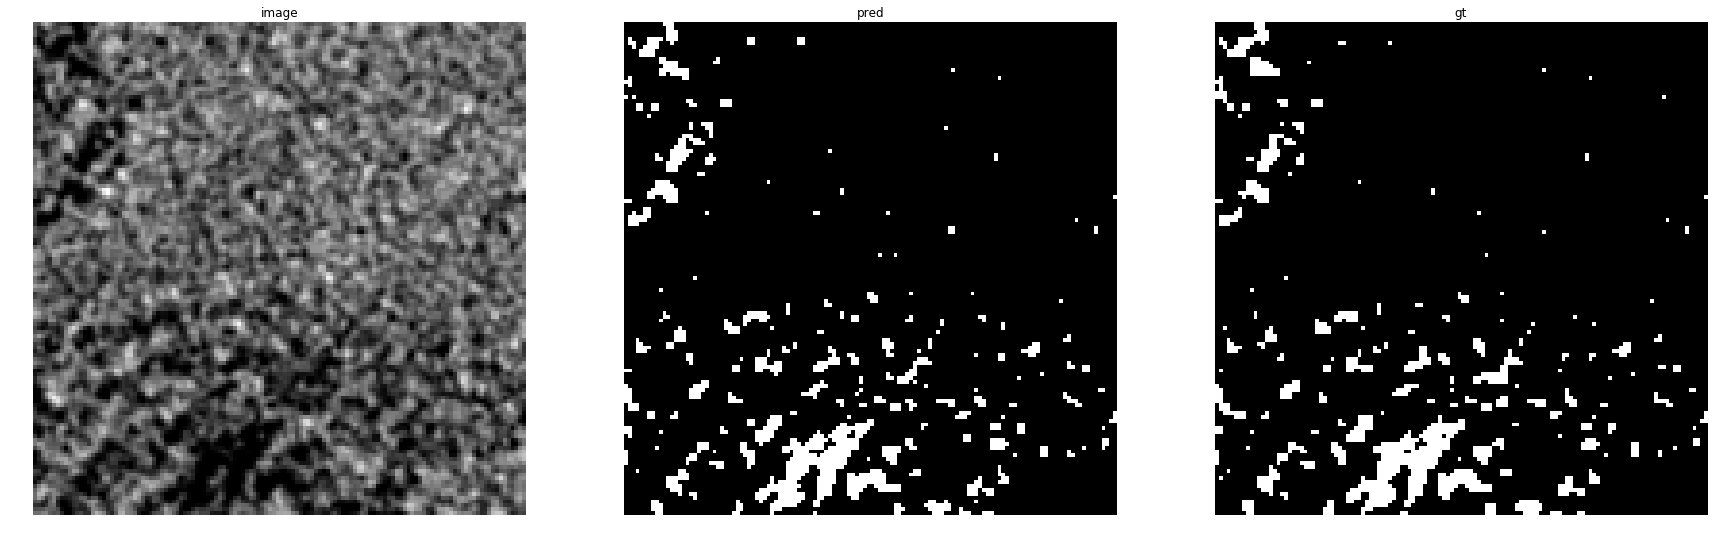

accuracy    : 0.98748779296875
precision   : 0.9195305951383068
recall      : 0.9096185737976783
f1          : 0.9145477282200918
pr_auc      : 0.9782862690240217
iou         : 0.8425499231950845


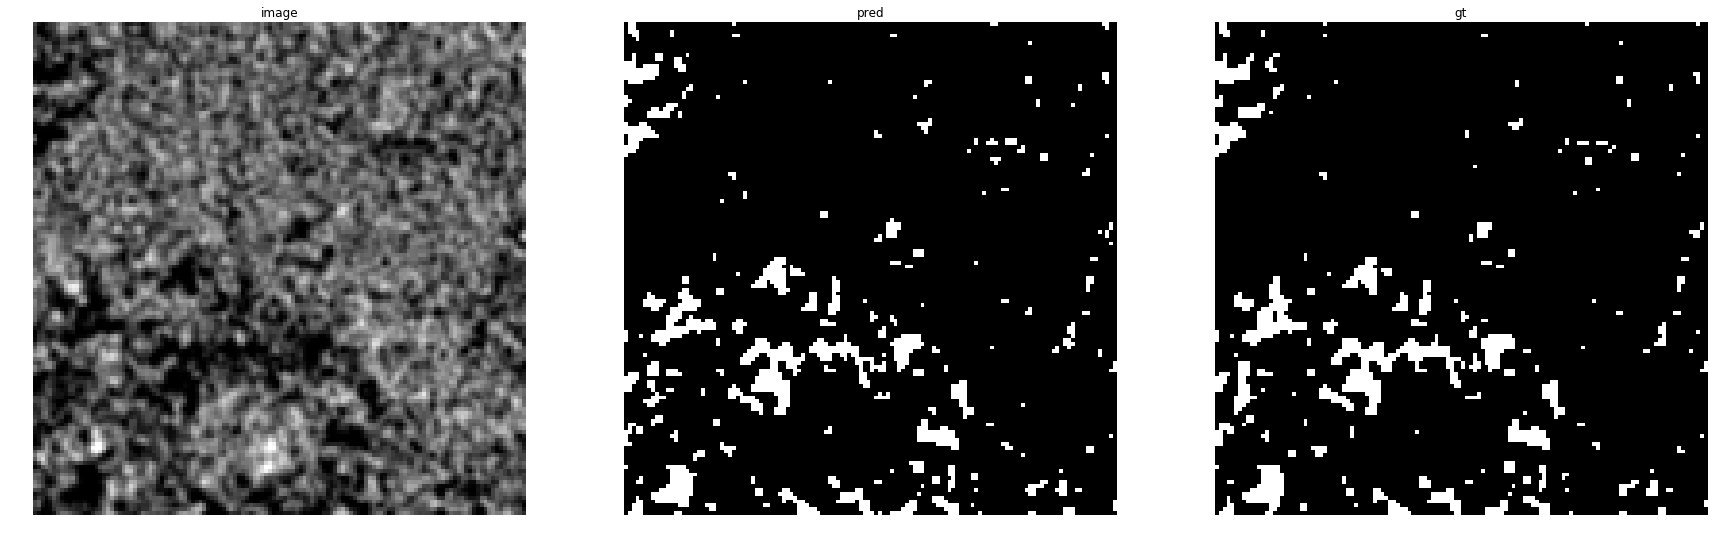

accuracy    : 0.987548828125
precision   : 0.9136636636636637
recall      : 0.9318529862174579
f1          : 0.9226686884003032
pr_auc      : 0.9792423349075667
iou         : 0.856439127375088


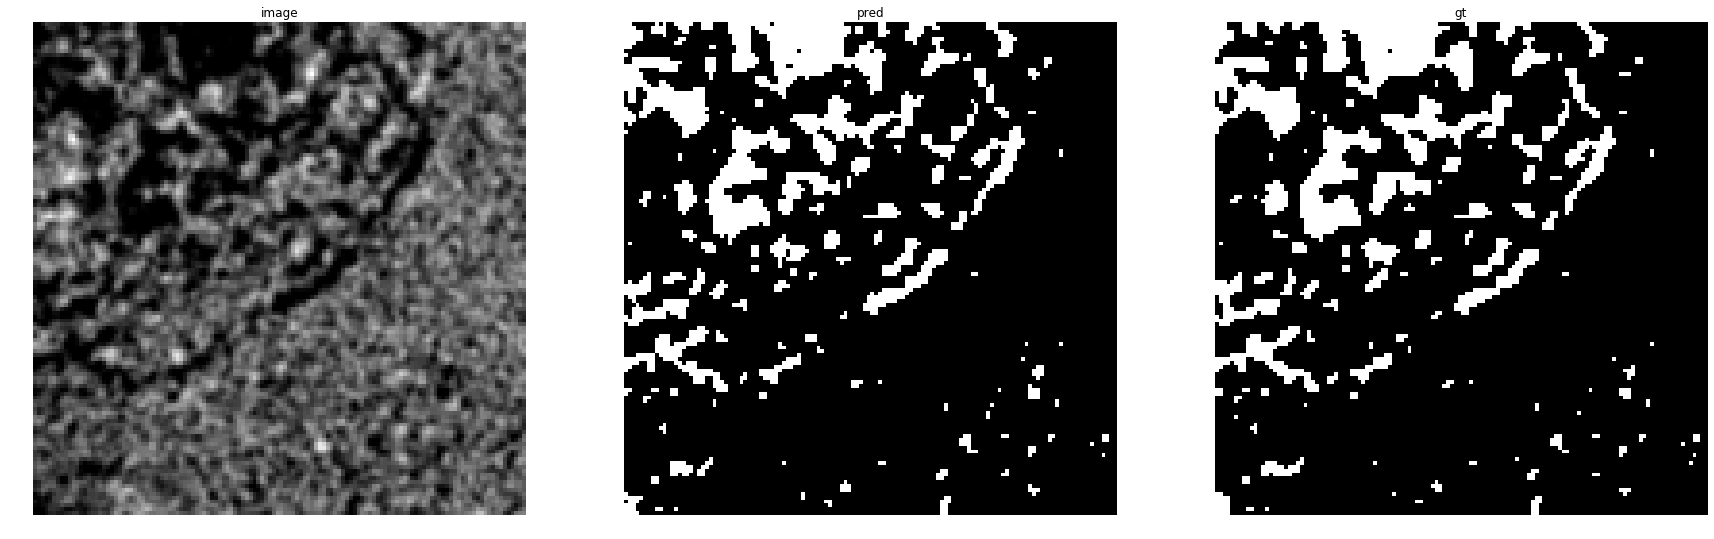

accuracy    : 0.98345947265625
precision   : 0.9558359621451105
recall      : 0.9384436701509872
f1          : 0.9470599726509082
pr_auc      : 0.9909005879933945
iou         : 0.8994434137291281


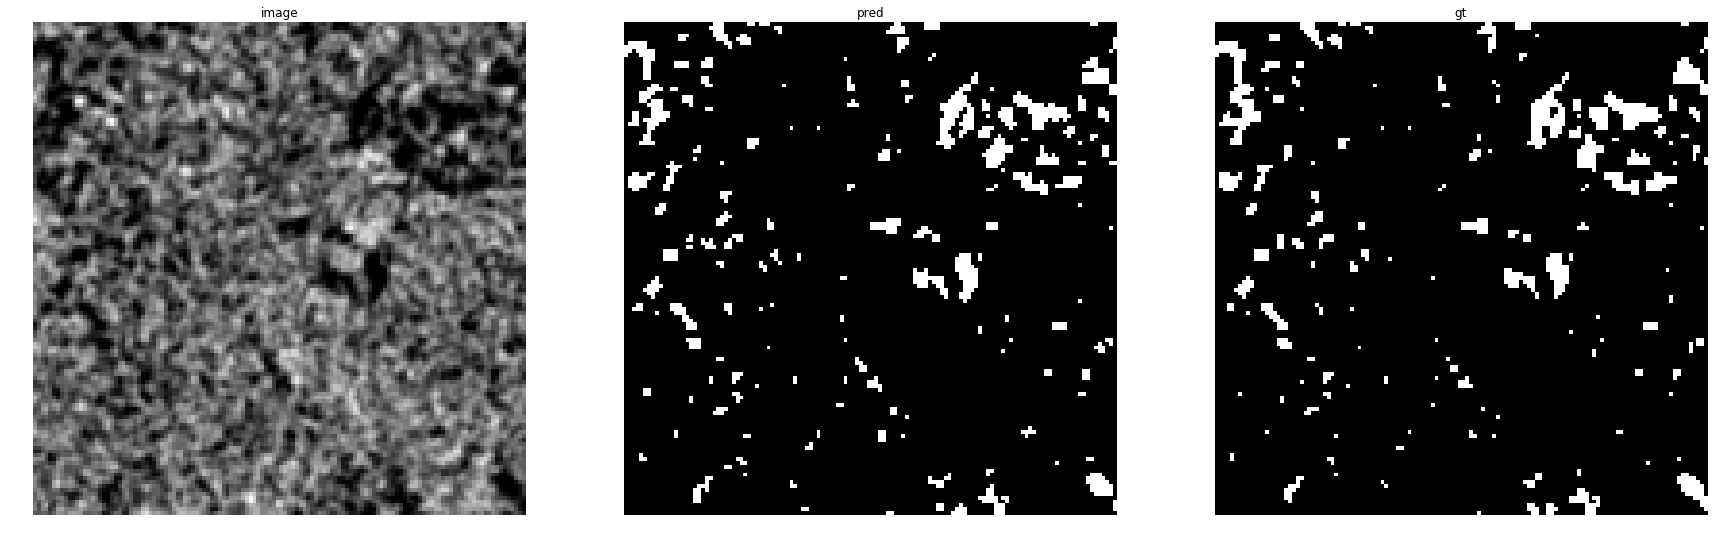

accuracy    : 0.98541259765625
precision   : 0.8873602751504729
recall      : 0.9052631578947369
f1          : 0.8962223187147199
pr_auc      : 0.970753445323074
iou         : 0.8119590873328089


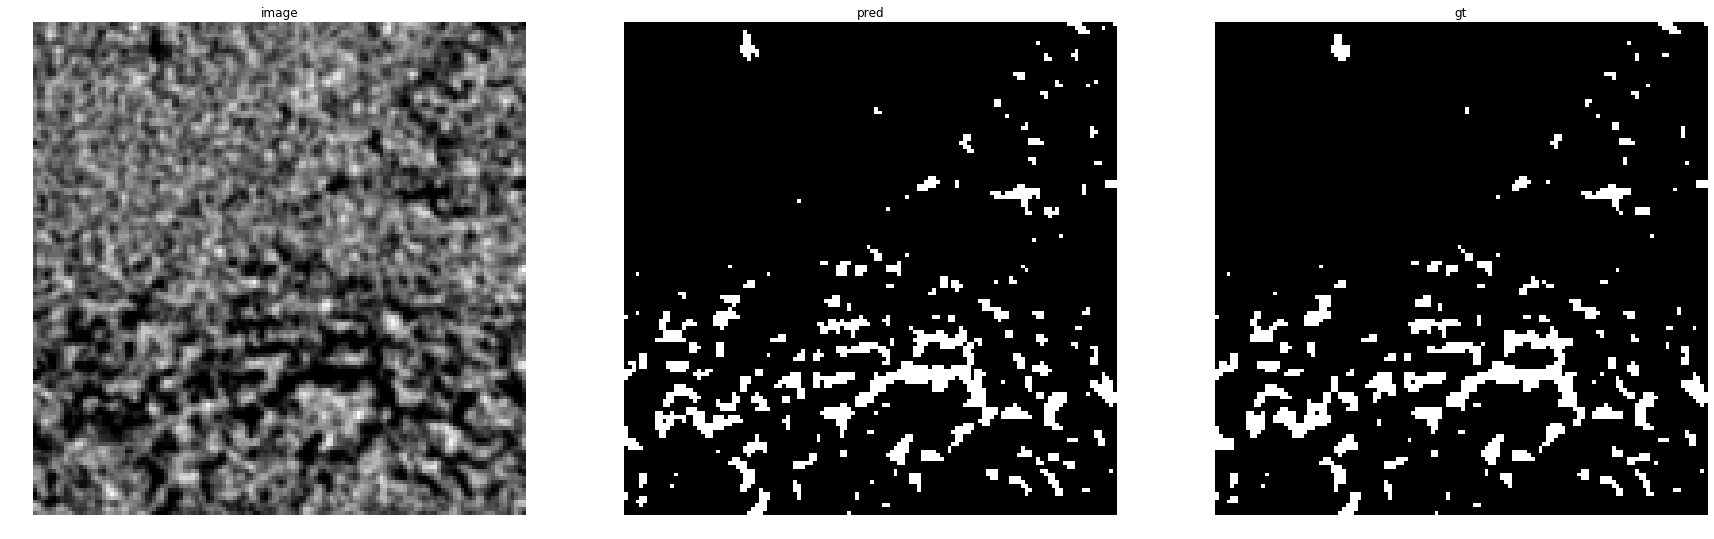

accuracy    : 0.9833984375
precision   : 0.8908839779005525
recall      : 0.9188034188034188
f1          : 0.9046283309957924
pr_auc      : 0.9752276376316624
iou         : 0.8258642765685019
SPE_carb10_58_box3


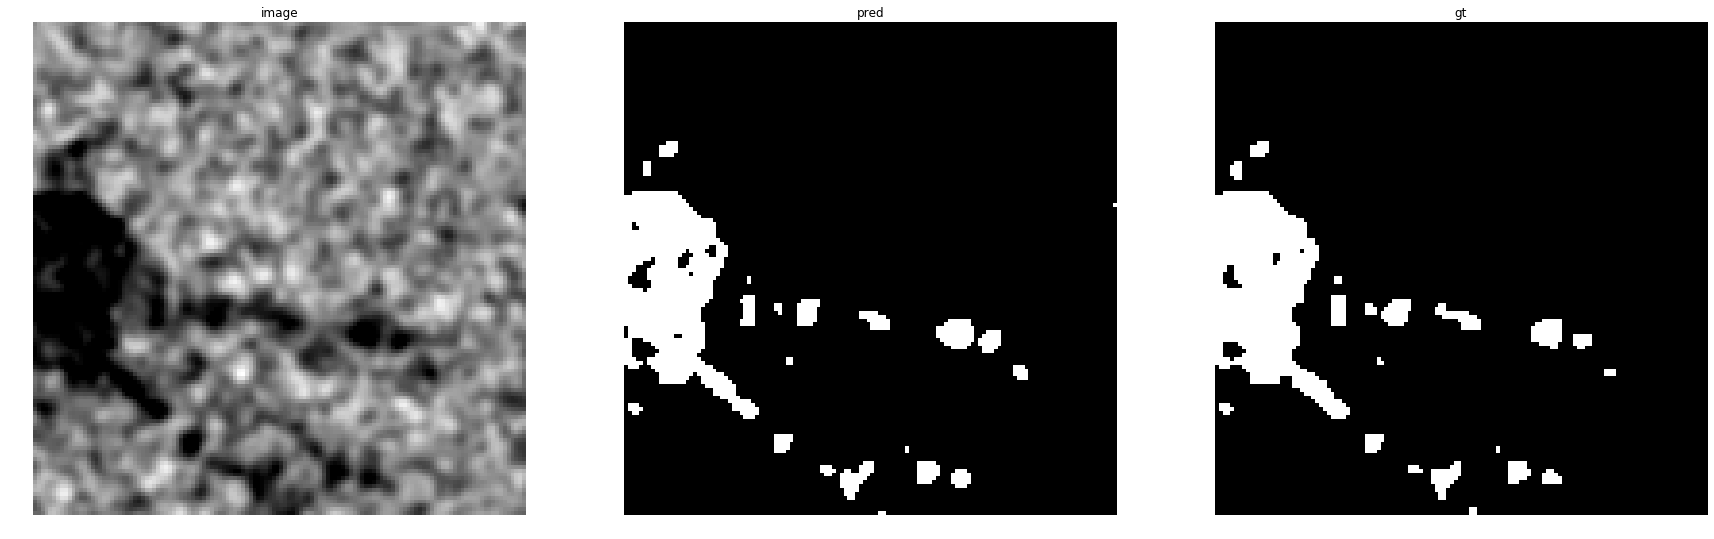

accuracy    : 0.9901123046875
precision   : 0.9636493228795439
recall      : 0.9241285030758715
f1          : 0.9434752267969294
pr_auc      : 0.9902312077970242
iou         : 0.892998678996037


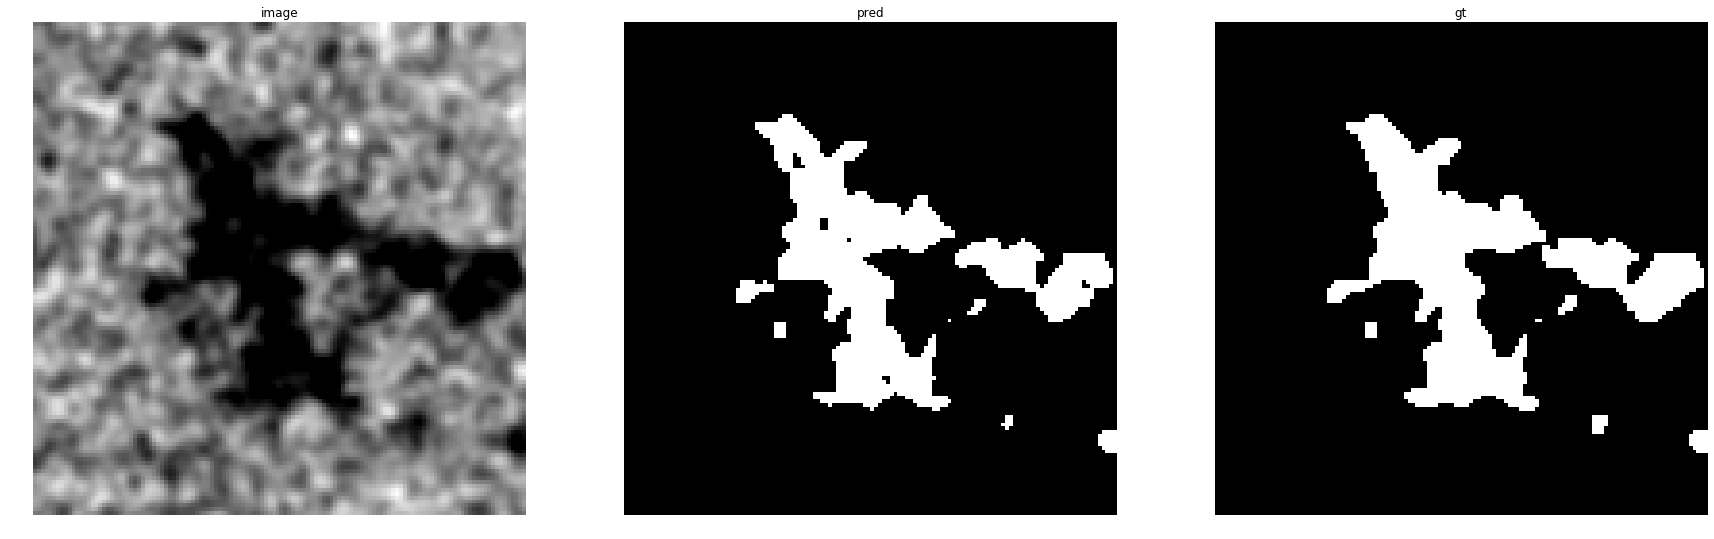

accuracy    : 0.9886474609375
precision   : 0.9935543278084714
recall      : 0.9261802575107296
f1          : 0.958685028876055
pr_auc      : 0.9952921616350185
iou         : 0.9206484641638225


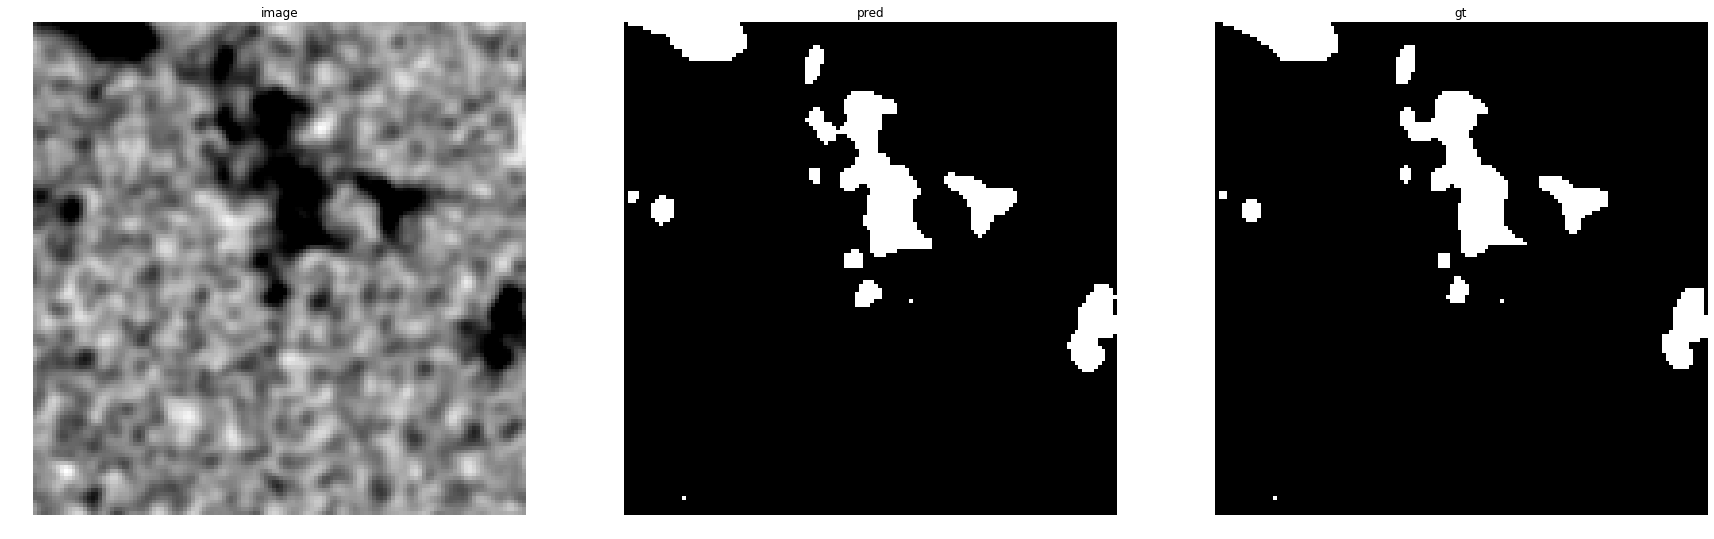

accuracy    : 0.99072265625
precision   : 0.91417004048583
recall      : 0.9608510638297872
f1          : 0.9369294605809128
pr_auc      : 0.990566220512439
iou         : 0.8813427010148321


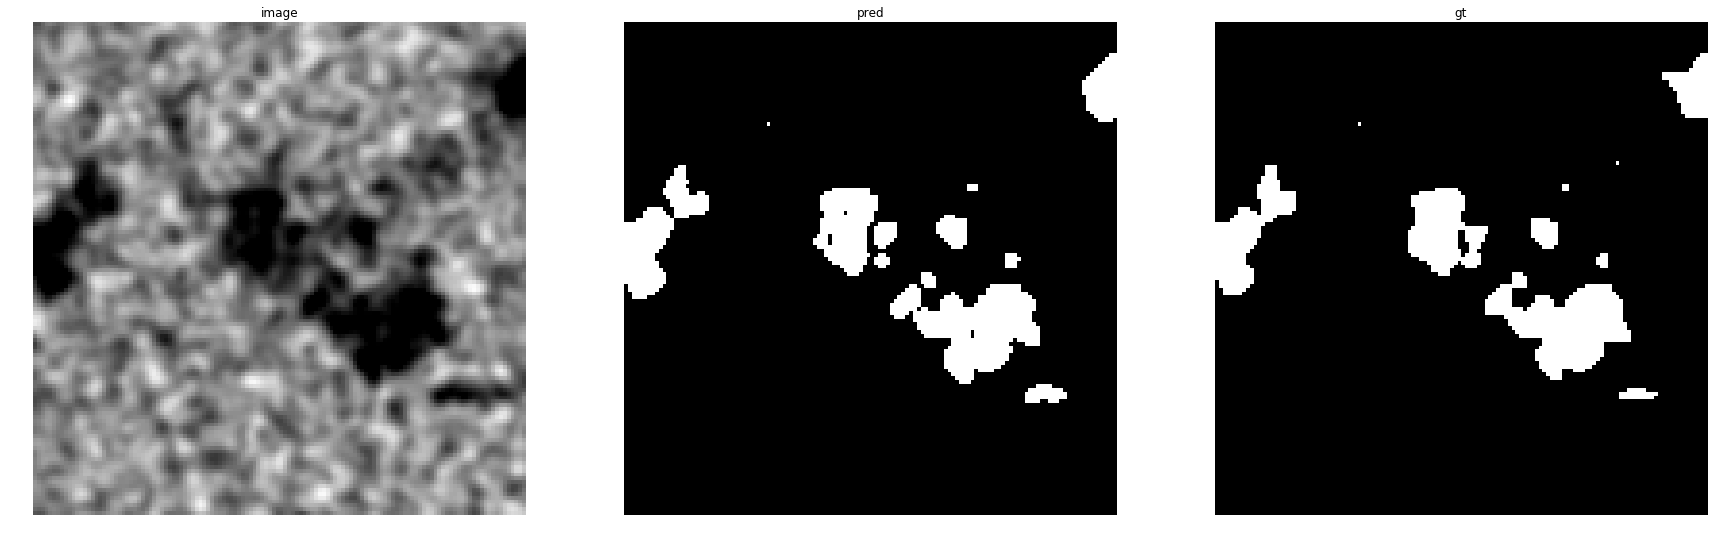

accuracy    : 0.98883056640625
precision   : 0.9105633802816901
recall      : 0.9584877687175686
f1          : 0.9339111592632718
pr_auc      : 0.9892502550712876
iou         : 0.8760162601626016


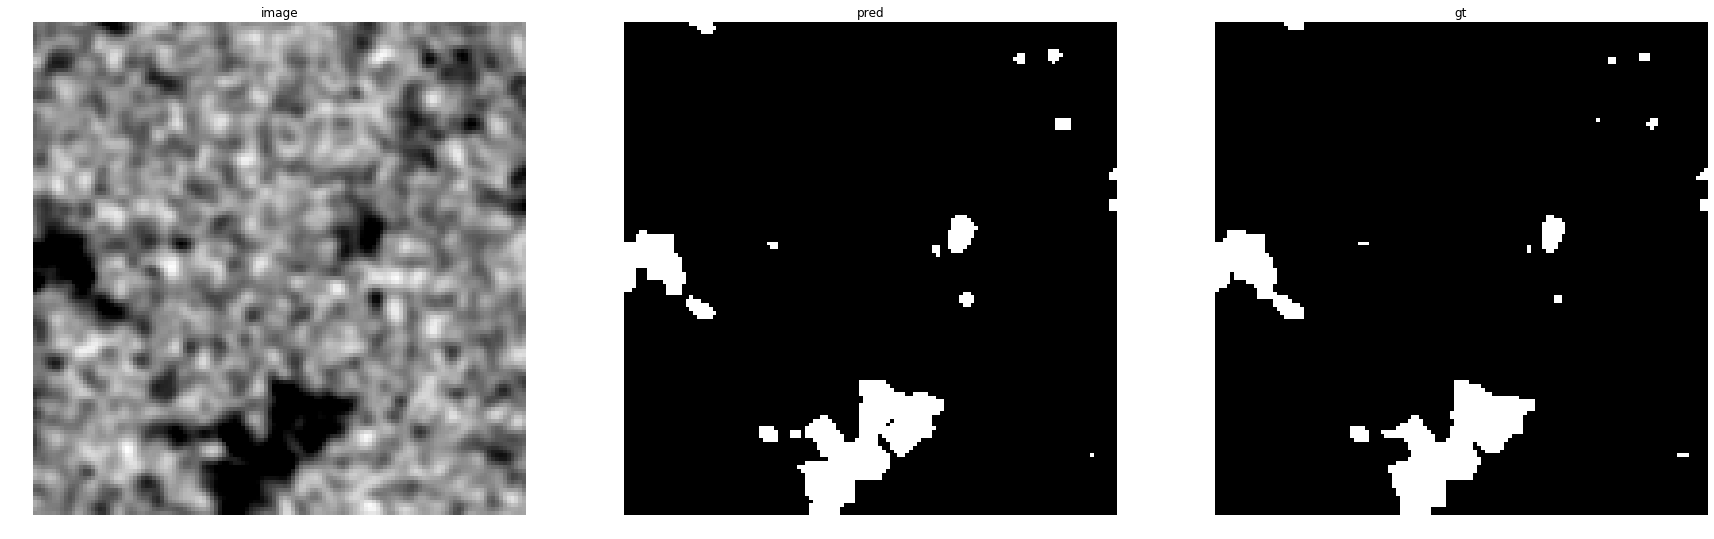

accuracy    : 0.9920654296875
precision   : 0.924
recall      : 0.9447852760736196
f1          : 0.9342770475227502
pr_auc      : 0.9894340843422824
iou         : 0.8766603415559773


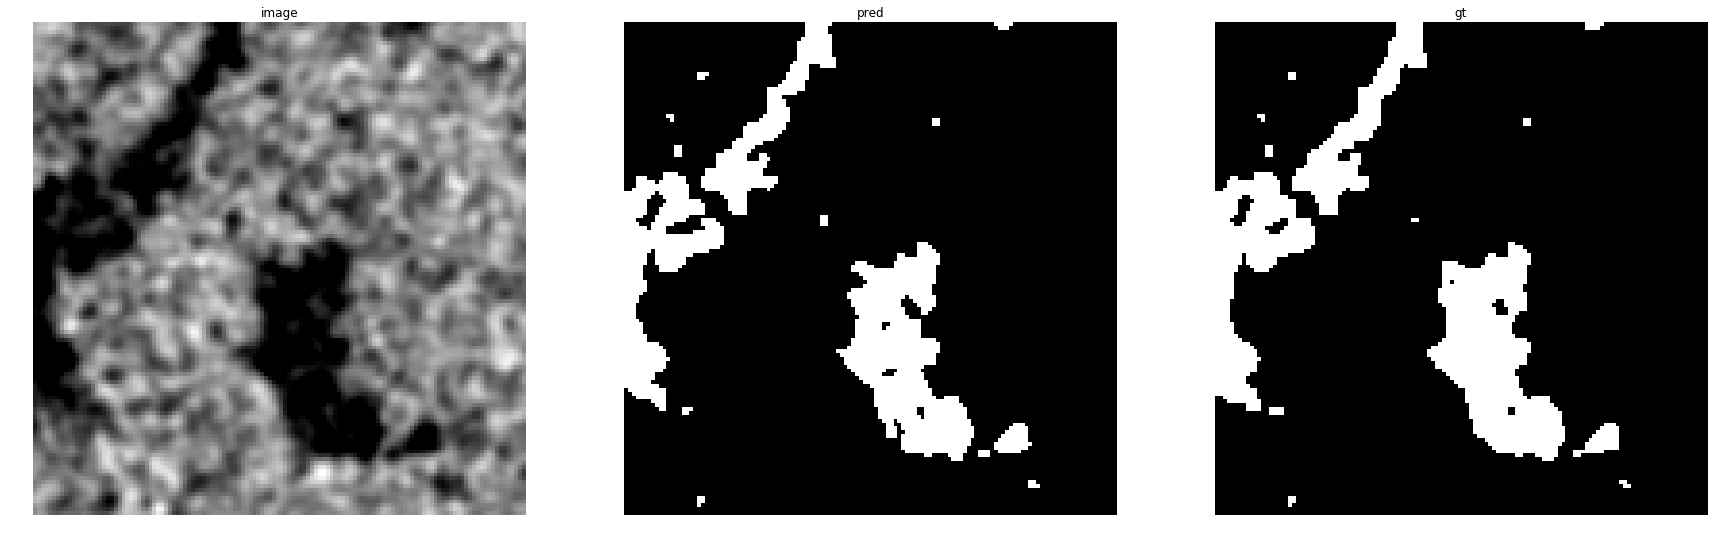

accuracy    : 0.98828125
precision   : 0.9918330308529946
recall      : 0.926271186440678
f1          : 0.9579316389132341
pr_auc      : 0.9961798603341818
iou         : 0.9192598822539949


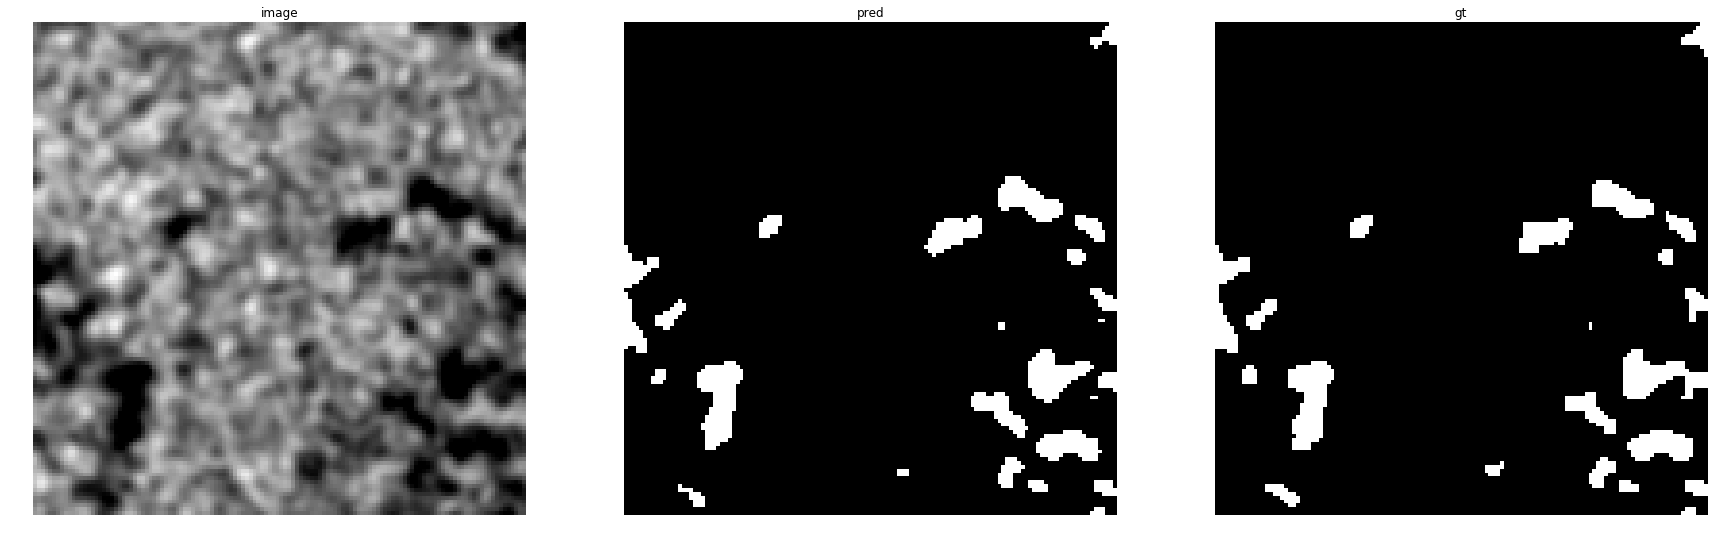

accuracy    : 0.98883056640625
precision   : 0.9261311172668514
recall      : 0.906871609403255
f1          : 0.916400182731841
pr_auc      : 0.9816662019680864
iou         : 0.845699831365936


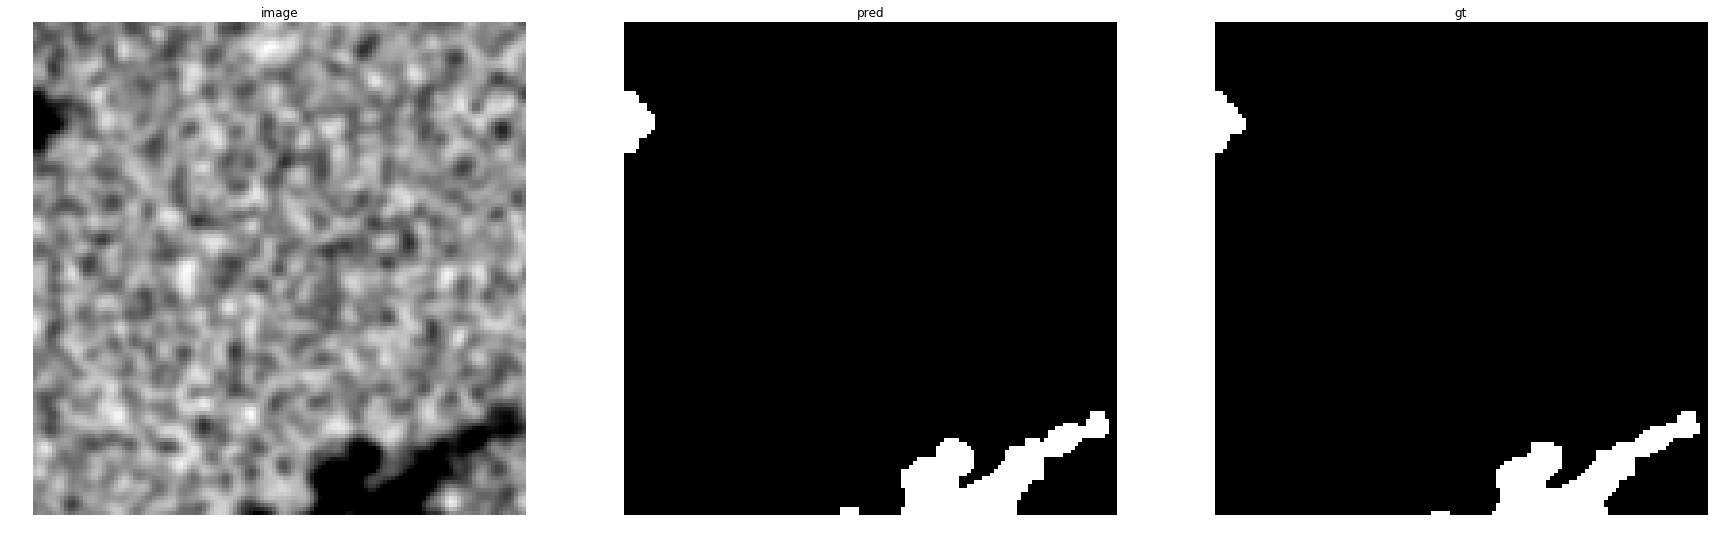

accuracy    : 0.99560546875
precision   : 0.905608755129959
recall      : 0.9954887218045113
f1          : 0.9484240687679084
pr_auc      : 0.9968789388272316
iou         : 0.9019073569482289


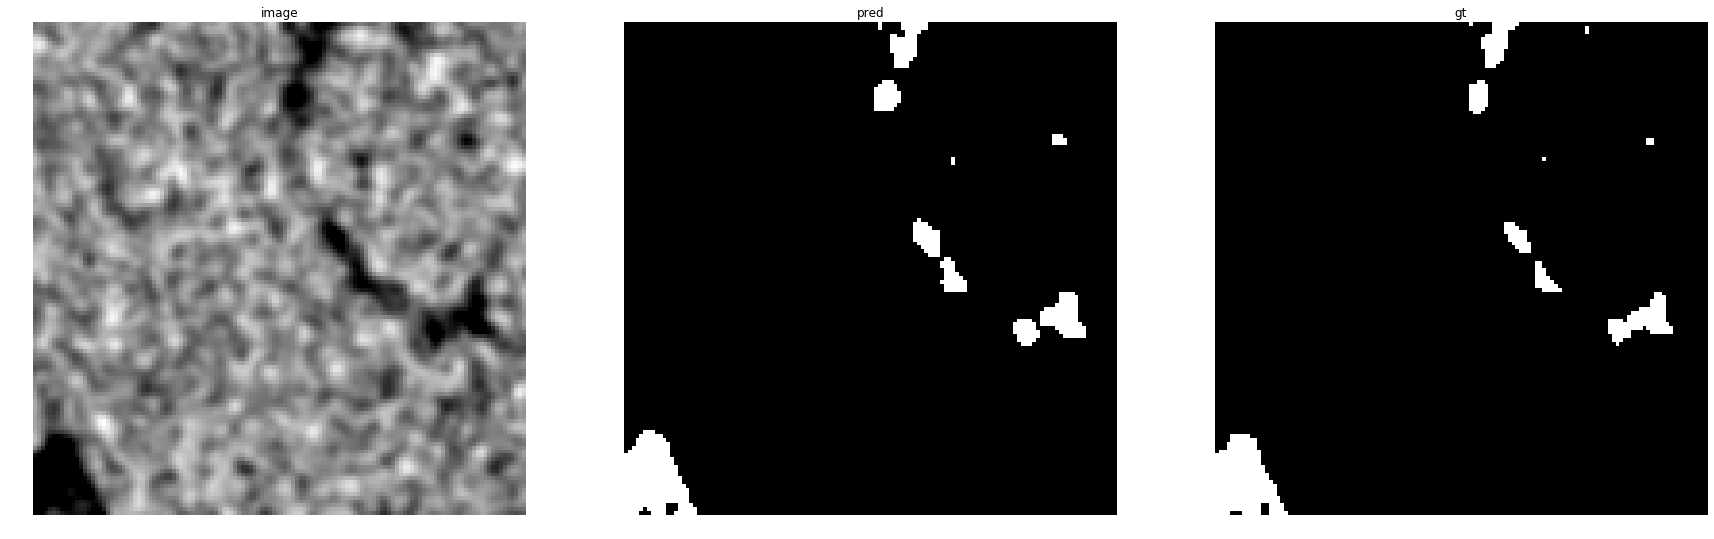

accuracy    : 0.99285888671875
precision   : 0.8454258675078864
recall      : 0.9657657657657658
f1          : 0.9015979814970564
pr_auc      : 0.9859921369536836
iou         : 0.8208269525267994


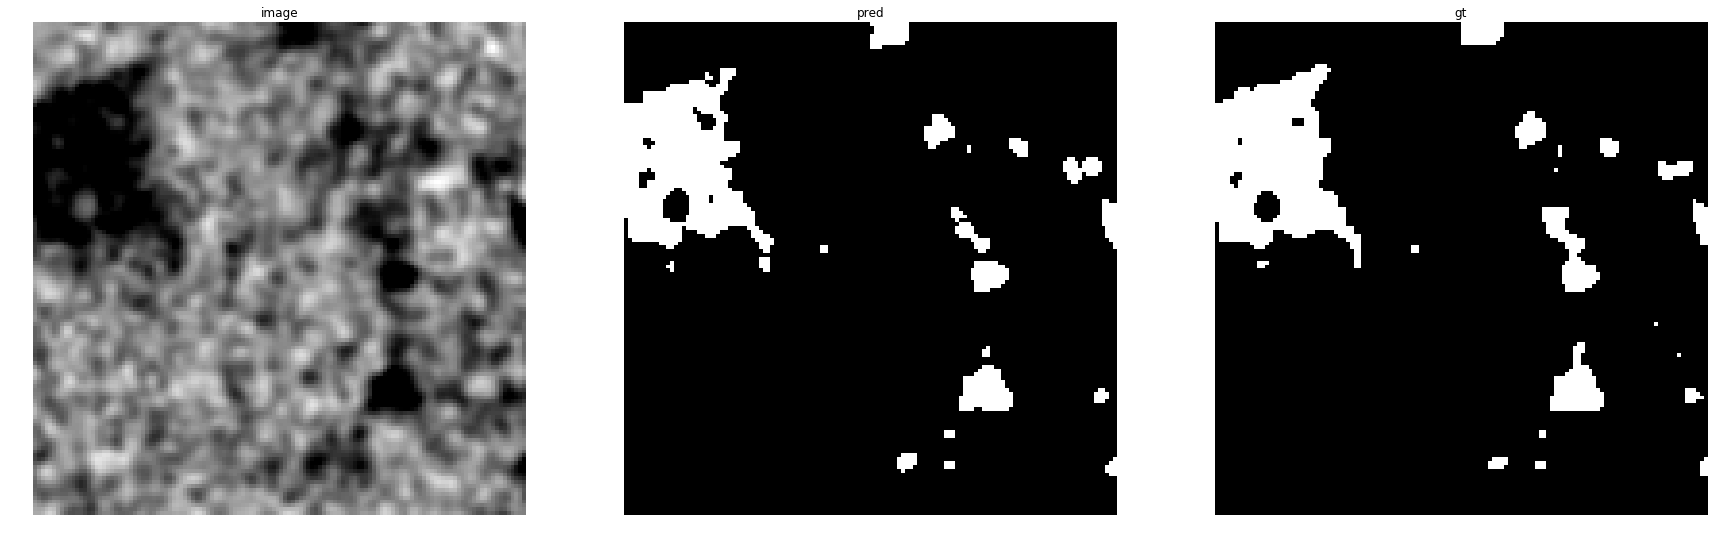

accuracy    : 0.987060546875
precision   : 0.9725590299936184
recall      : 0.900177200236267
f1          : 0.9349693251533742
pr_auc      : 0.9901693194773133
iou         : 0.8778801843317973
SoilAh-1


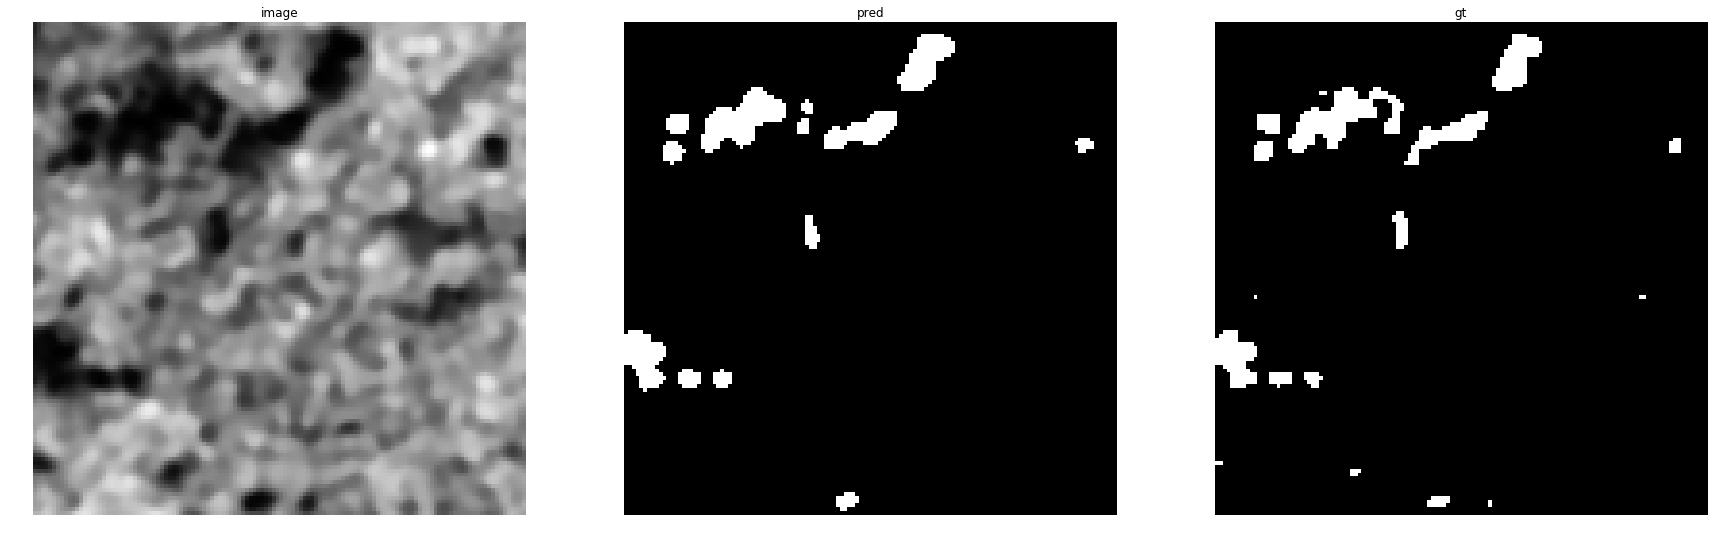

accuracy    : 0.9898681640625
precision   : 0.8743169398907104
recall      : 0.896358543417367
f1          : 0.8852005532503457
pr_auc      : 0.9653239883865001
iou         : 0.794044665012407


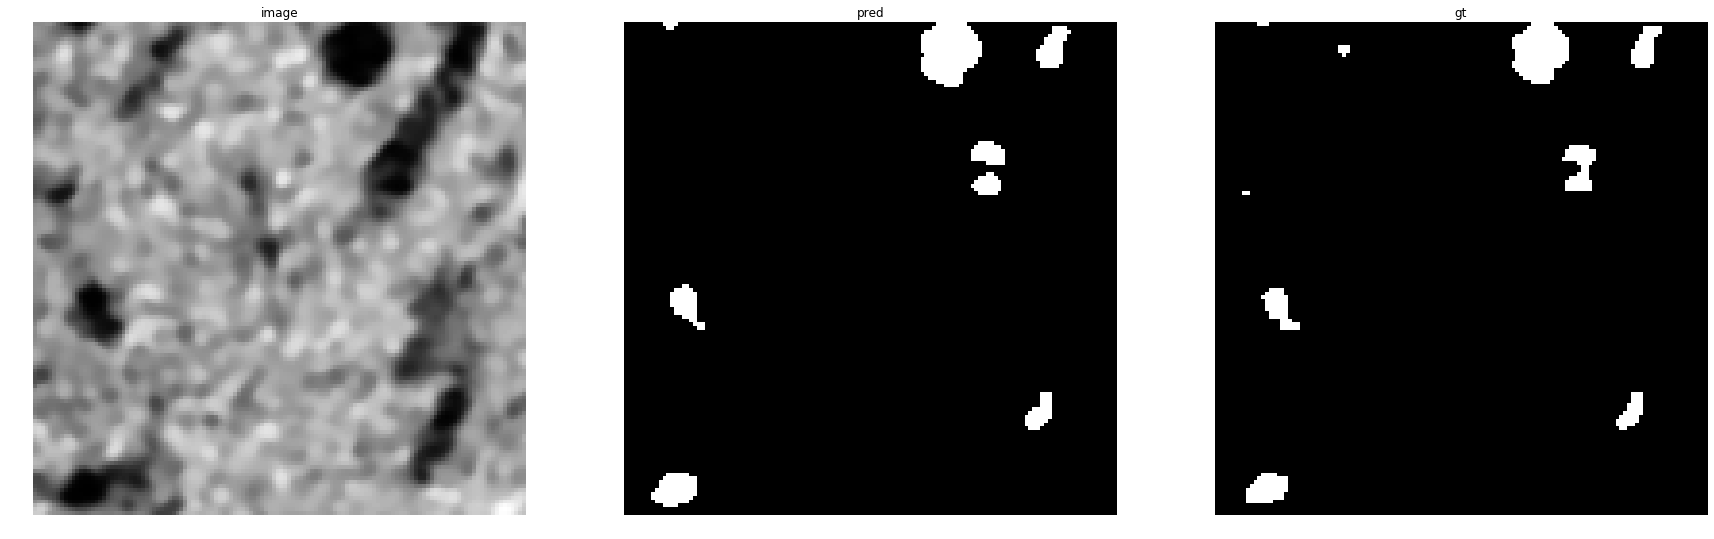

accuracy    : 0.99383544921875
precision   : 0.8555555555555555
recall      : 0.9525773195876288
f1          : 0.9014634146341464
pr_auc      : 0.9796325053413911
iou         : 0.8206039076376554


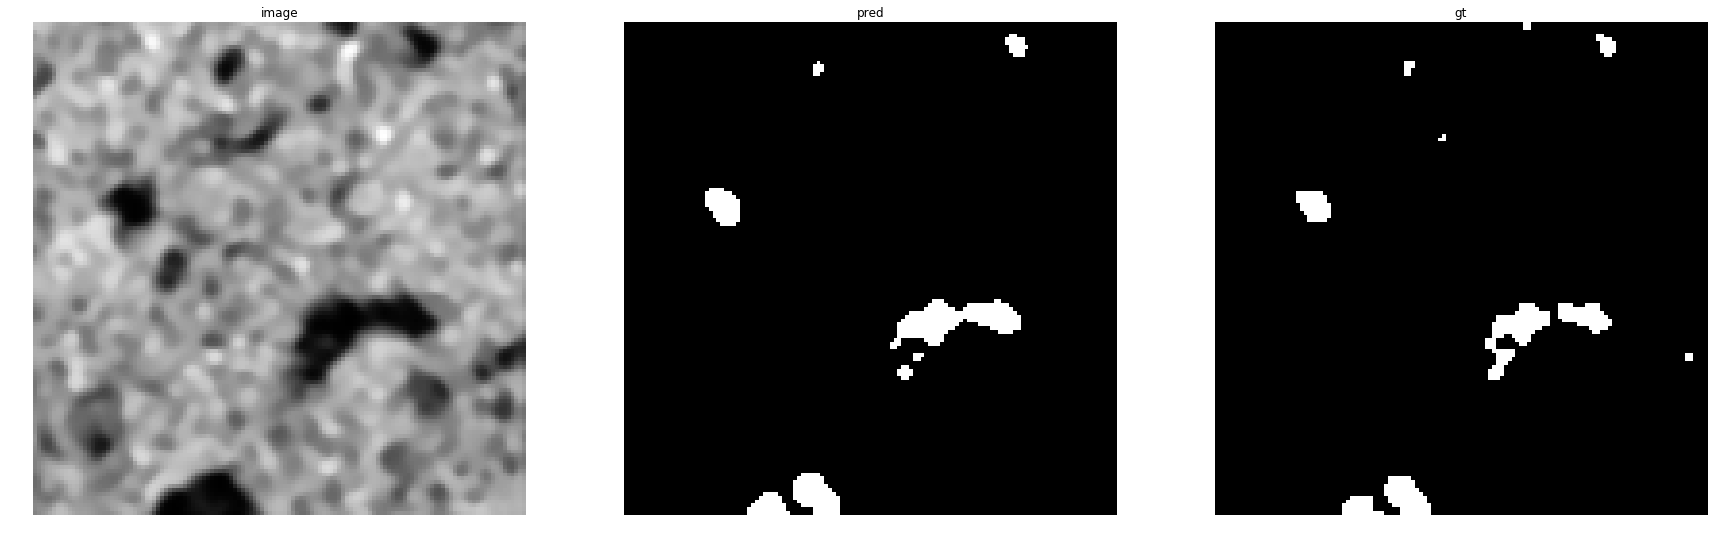

accuracy    : 0.9925537109375
precision   : 0.8234086242299795
recall      : 0.9176201372997712
f1          : 0.8679653679653679
pr_auc      : 0.9637184180487043
iou         : 0.7667304015296367


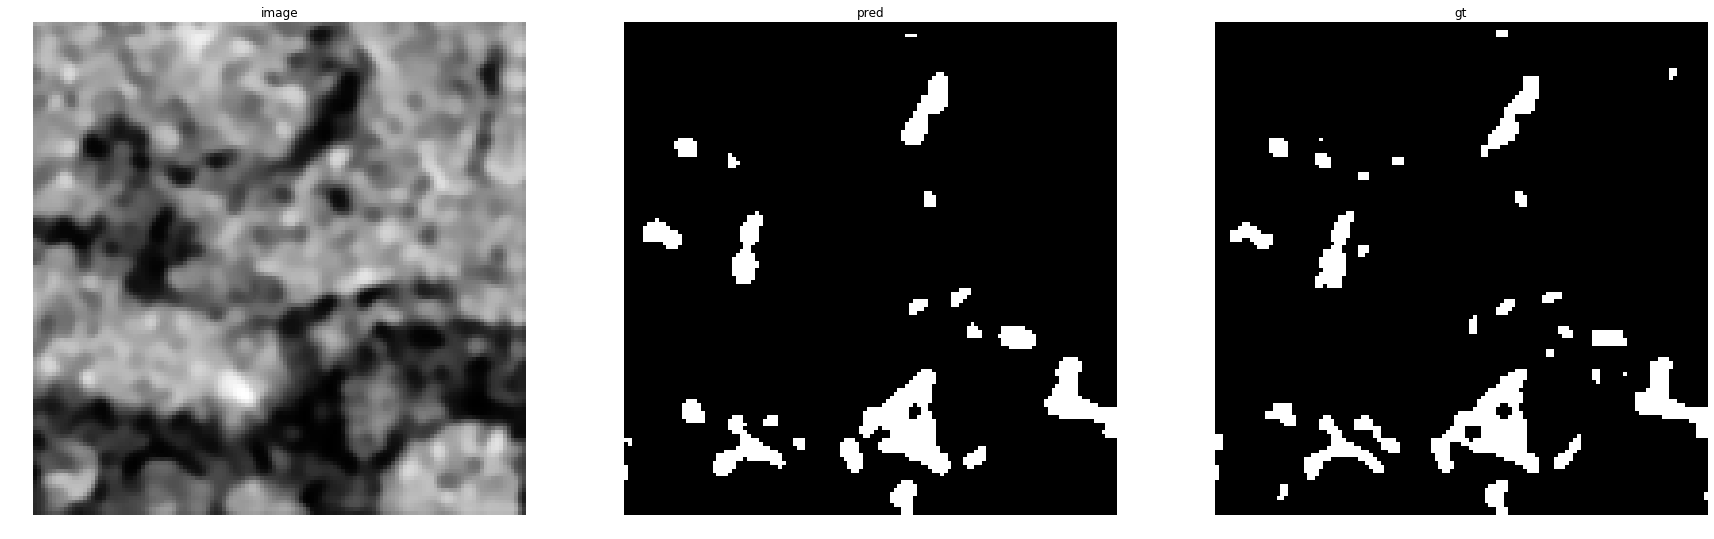

accuracy    : 0.9805908203125
precision   : 0.8839050131926122
recall      : 0.8438287153652393
f1          : 0.8634020618556701
pr_auc      : 0.9542152670070728
iou         : 0.7596371882086168


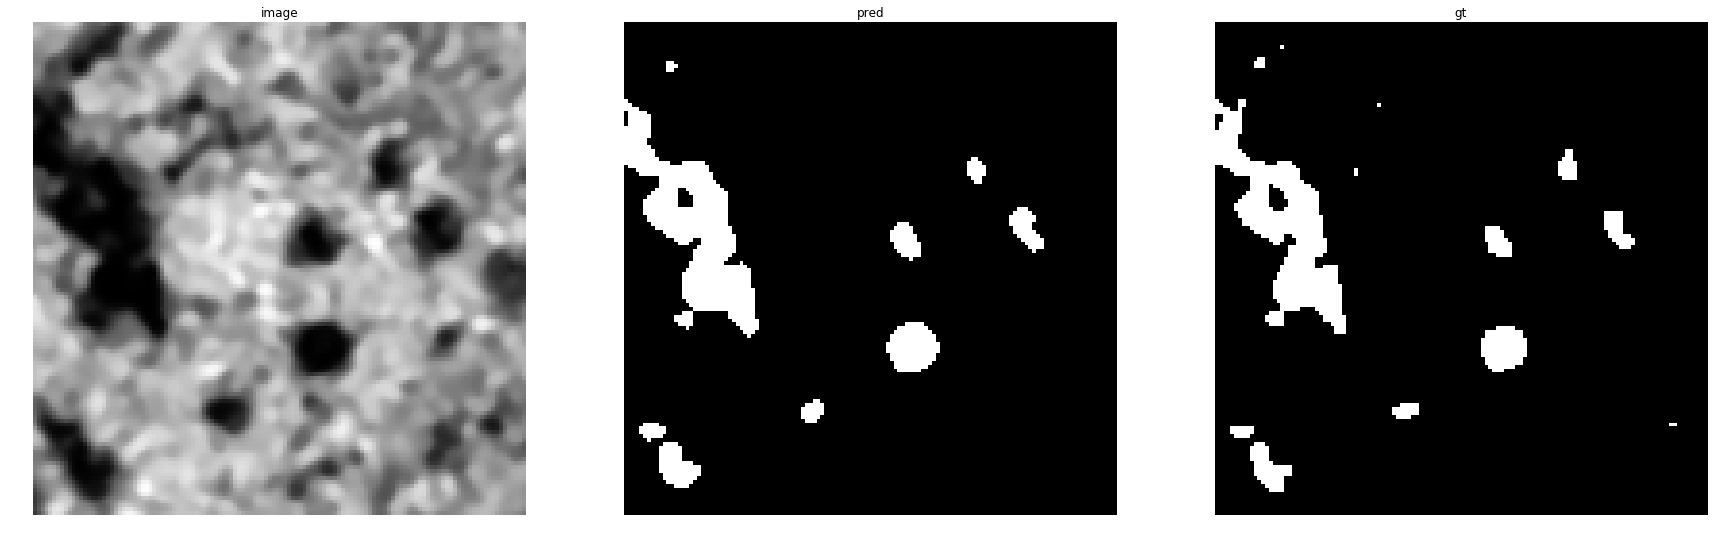

accuracy    : 0.9884033203125
precision   : 0.8767234387672344
recall      : 0.966041108132261
f1          : 0.9192176870748299
pr_auc      : 0.9881195739391568
iou         : 0.8505114083398898


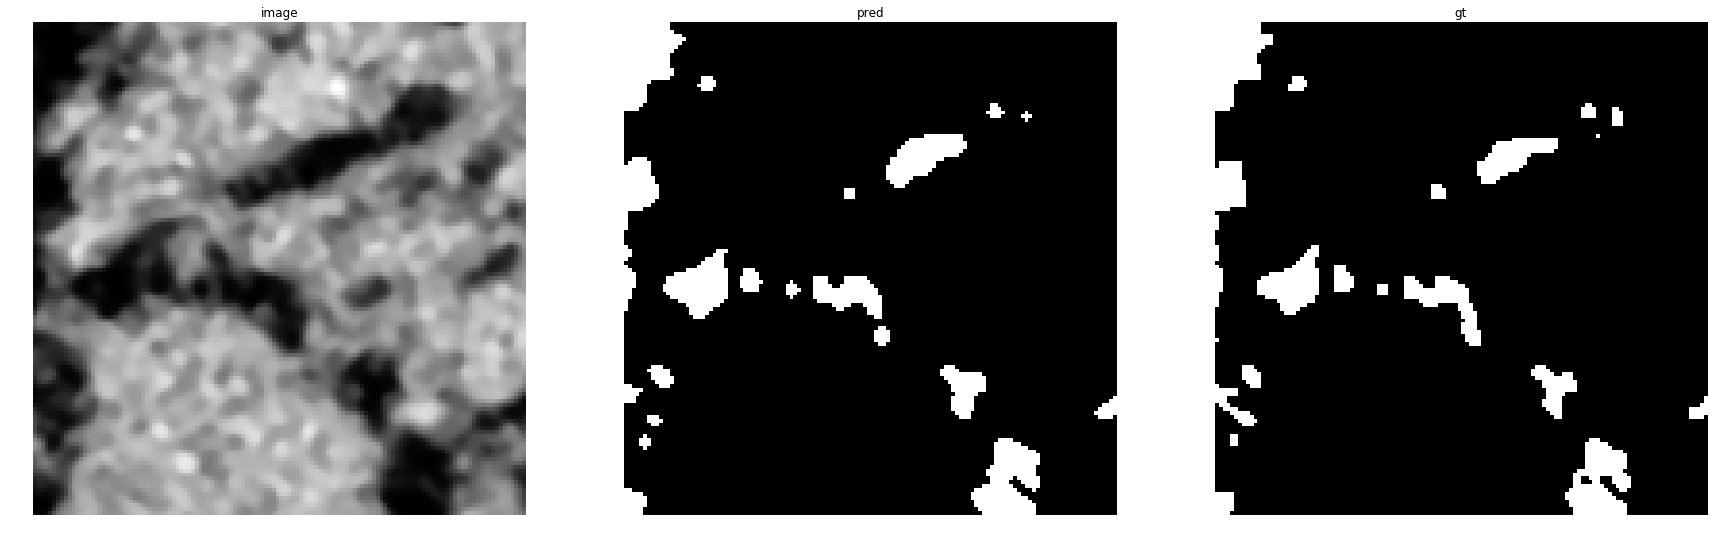

accuracy    : 0.98529052734375
precision   : 0.8796296296296297
recall      : 0.944912012241775
f1          : 0.9111029140538547
pr_auc      : 0.9808535441546135
iou         : 0.8367208672086721


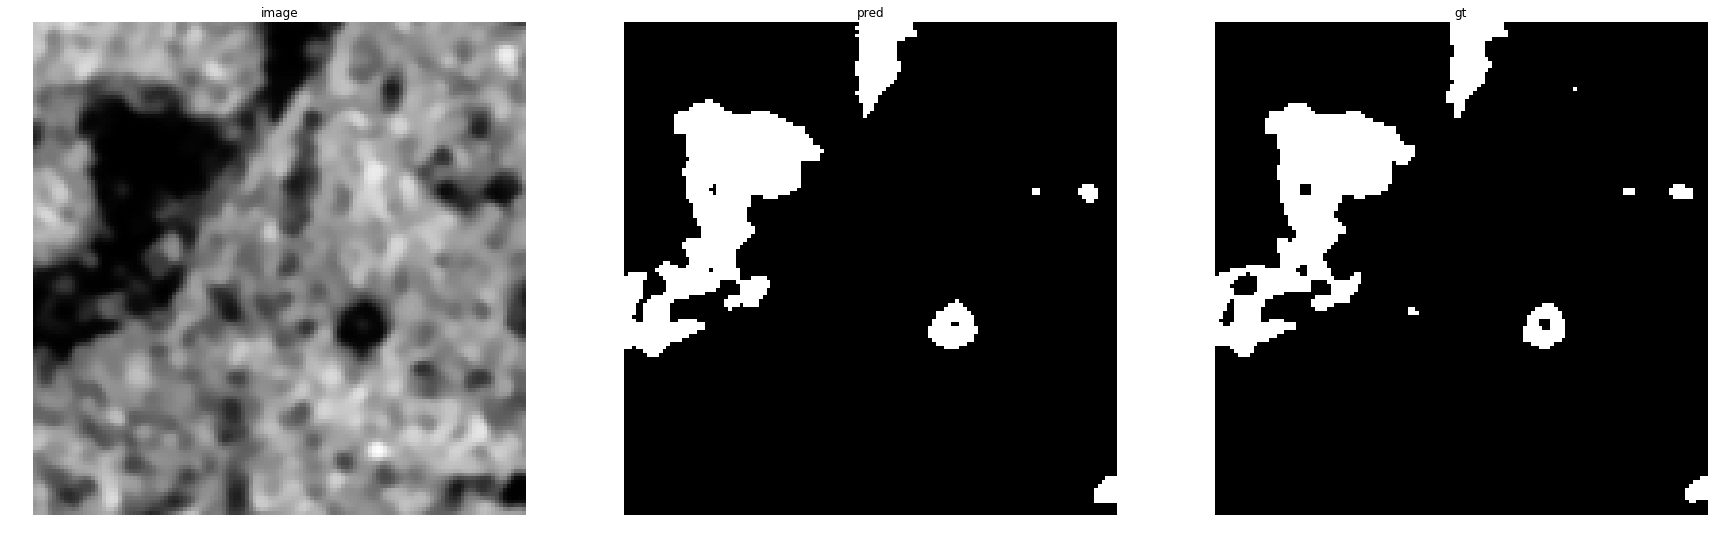

accuracy    : 0.98956298828125
precision   : 0.9270482603815937
recall      : 0.9757826343768459
f1          : 0.9507913669064748
pr_auc      : 0.9937605724104535
iou         : 0.9061985737794843


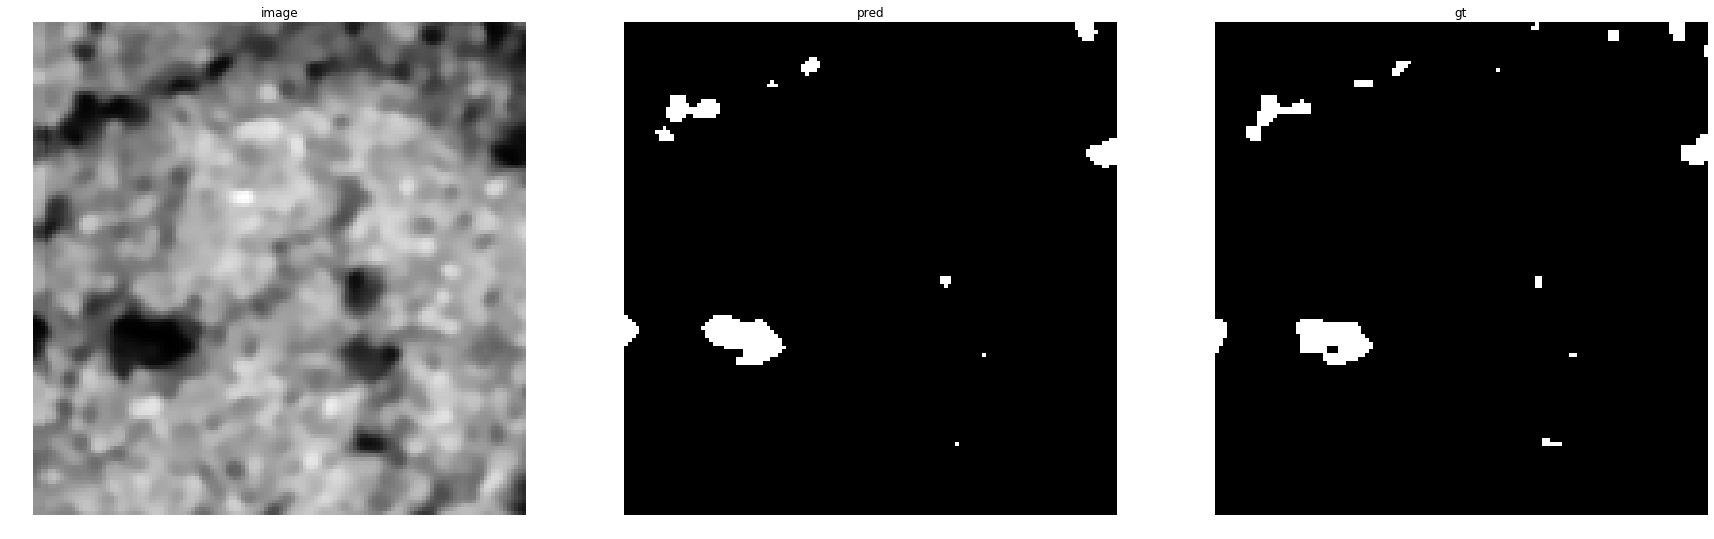

accuracy    : 0.99273681640625
precision   : 0.8419618528610354
recall      : 0.8351351351351352
f1          : 0.8385345997286295
pr_auc      : 0.943850767358246
iou         : 0.7219626168224299


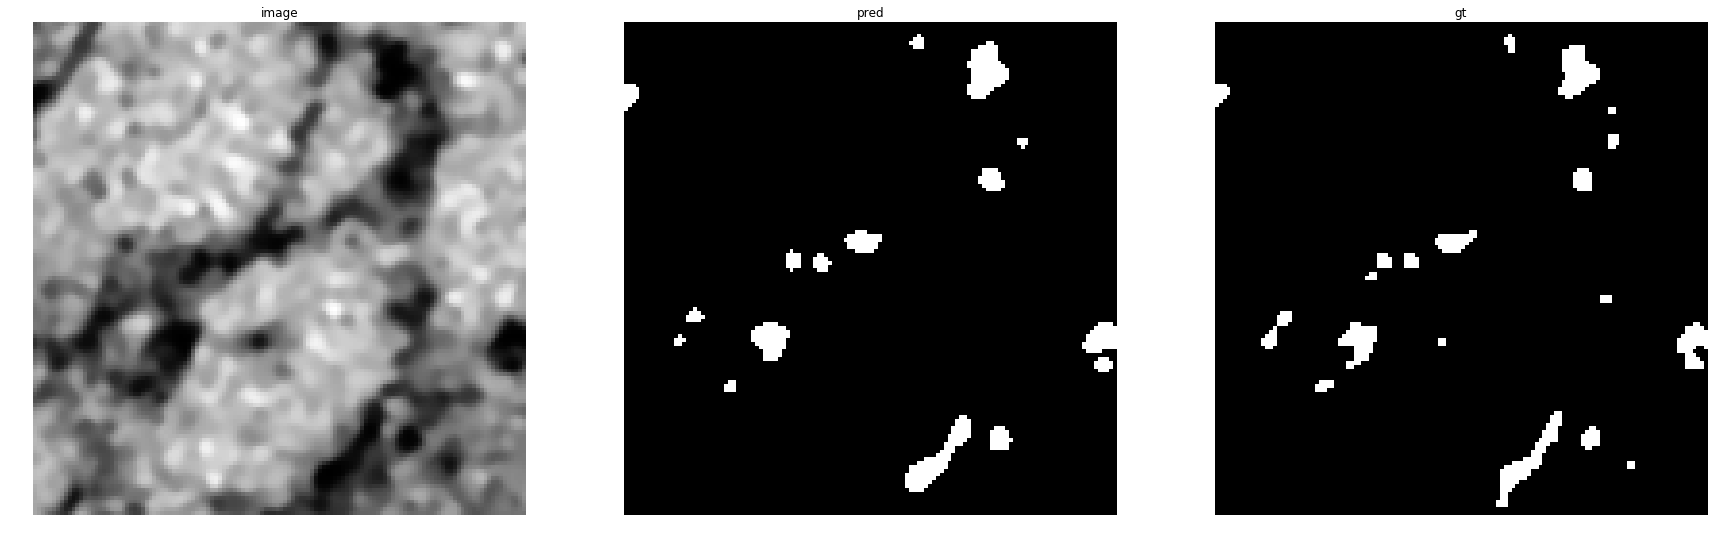

accuracy    : 0.98974609375
precision   : 0.8466898954703833
recall      : 0.8586572438162544
f1          : 0.8526315789473684
pr_auc      : 0.9443554170978227
iou         : 0.7431192660550459


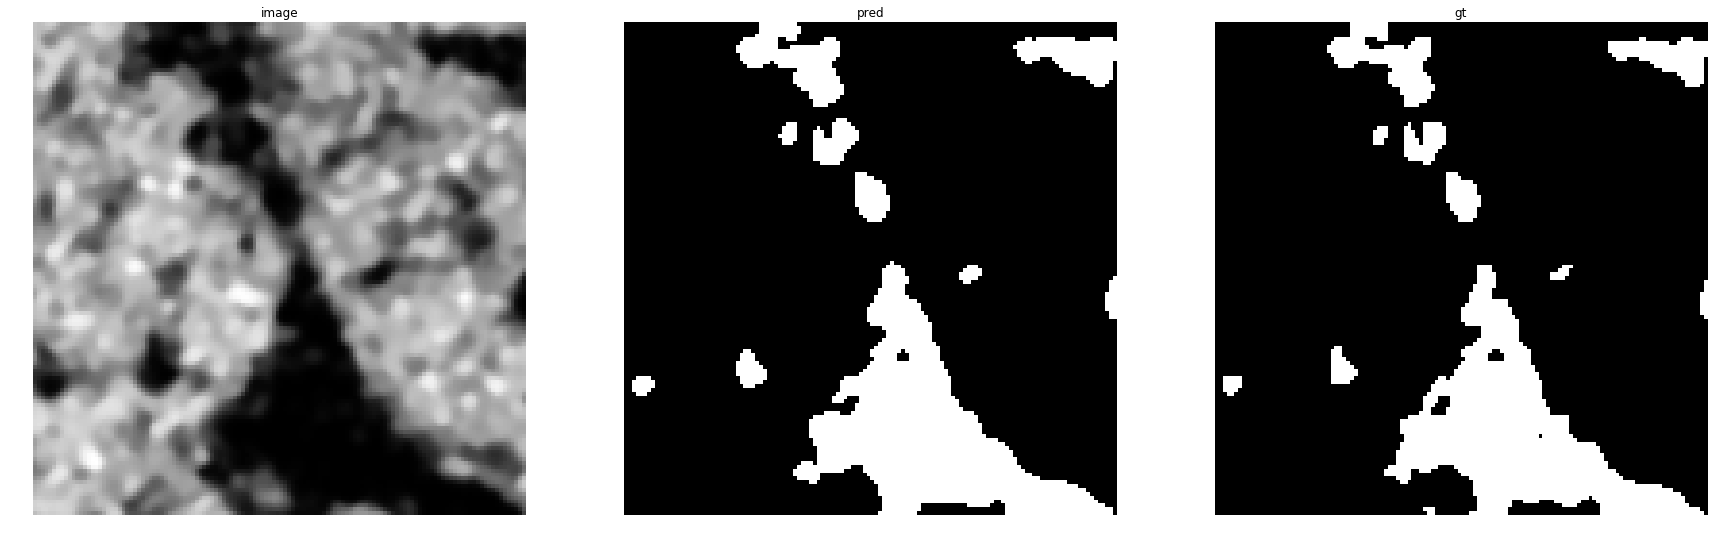

accuracy    : 0.98358154296875
precision   : 0.9165775401069519
recall      : 0.986569455103607
f1          : 0.9502864535206061
pr_auc      : 0.9956622843950647
iou         : 0.905281690140845
SoilB-2


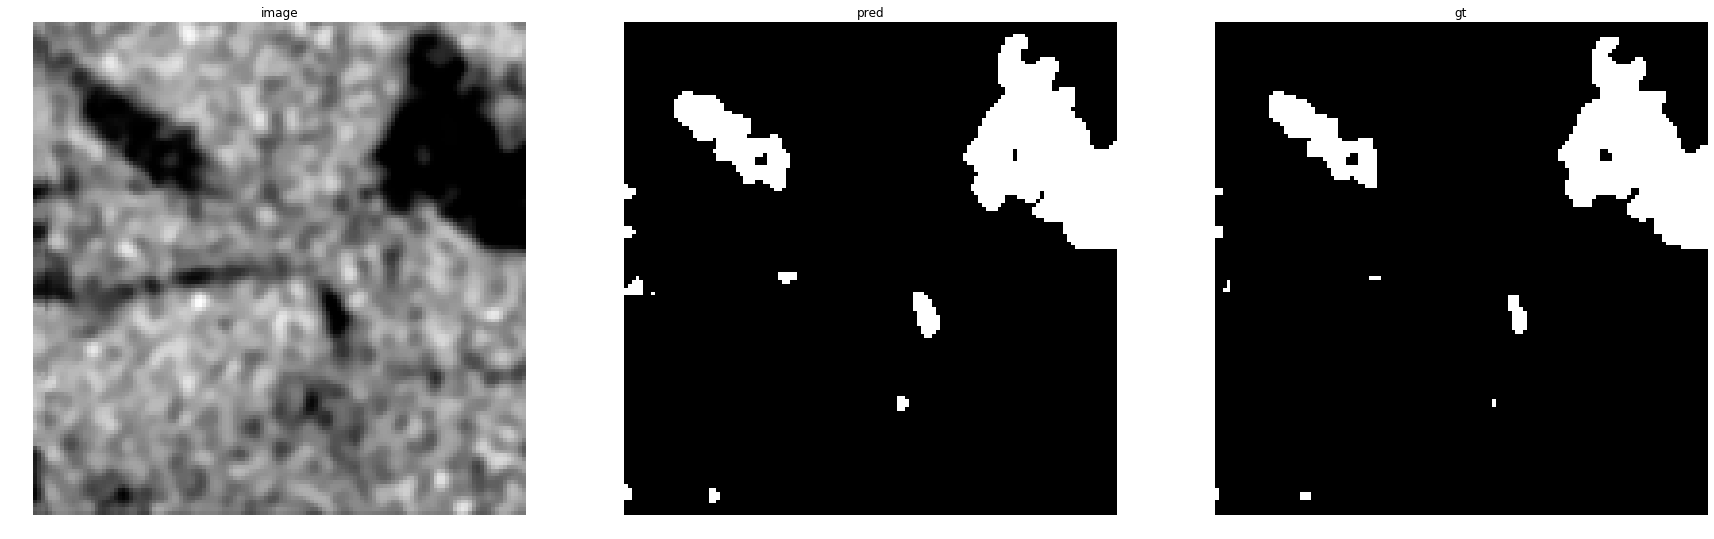

accuracy    : 0.98681640625
precision   : 0.8760757314974182
recall      : 1.0
f1          : 0.9339449541284404
pr_auc      : 0.998469543876791
iou         : 0.8760757314974182


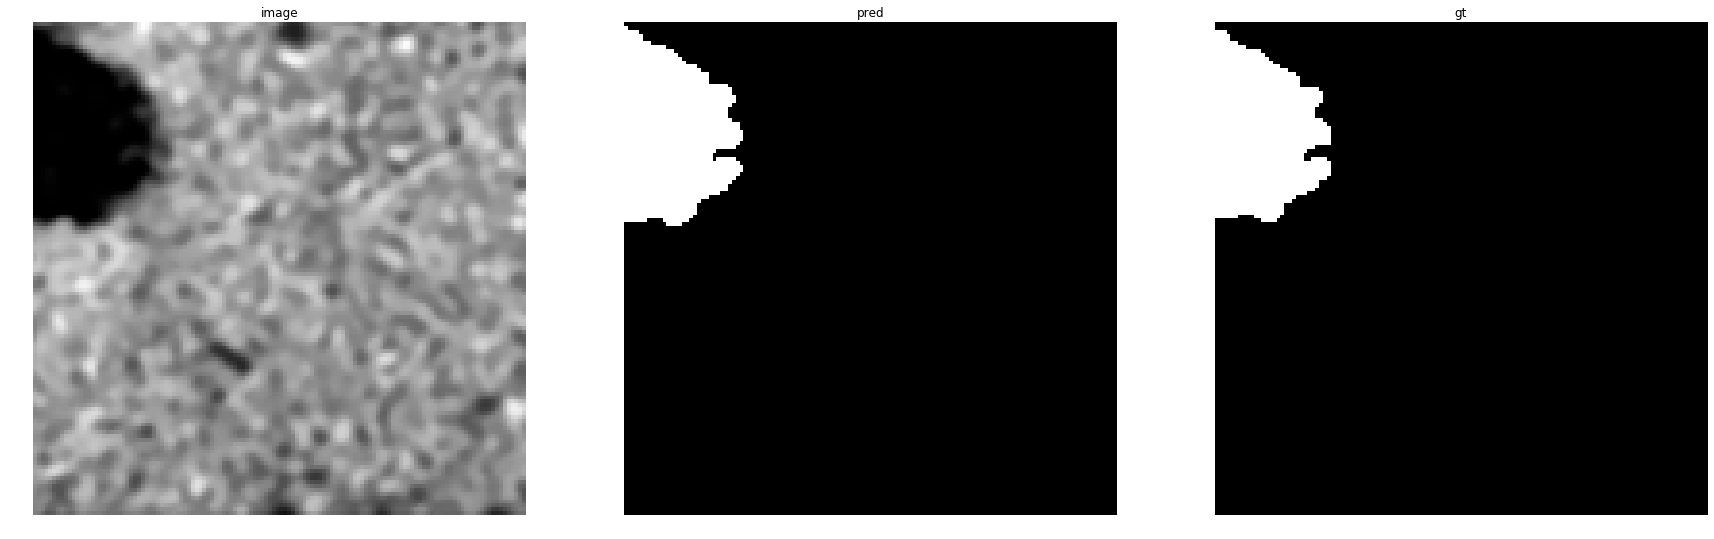

accuracy    : 0.99615478515625
precision   : 0.9453599306157849
recall      : 1.0
f1          : 0.9719126170307624
pr_auc      : 0.9998540420916588
iou         : 0.9453599306157849


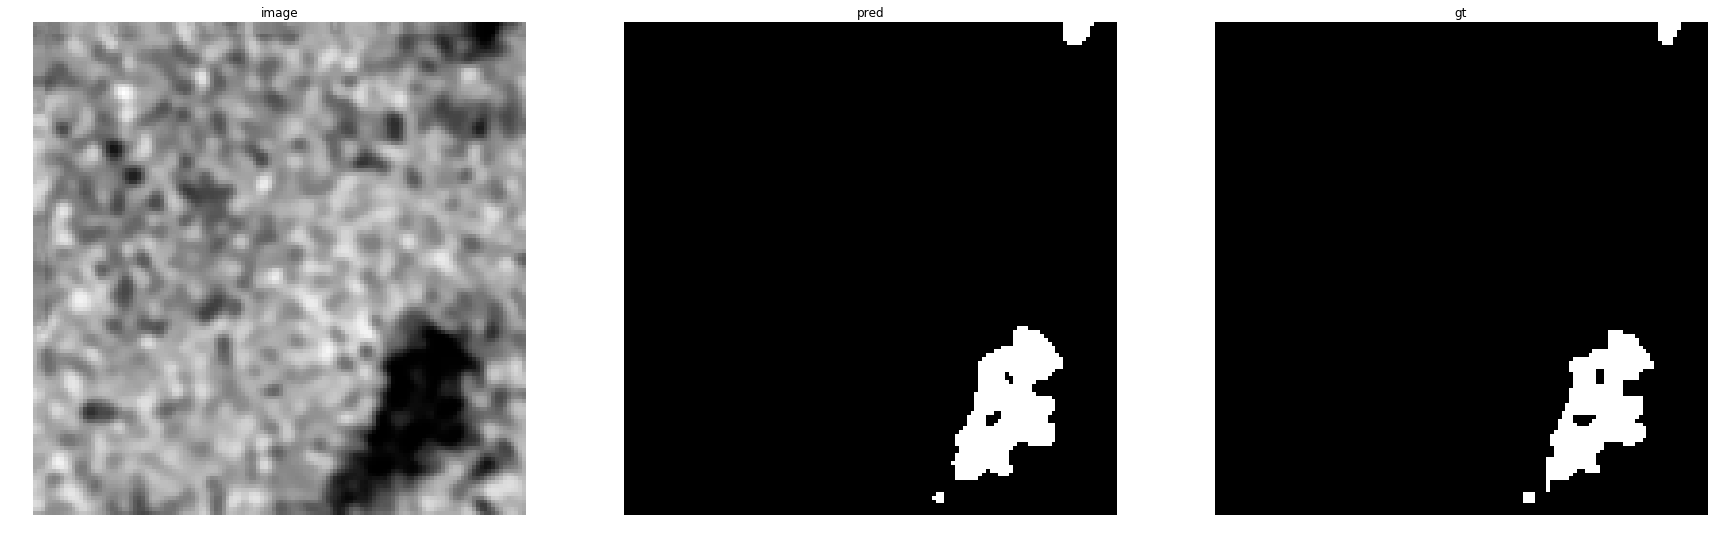

accuracy    : 0.99462890625
precision   : 0.8851063829787233
recall      : 0.9889064976228209
f1          : 0.9341317365269461
pr_auc      : 0.9951792173117786
iou         : 0.8764044943820225


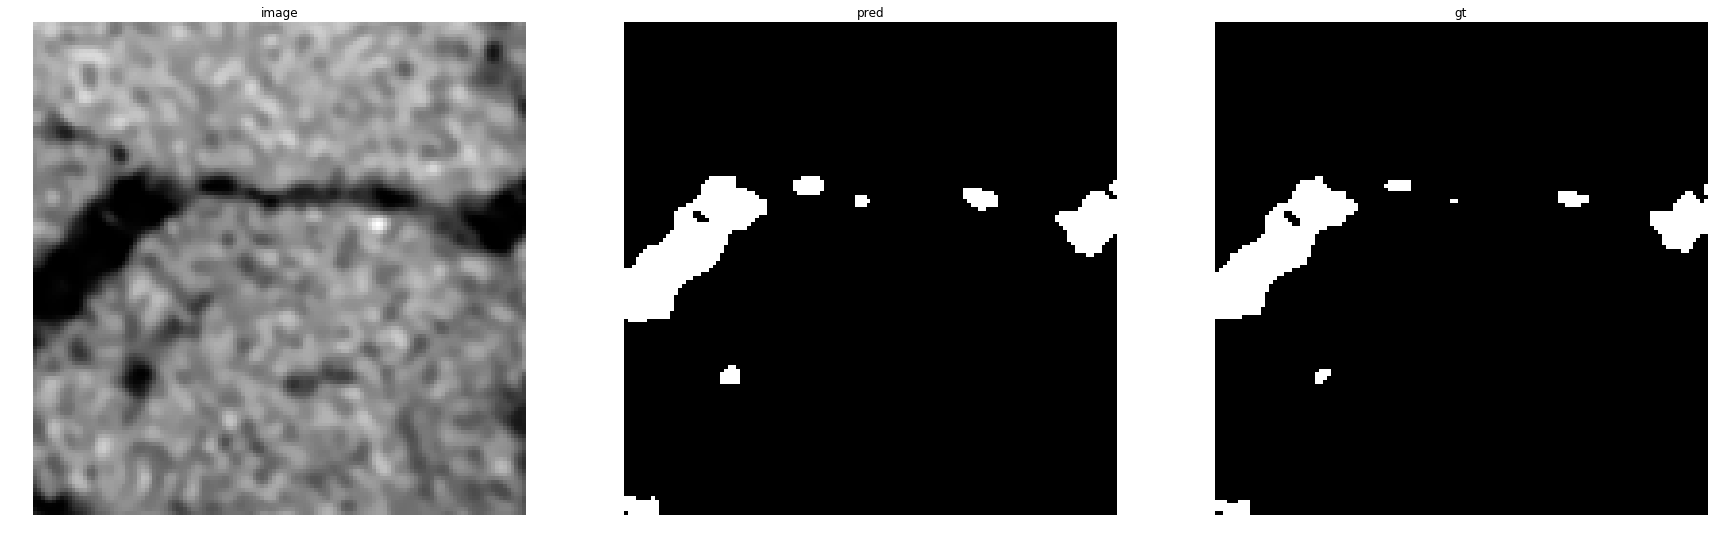

accuracy    : 0.9915771484375
precision   : 0.8539682539682539
recall      : 1.0
f1          : 0.9212328767123287
pr_auc      : 0.997592748391257
iou         : 0.8539682539682539


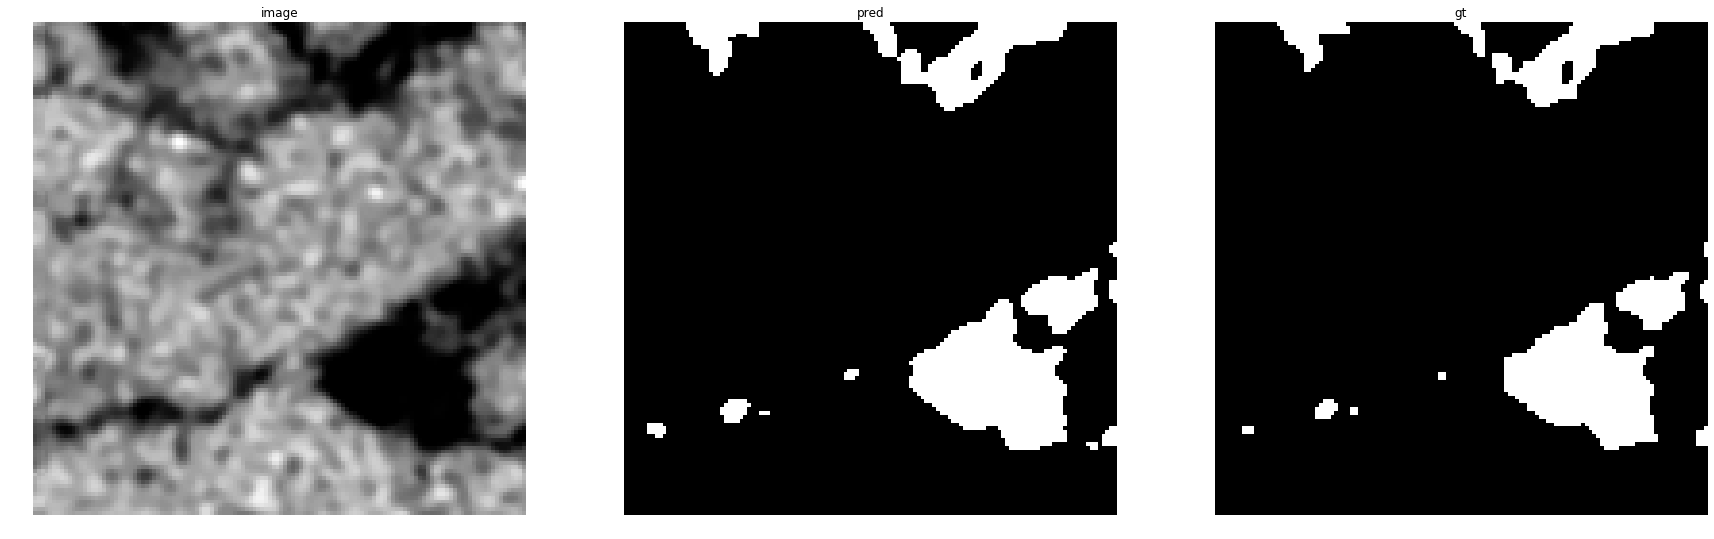

accuracy    : 0.9857177734375
precision   : 0.8796833773087072
recall      : 0.9964136282127914
f1          : 0.9344170403587444
pr_auc      : 0.9975758176316776
iou         : 0.8769068911099421


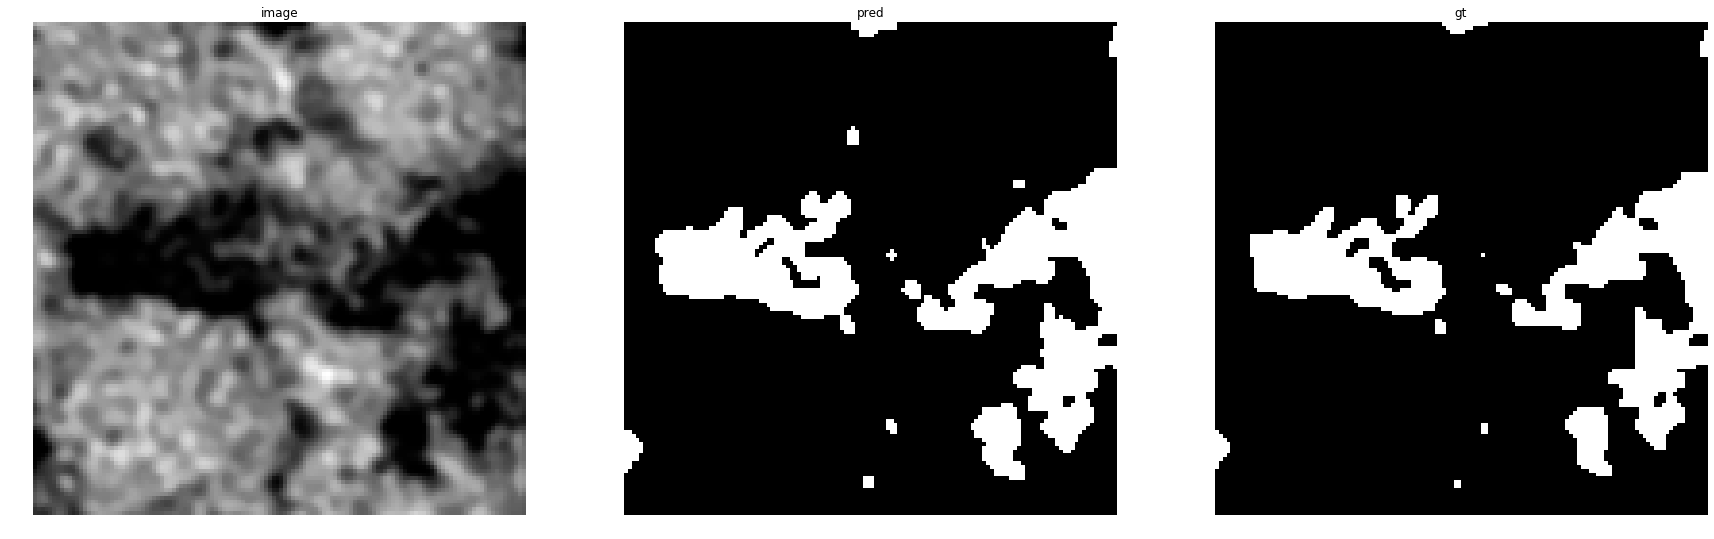

accuracy    : 0.97552490234375
precision   : 0.8594192634560907
recall      : 0.9983545865898807
f1          : 0.9236917221693626
pr_auc      : 0.9966111430936531
iou         : 0.8582036775106082


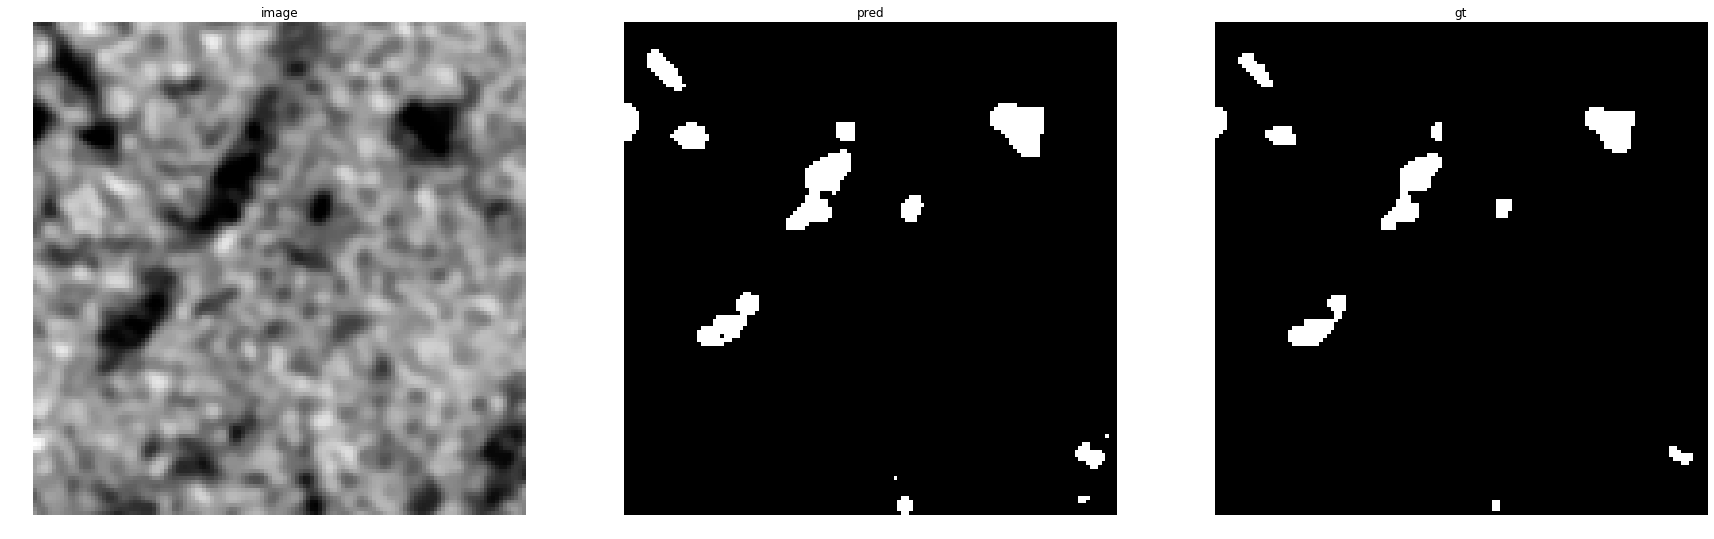

accuracy    : 0.9886474609375
precision   : 0.7223065250379362
recall      : 0.9937369519832986
f1          : 0.8365553602811949
pr_auc      : 0.9849399359516888
iou         : 0.7190332326283988


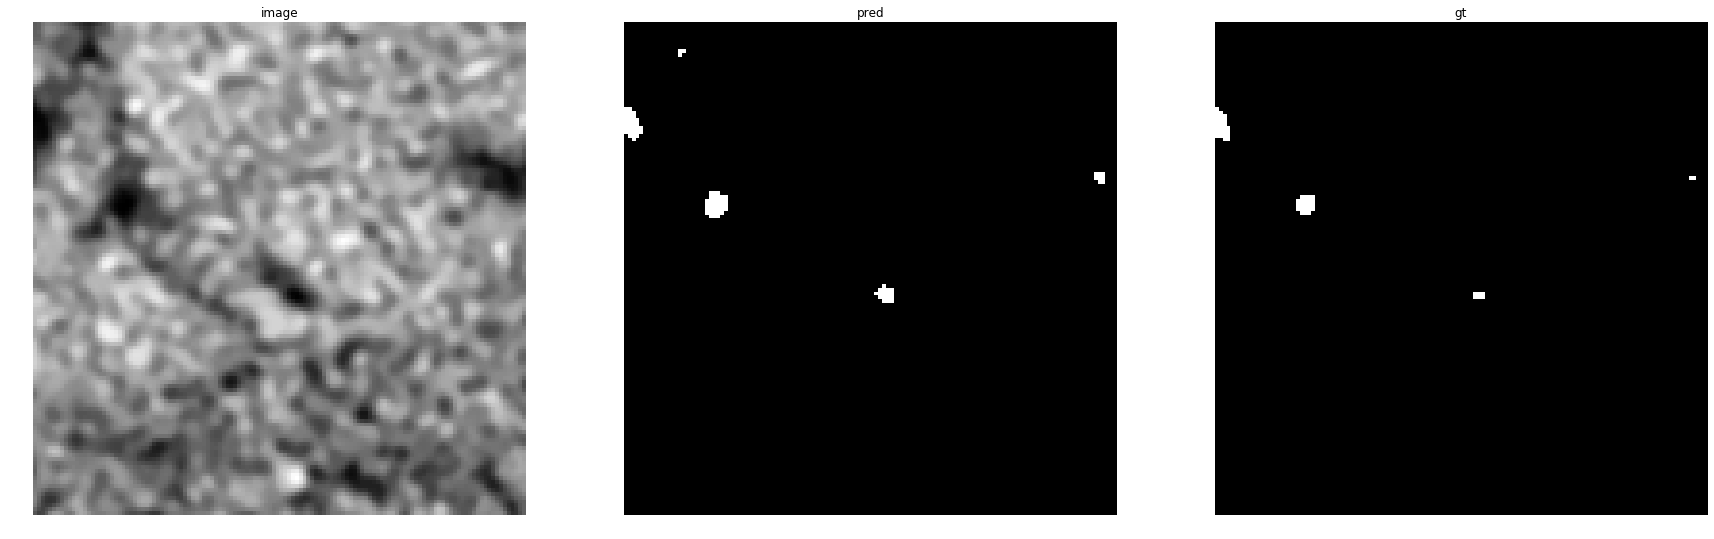

accuracy    : 0.99755859375
precision   : 0.5869565217391305
recall      : 0.9642857142857143
f1          : 0.7297297297297297
pr_auc      : 0.9420001968983825
iou         : 0.574468085106383


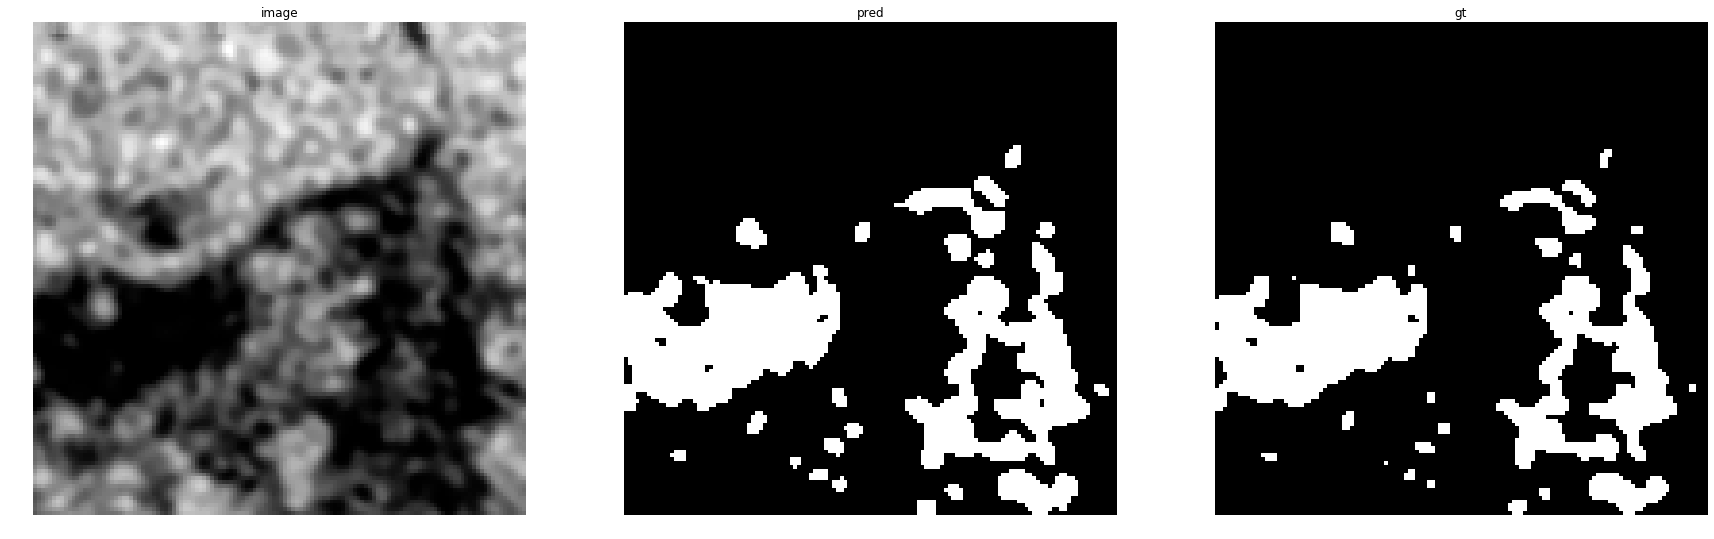

accuracy    : 0.96942138671875
precision   : 0.8473684210526315
recall      : 0.9970856102003643
f1          : 0.9161506276150627
pr_auc      : 0.9956002011554973
iou         : 0.8452748610253242


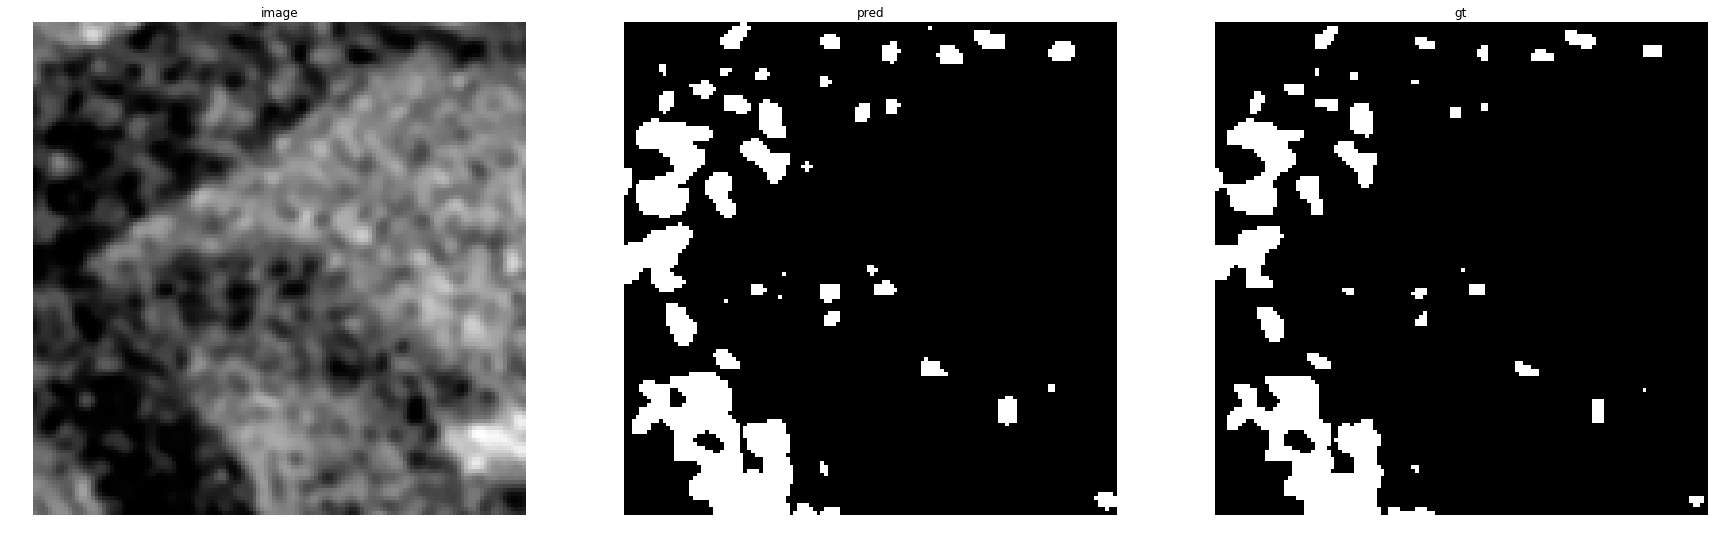

accuracy    : 0.97222900390625
precision   : 0.7919621749408984
recall      : 0.9911242603550295
f1          : 0.8804204993429698
pr_auc      : 0.991289450666864
iou         : 0.7863849765258216
TeTree_subset1


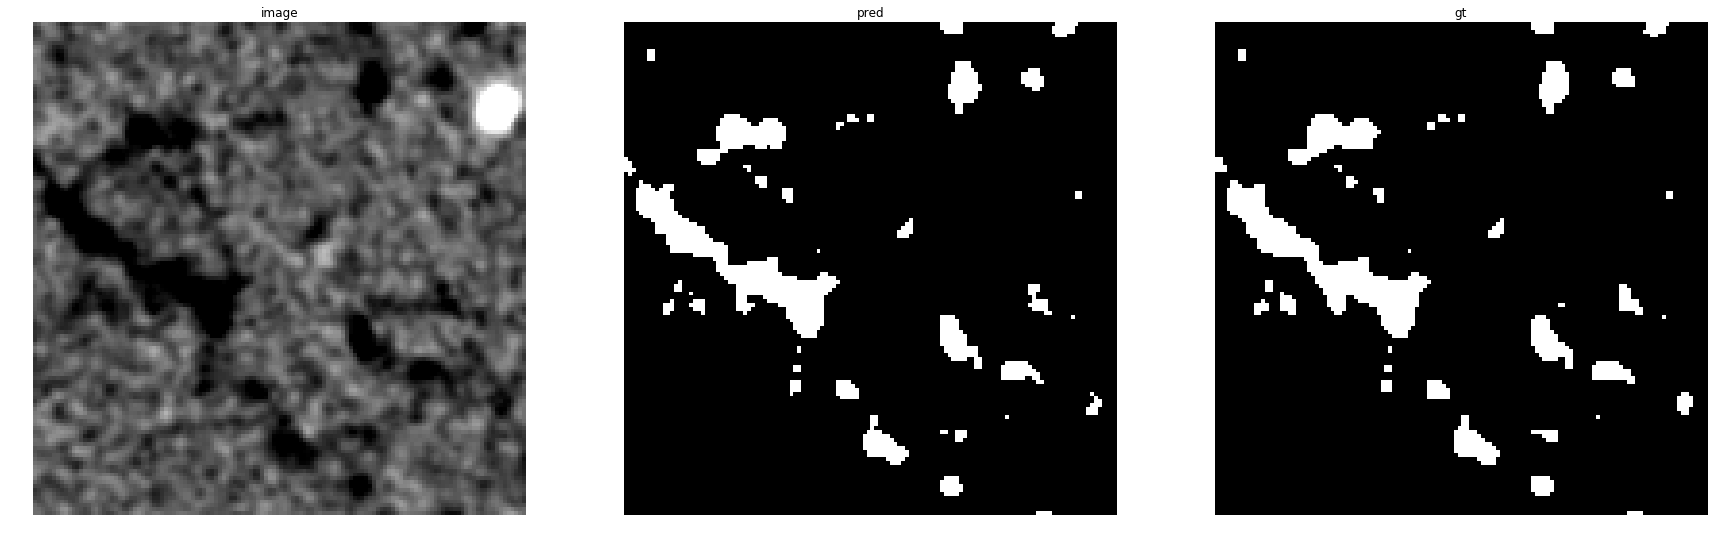

accuracy    : 0.99310302734375
precision   : 0.9838449111470113
recall      : 0.9290617848970252
f1          : 0.9556688897606904
pr_auc      : 0.993135480492321
iou         : 0.9151014274981217


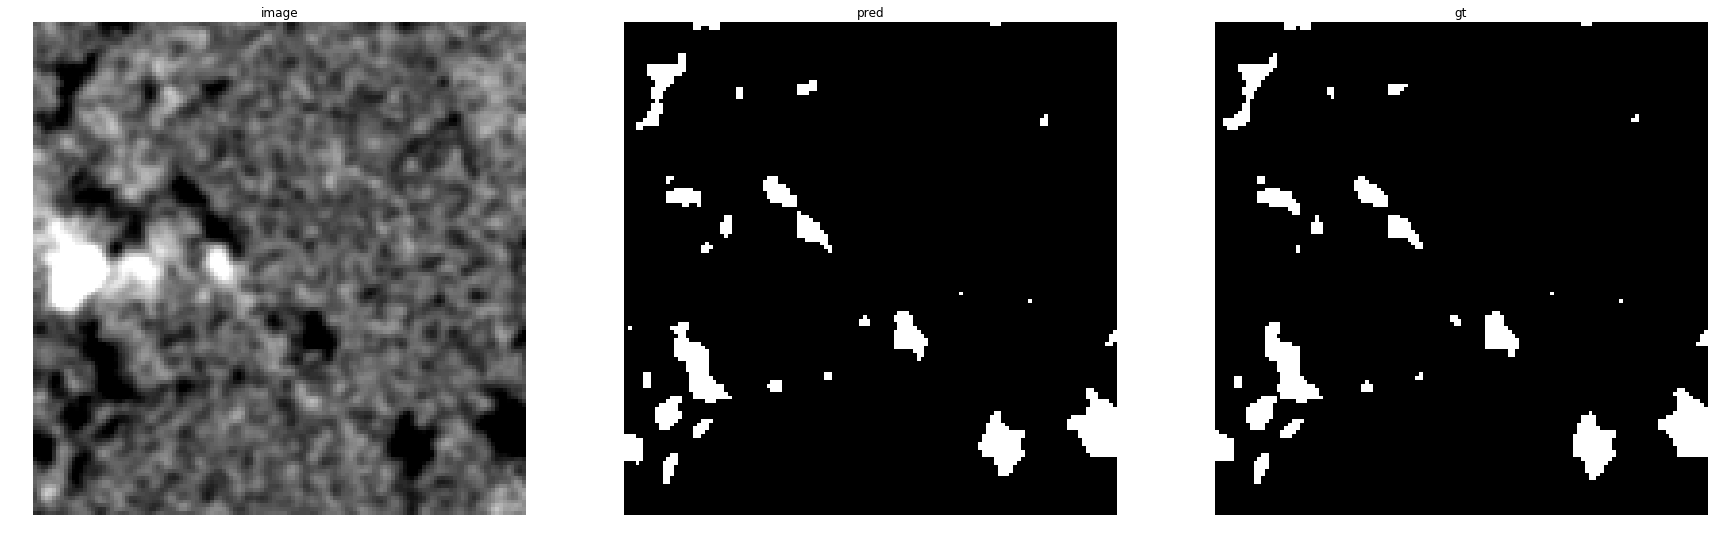

accuracy    : 0.99359130859375
precision   : 0.9477196885428254
recall      : 0.9362637362637363
f1          : 0.9419568822553898
pr_auc      : 0.9893637327573067
iou         : 0.890282131661442


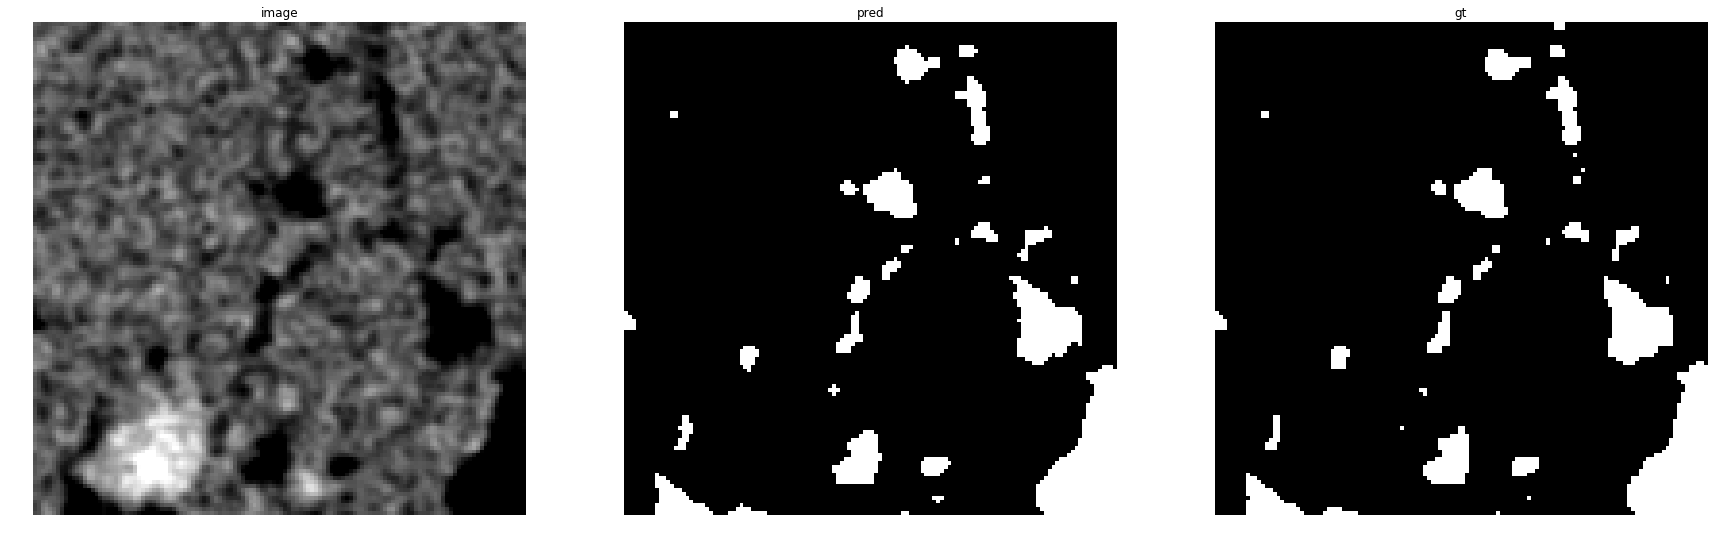

accuracy    : 0.993896484375
precision   : 0.9715796430931923
recall      : 0.962671905697446
f1          : 0.9671052631578947
pr_auc      : 0.9965656663588297
iou         : 0.9363057324840764


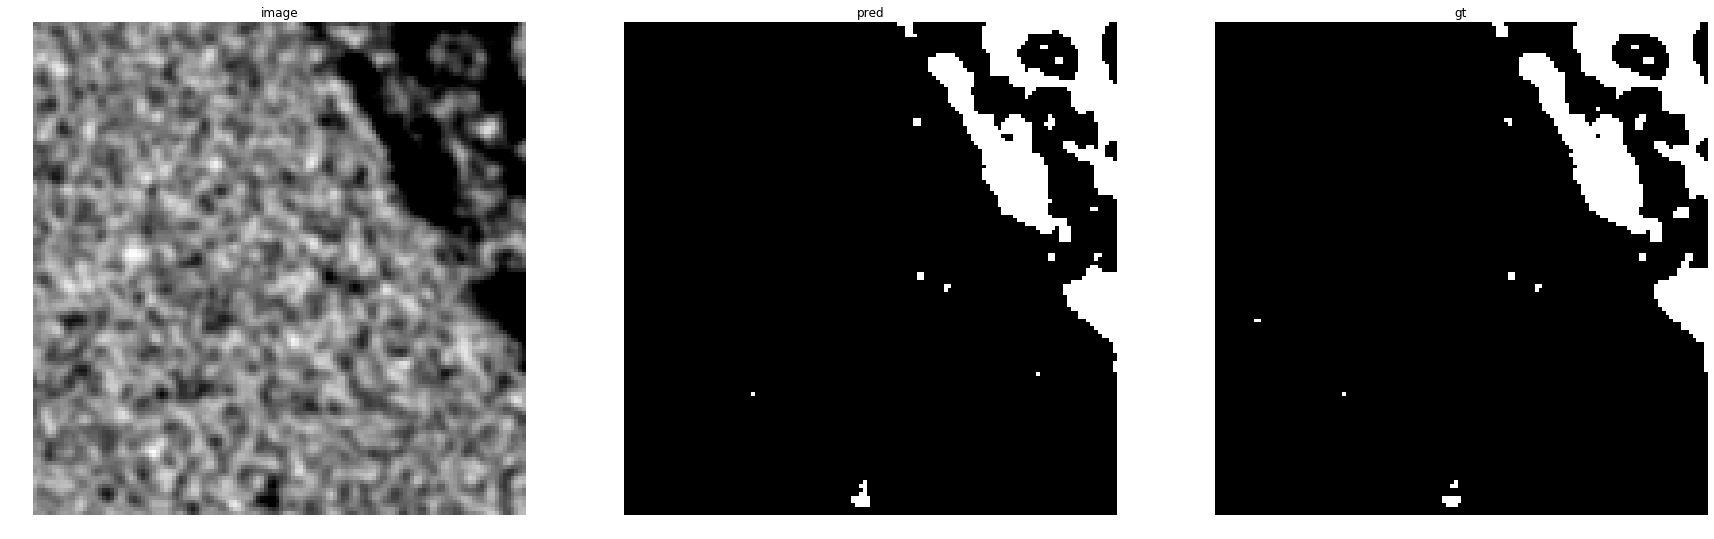

accuracy    : 0.99346923828125
precision   : 0.9920806335493161
recall      : 0.9348710990502035
f1          : 0.9626266154383514
pr_auc      : 0.9966325426203402
iou         : 0.927946127946128


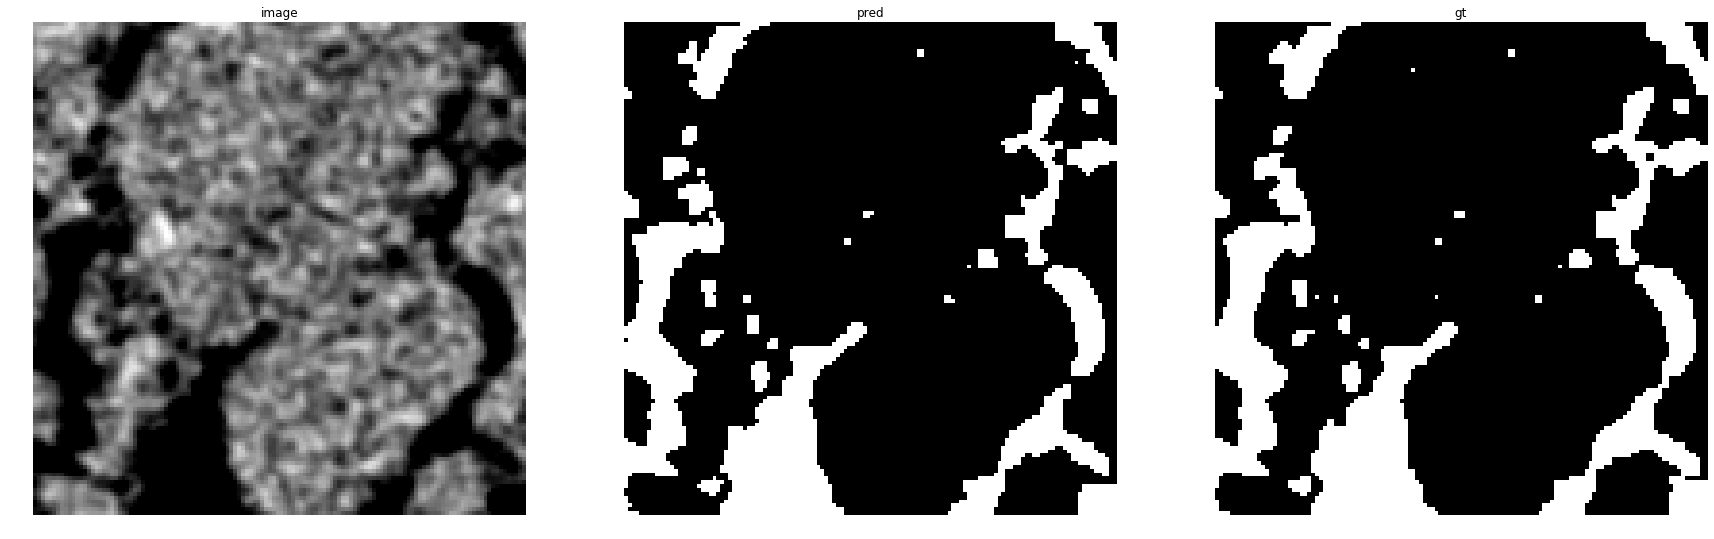

accuracy    : 0.98443603515625
precision   : 0.9915662650602409
recall      : 0.9354930377948281
f1          : 0.9627138470536629
pr_auc      : 0.9961842223401238
iou         : 0.9281082605018325


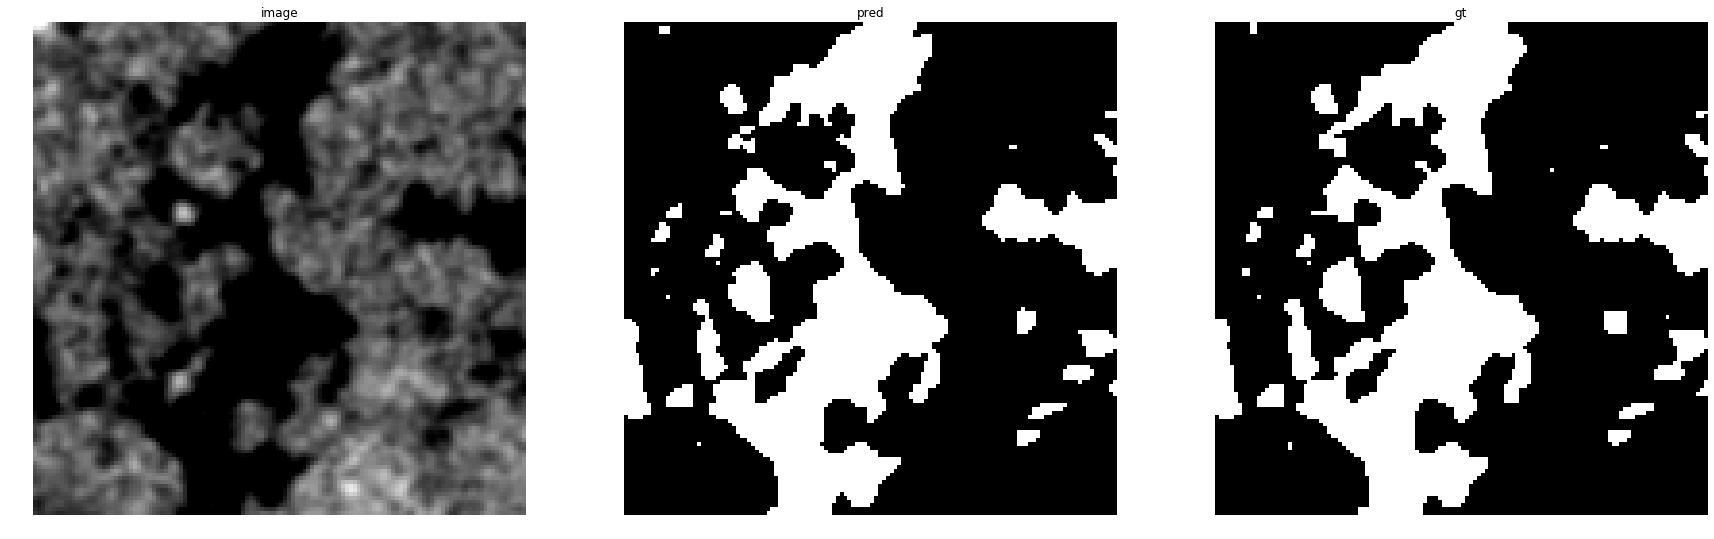

accuracy    : 0.98583984375
precision   : 0.9941638608305275
recall      : 0.9555555555555556
f1          : 0.9744774477447745
pr_auc      : 0.9984135938602425
iou         : 0.9502252735464493


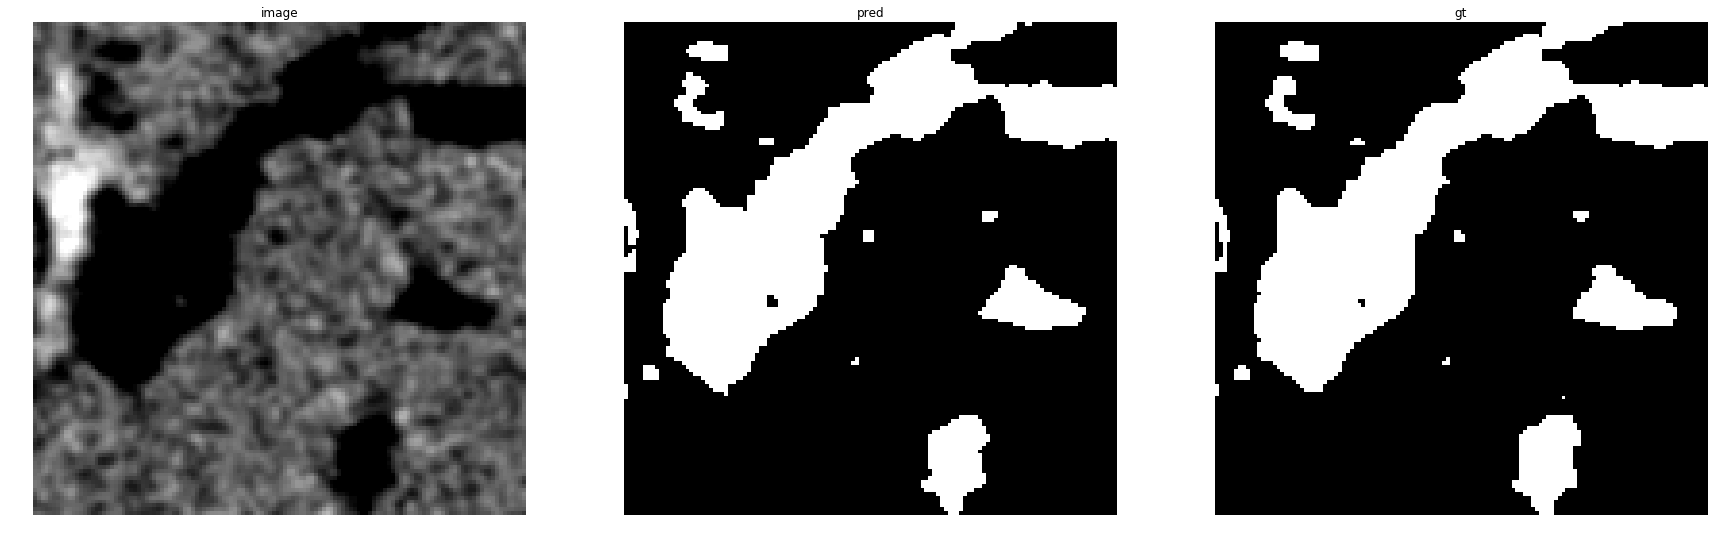

accuracy    : 0.99261474609375
precision   : 0.9910348360655737
recall      : 0.9782553729456385
f1          : 0.9846036391398396
pr_auc      : 0.9992633987669877
iou         : 0.9696741854636591


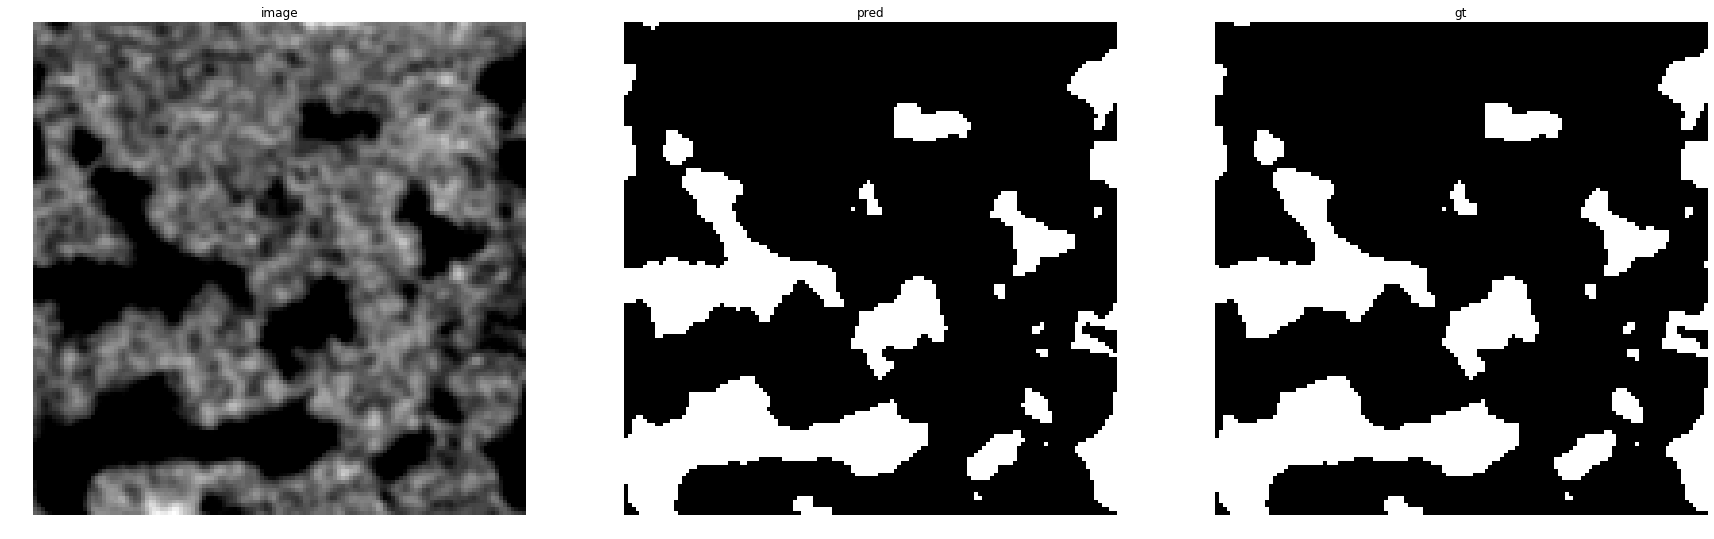

accuracy    : 0.98846435546875
precision   : 0.9965006729475101
recall      : 0.9546157813305828
f1          : 0.9751086527064402
pr_auc      : 0.9989672062099542
iou         : 0.9514263685427911


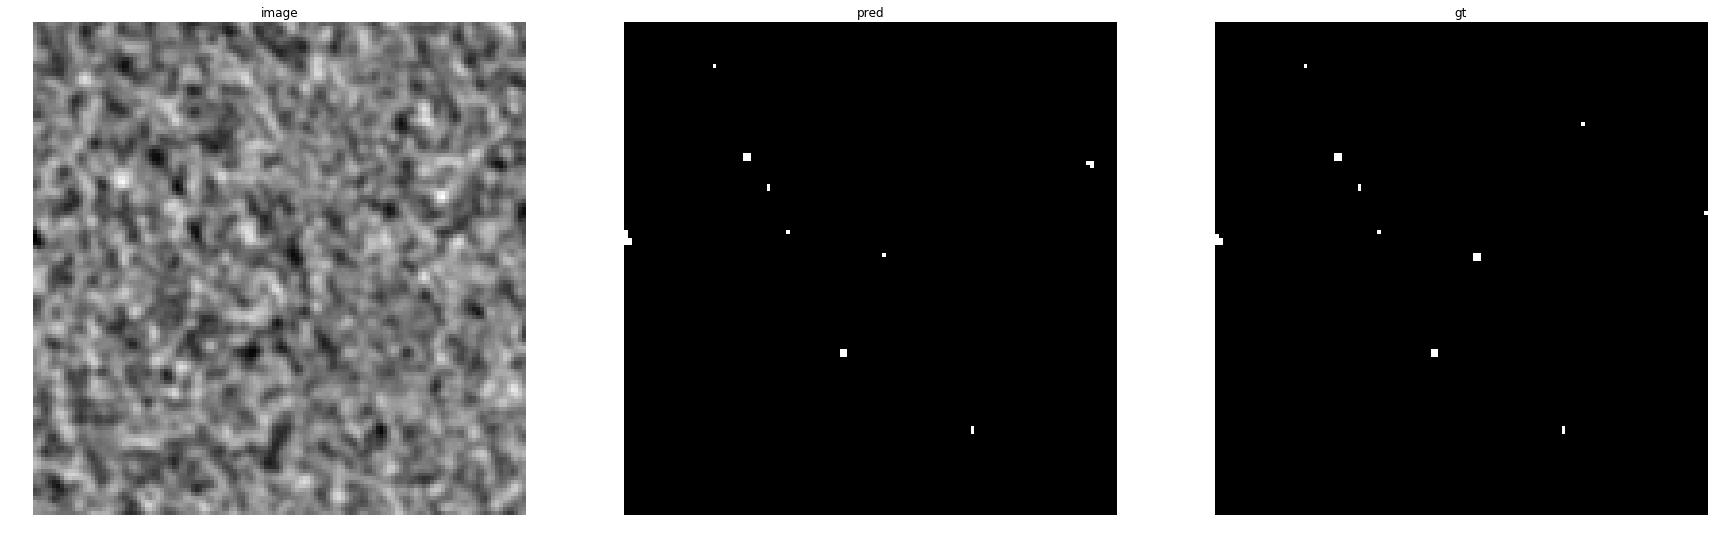

accuracy    : 0.99945068359375
precision   : 0.8333333333333334
recall      : 0.8
f1          : 0.816326530612245
pr_auc      : 0.9178968488442174
iou         : 0.6896551724137931


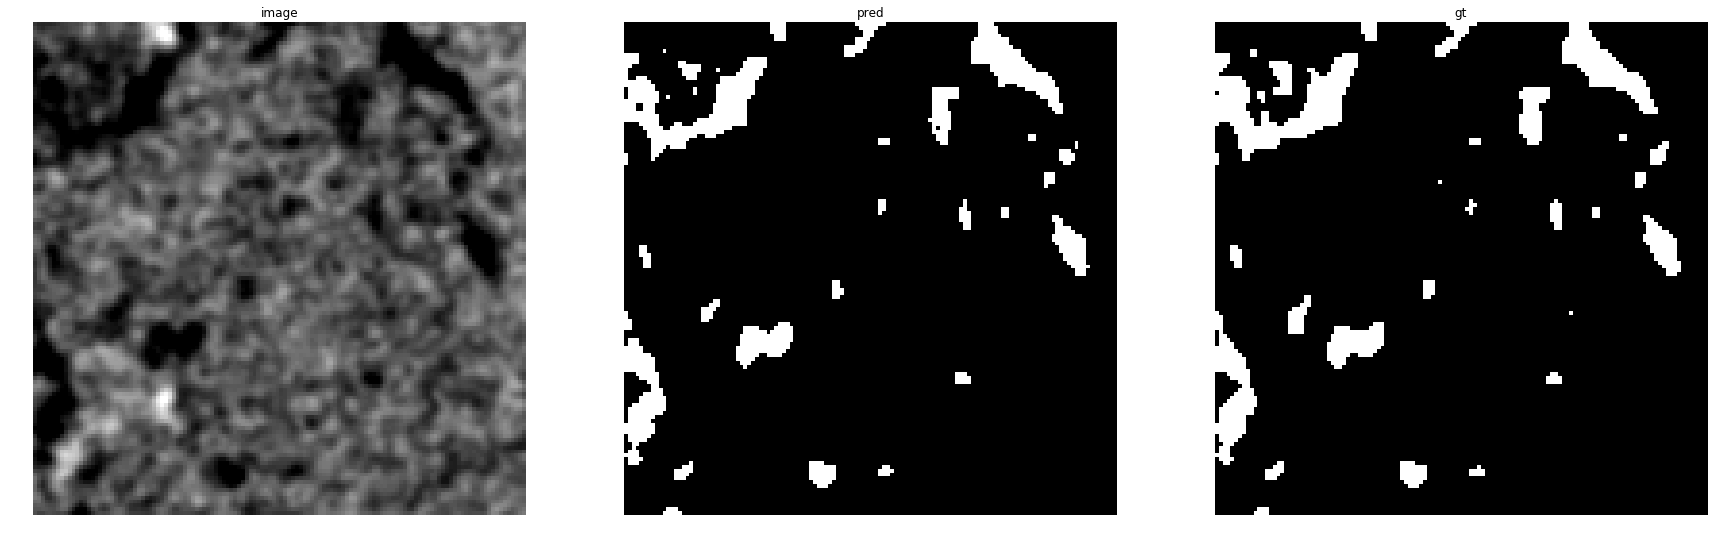

accuracy    : 0.98895263671875
precision   : 0.9900914634146342
recall      : 0.885480572597137
f1          : 0.9348686577905722
pr_auc      : 0.9909888552377908
iou         : 0.8777027027027027
TiTree_subset2


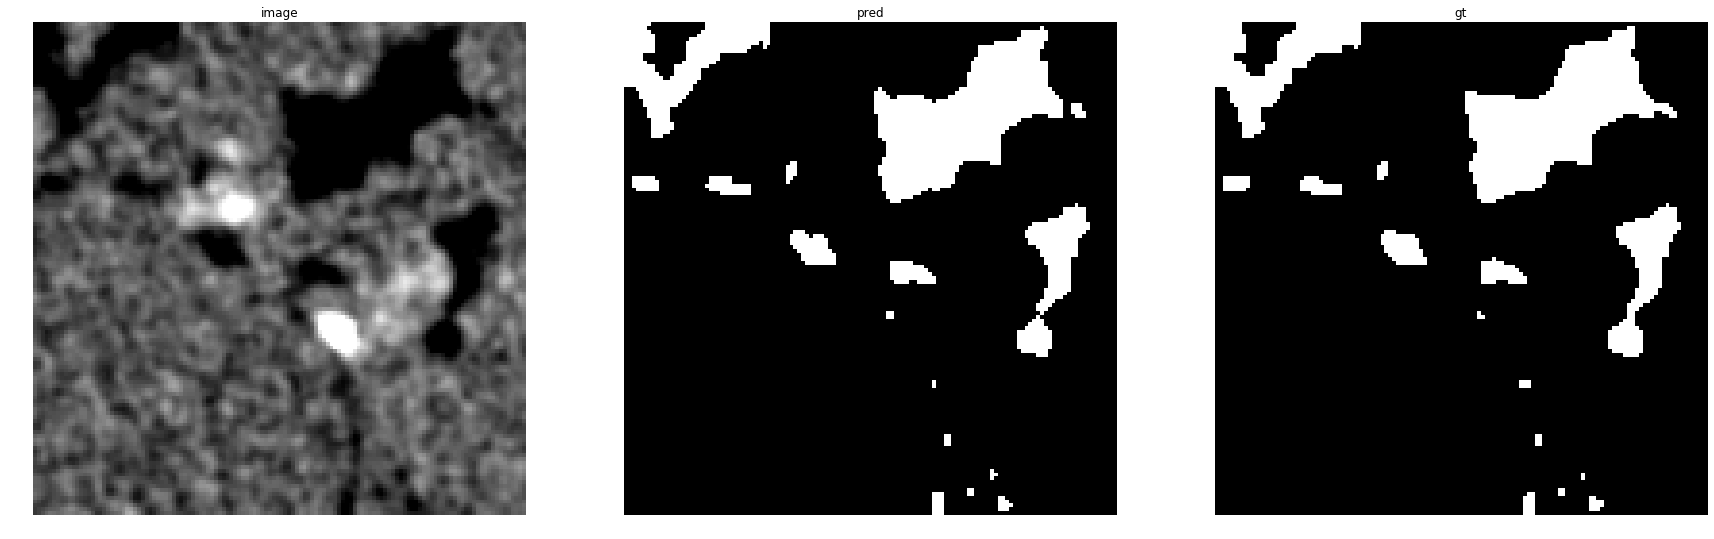

accuracy    : 0.994873046875
precision   : 0.9897148200093502
recall      : 0.9715465810004589
f1          : 0.9805465493283927
pr_auc      : 0.9988703204620198
iou         : 0.9618355293048614


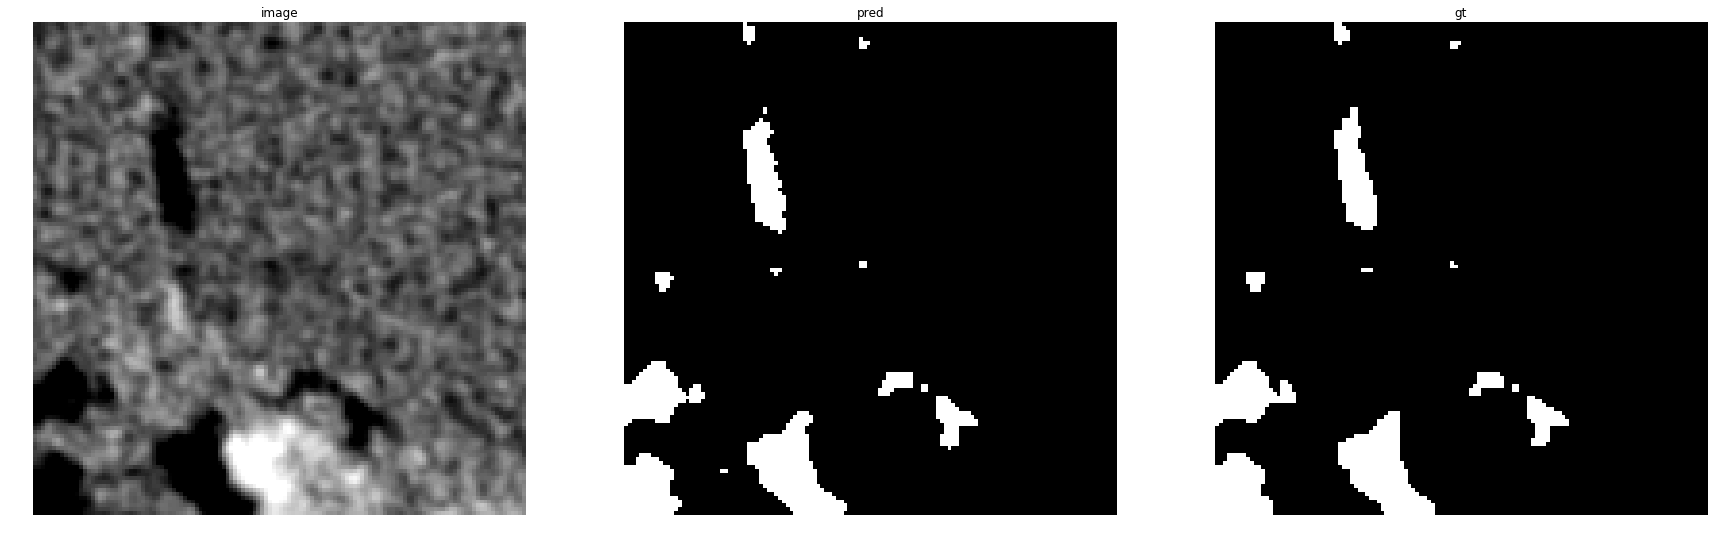

accuracy    : 0.9959716796875
precision   : 0.974706413730804
recall      : 0.9659803043867502
f1          : 0.9703237410071942
pr_auc      : 0.9973860683429122
iou         : 0.9423580786026201


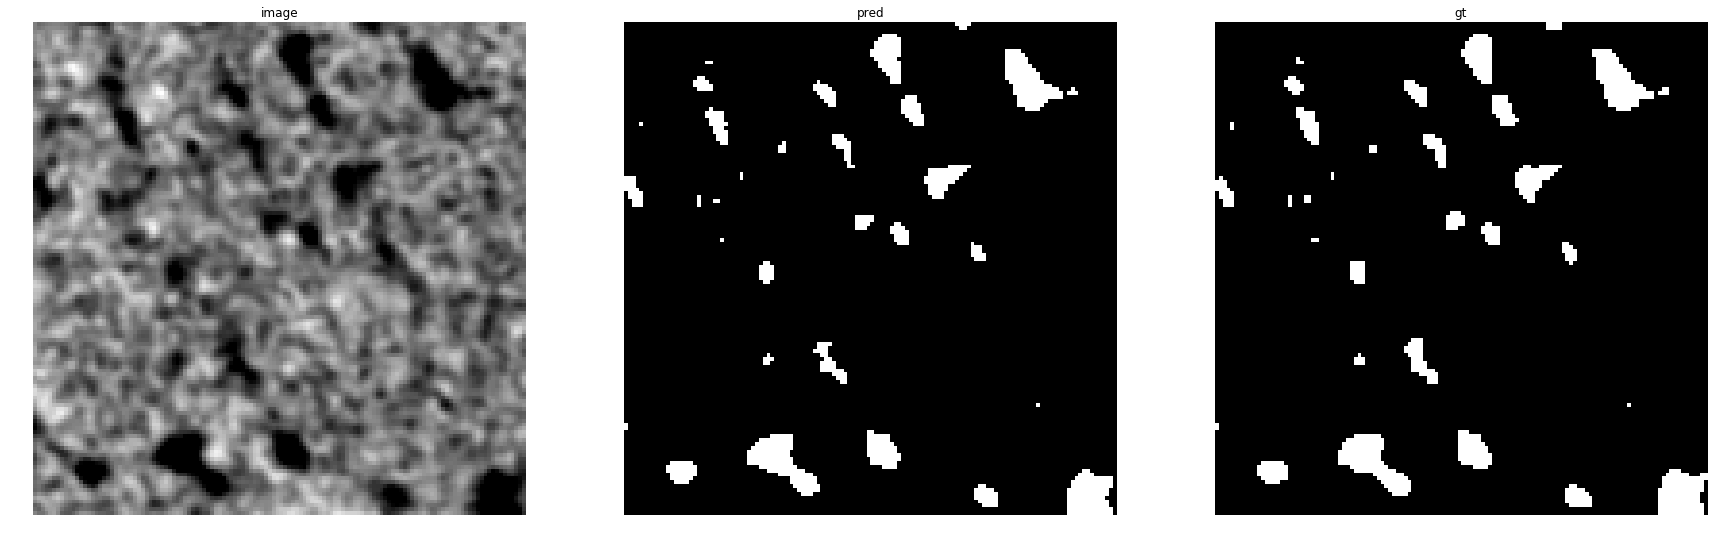

accuracy    : 0.99383544921875
precision   : 0.9905857740585774
recall      : 0.9114533205004812
f1          : 0.9493734335839599
pr_auc      : 0.995501488484029
iou         : 0.9036259541984732


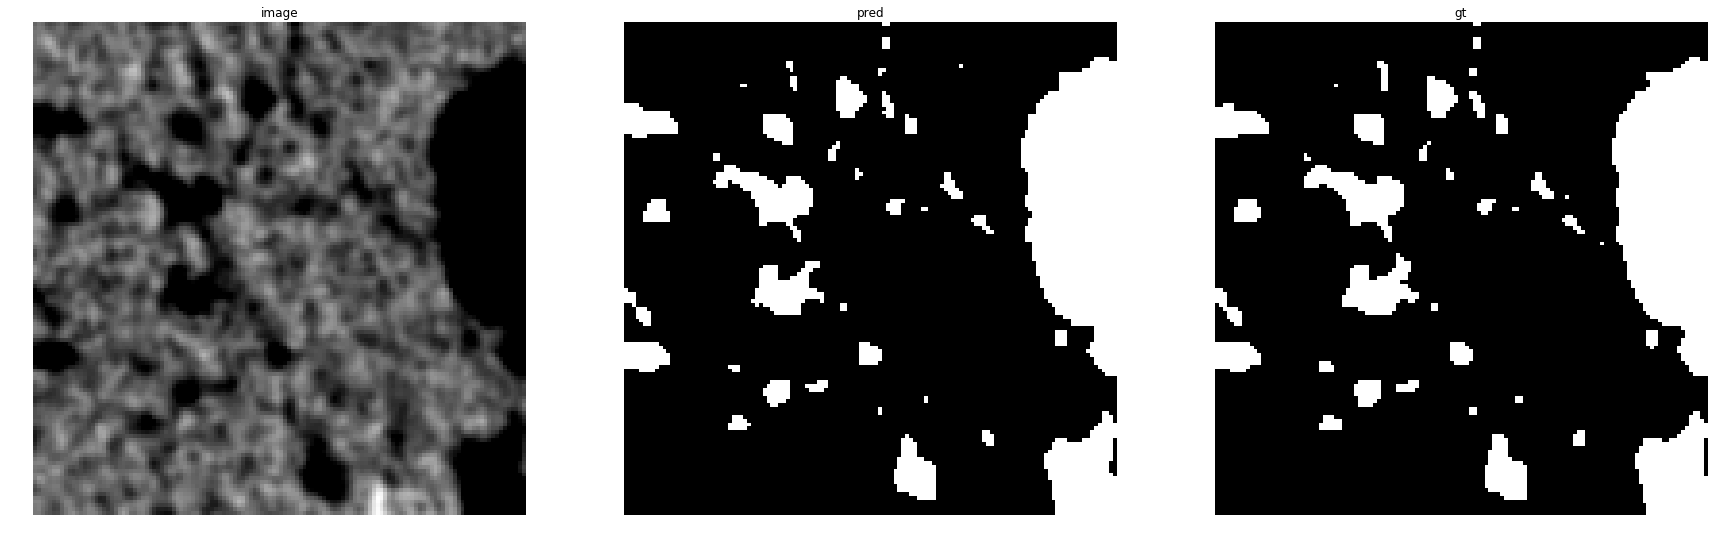

accuracy    : 0.99078369140625
precision   : 0.9932363882313155
recall      : 0.9573011734028684
f1          : 0.9749377593360997
pr_auc      : 0.9985027775126438
iou         : 0.9511010362694301


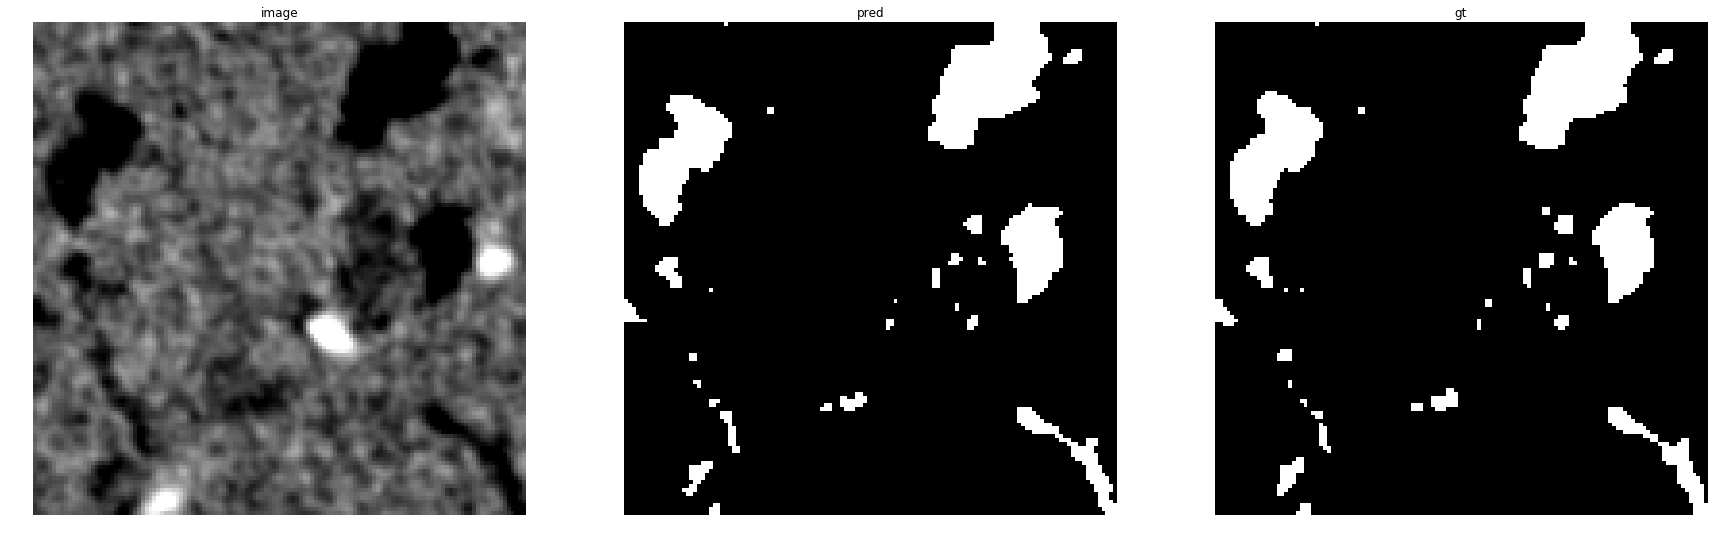

accuracy    : 0.99267578125
precision   : 0.989522700814901
recall      : 0.9433962264150944
f1          : 0.9659090909090909
pr_auc      : 0.9975443036249046
iou         : 0.9340659340659341


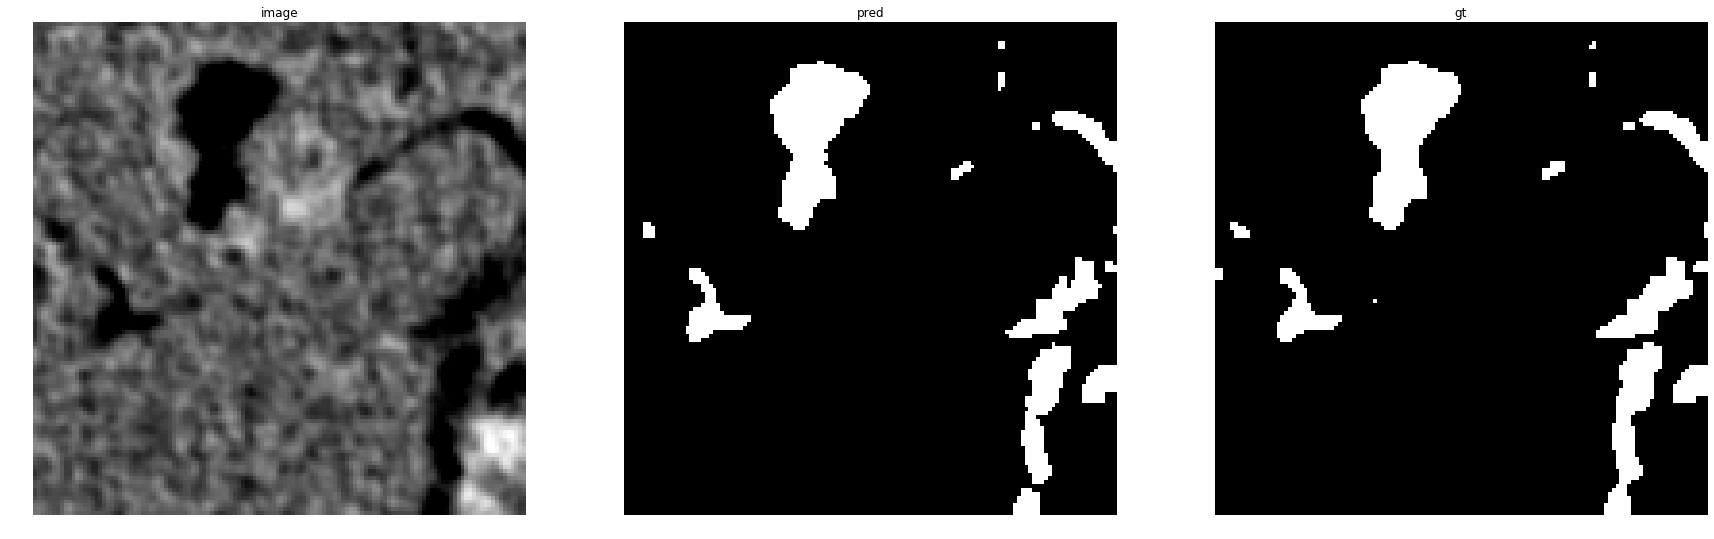

accuracy    : 0.99322509765625
precision   : 0.9924137931034482
recall      : 0.9350227420402859
f1          : 0.9628638340582135
pr_auc      : 0.9971128214799765
iou         : 0.9283870967741935


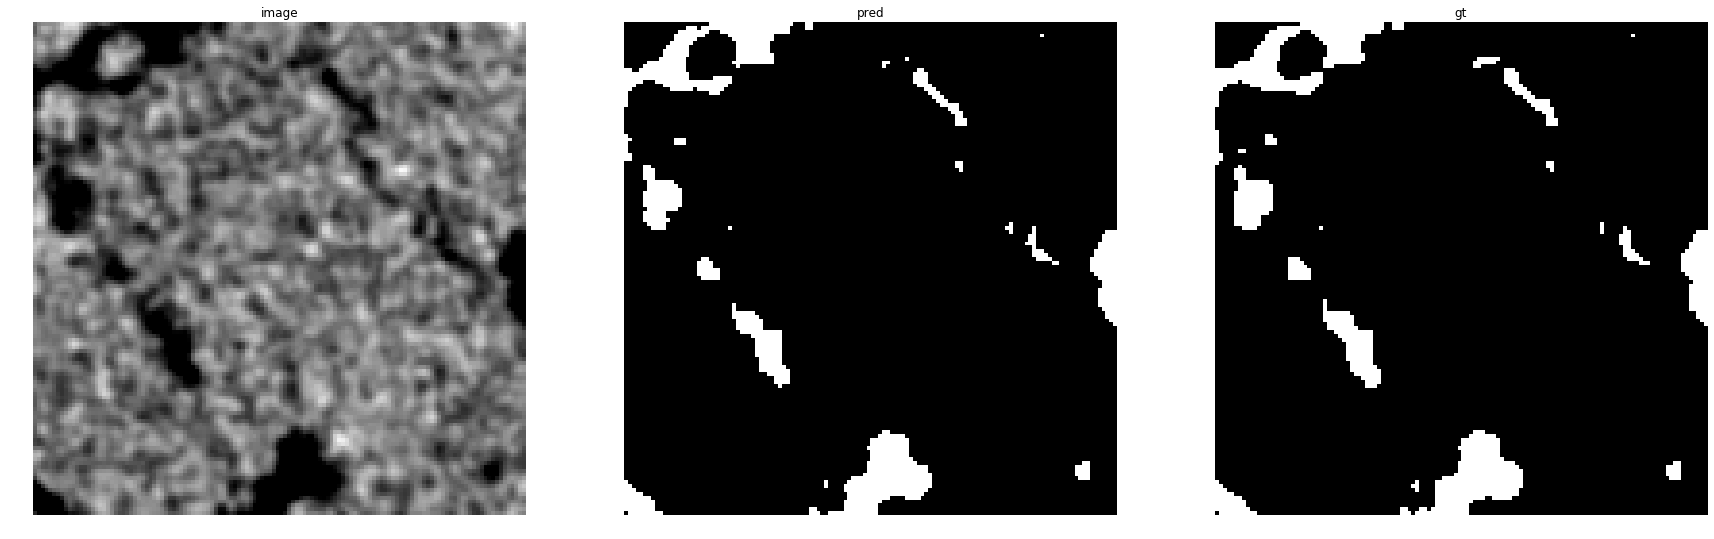

accuracy    : 0.99359130859375
precision   : 0.995049504950495
recall      : 0.9241379310344827
f1          : 0.9582836710369487
pr_auc      : 0.9967018202241956
iou         : 0.919908466819222


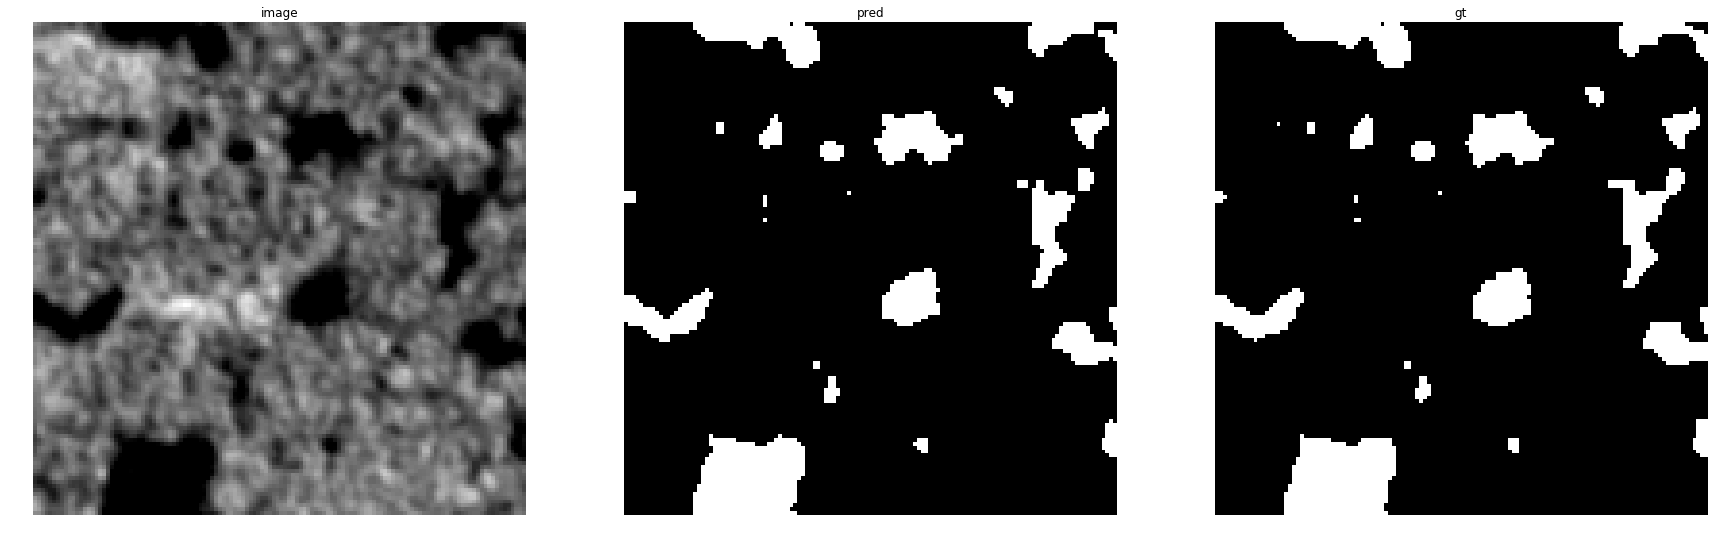

accuracy    : 0.9940185546875
precision   : 0.9925965097831835
recall      : 0.957164711881693
f1          : 0.9745586708203531
pr_auc      : 0.9980184340139524
iou         : 0.950379746835443


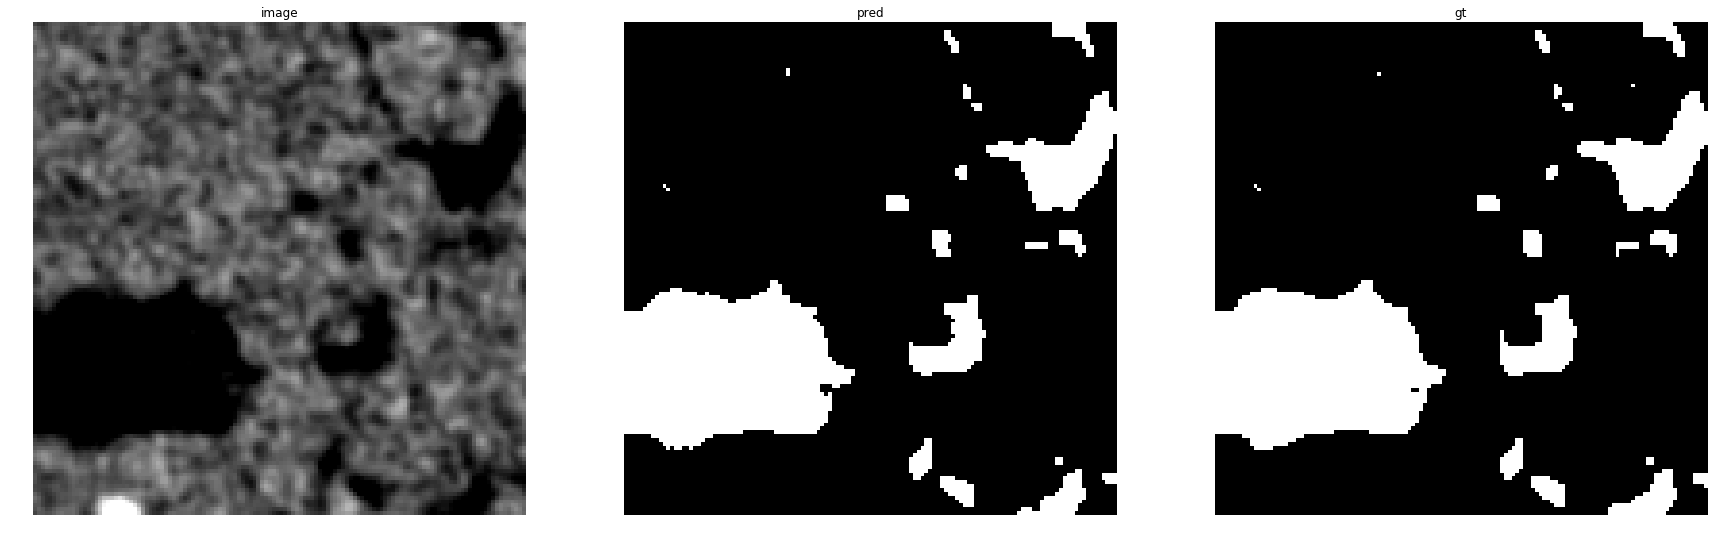

accuracy    : 0.99383544921875
precision   : 0.9973136333109469
recall      : 0.9696376101860921
f1          : 0.9832809137560007
pr_auc      : 0.999149625614778
iou         : 0.9671116900032563


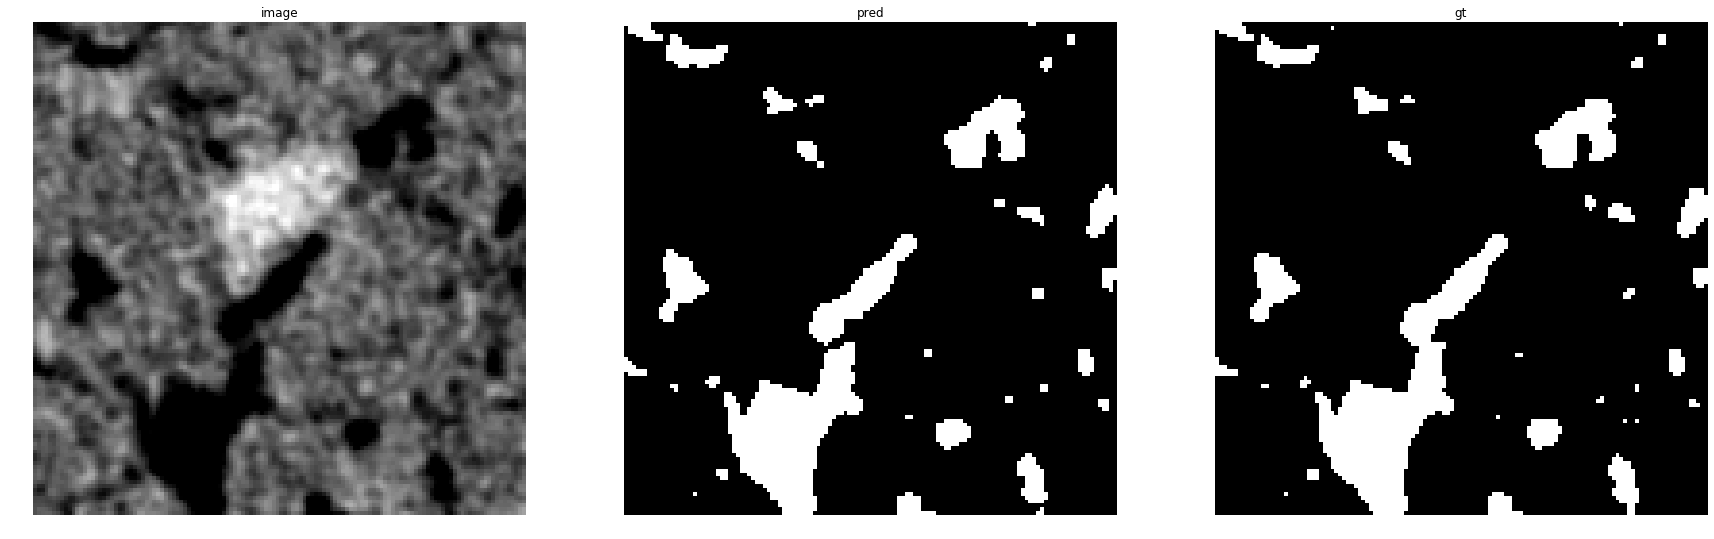

accuracy    : 0.99176025390625
precision   : 0.9683995922528033
recall      : 0.963000506842372
f1          : 0.9656925031766201
pr_auc      : 0.9966818200110457
iou         : 0.9336609336609336
Urna_22


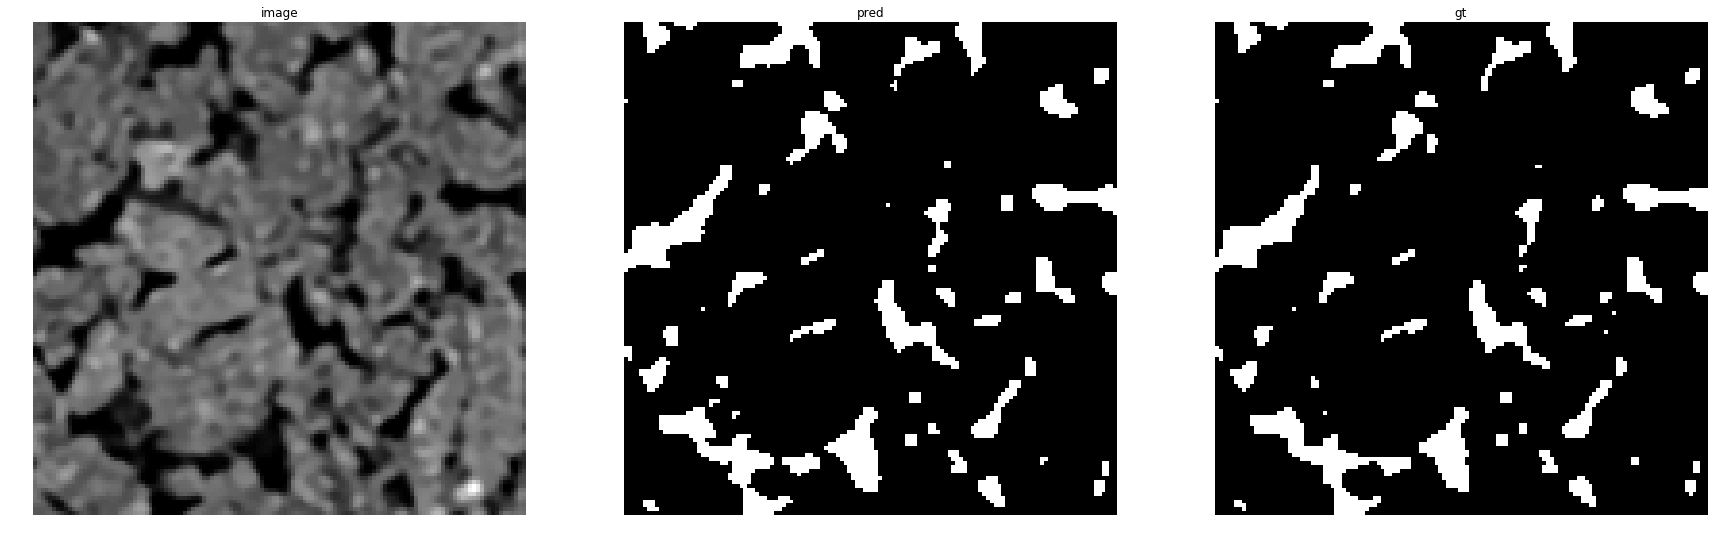

accuracy    : 0.98980712890625
precision   : 0.9317048853439681
recall      : 0.9842022116903634
f1          : 0.9572343149807939
pr_auc      : 0.9964677676781271
iou         : 0.9179764243614931


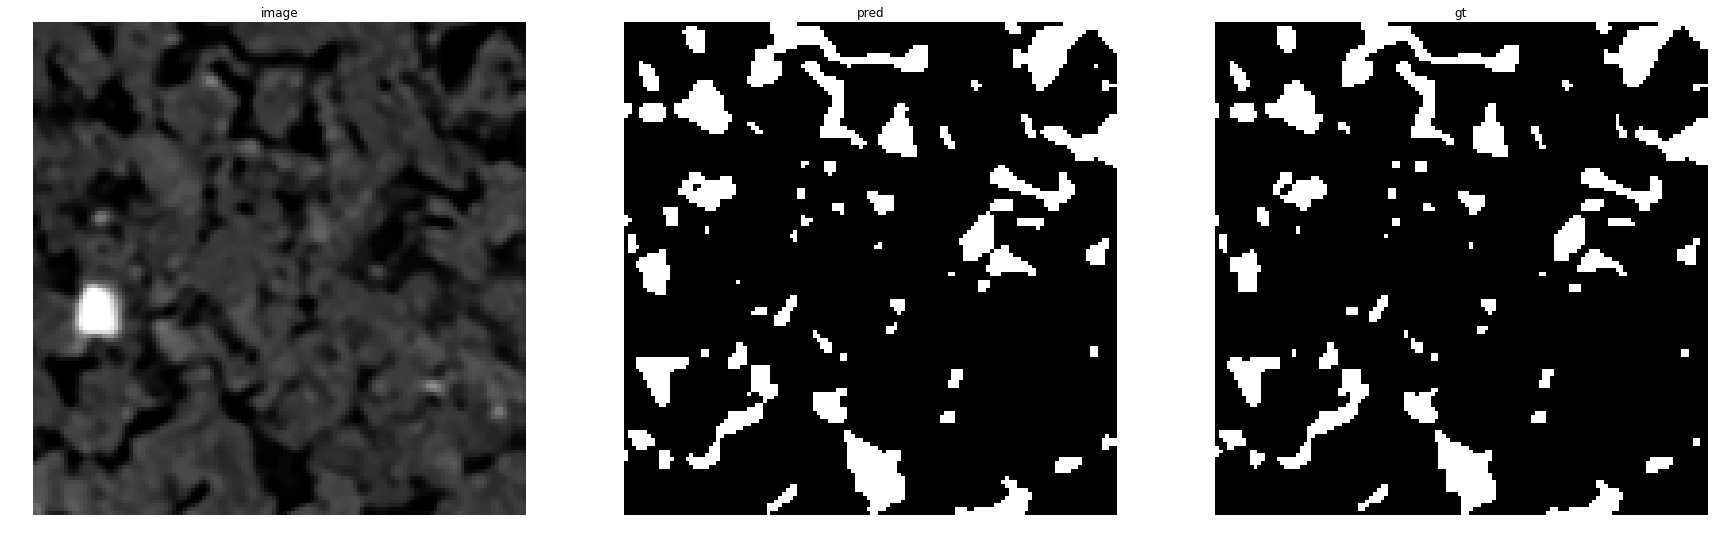

accuracy    : 0.984375
precision   : 0.9040816326530612
recall      : 0.990608228980322
f1          : 0.9453691848058045
pr_auc      : 0.9949305638148416
iou         : 0.896398219344395


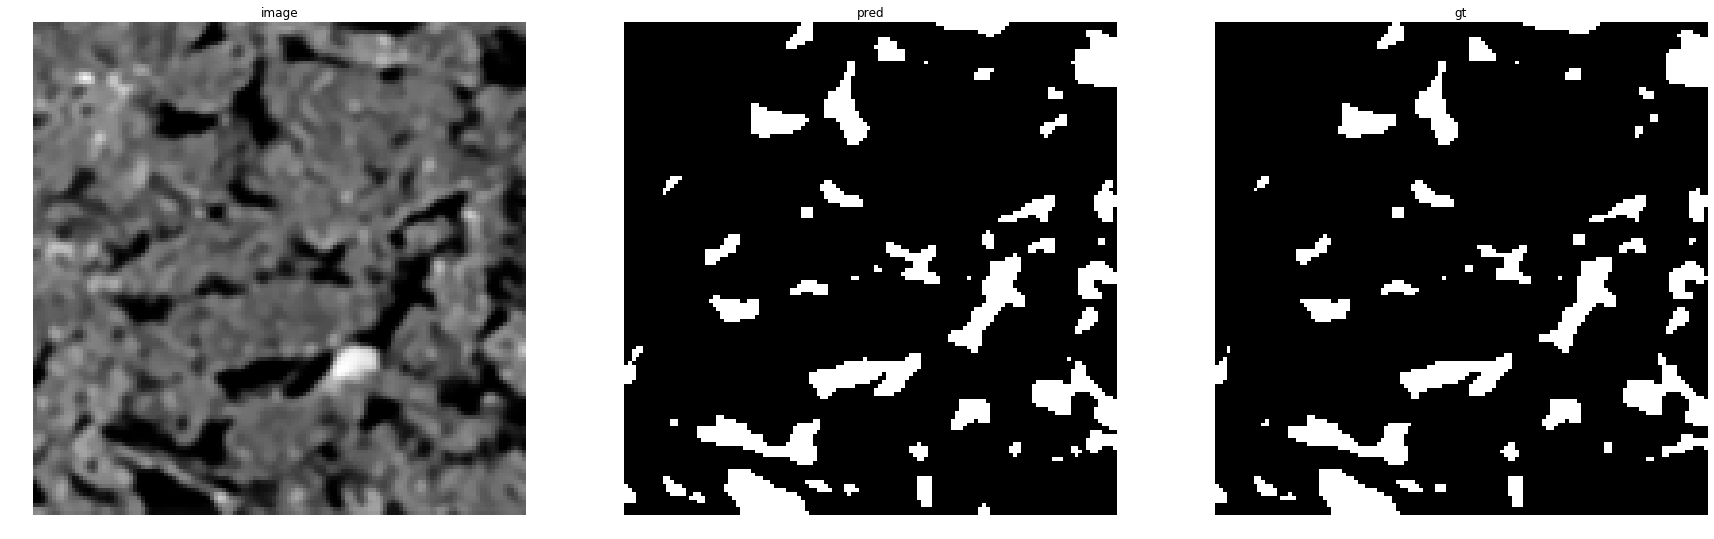

accuracy    : 0.9886474609375
precision   : 0.9216611609249646
recall      : 0.9898631525595539
f1          : 0.9545454545454545
pr_auc      : 0.9966946916929167
iou         : 0.9130434782608695


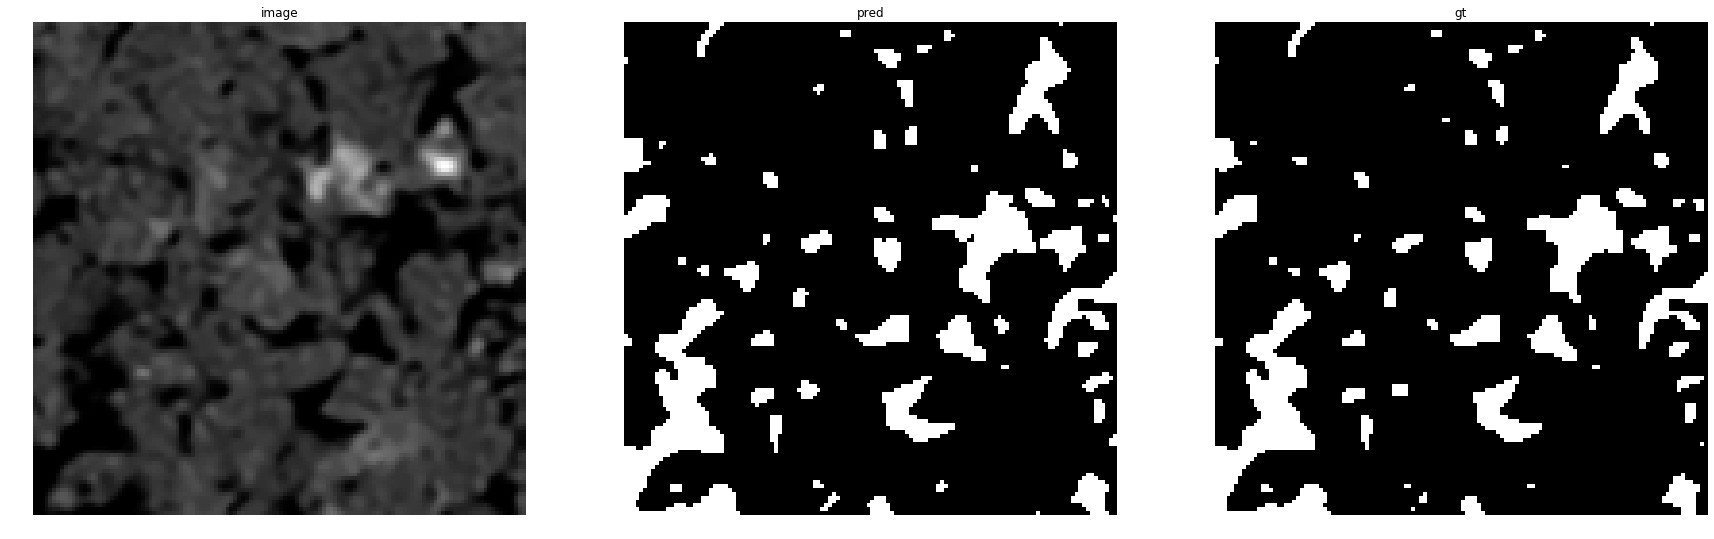

accuracy    : 0.9879150390625
precision   : 0.9284853354760948
recall      : 0.9914199914199914
f1          : 0.9589211618257261
pr_auc      : 0.9970437376250617
iou         : 0.9210840972499004


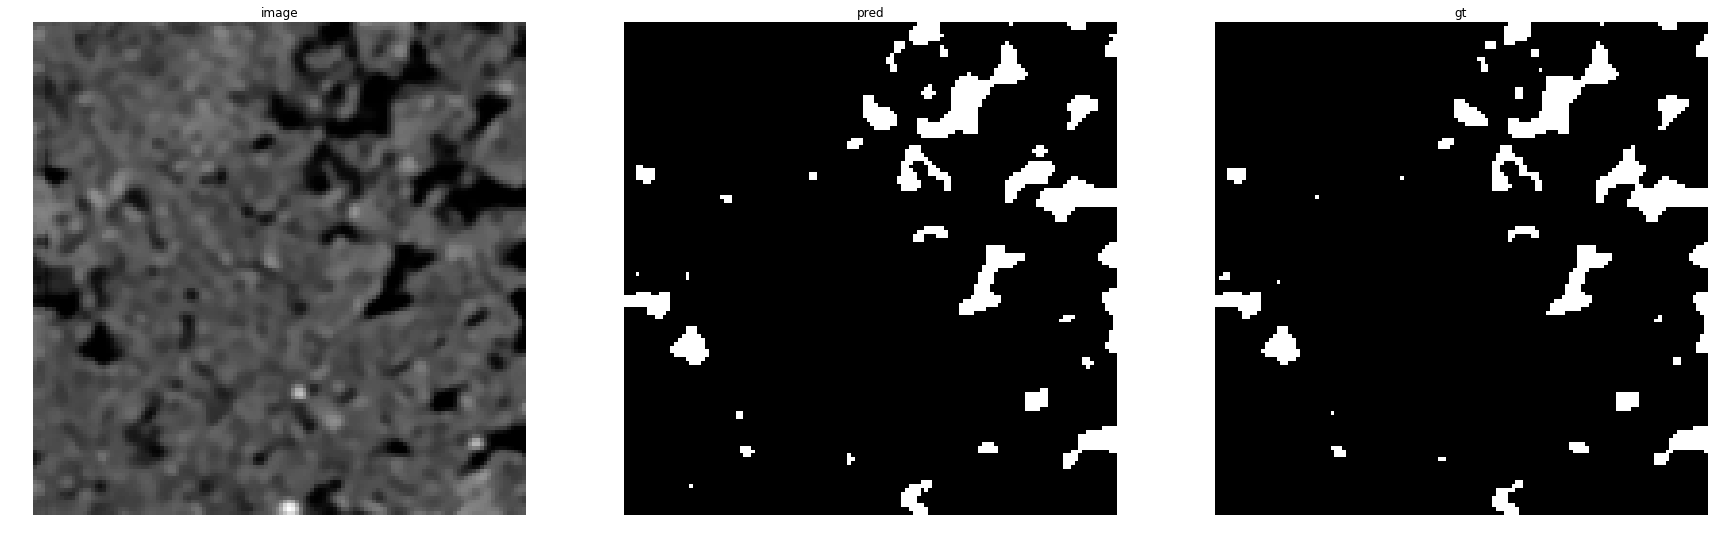

accuracy    : 0.99200439453125
precision   : 0.9147909967845659
recall      : 0.9785038693035254
f1          : 0.9455754050685501
pr_auc      : 0.9942967880147567
iou         : 0.8967691095350669


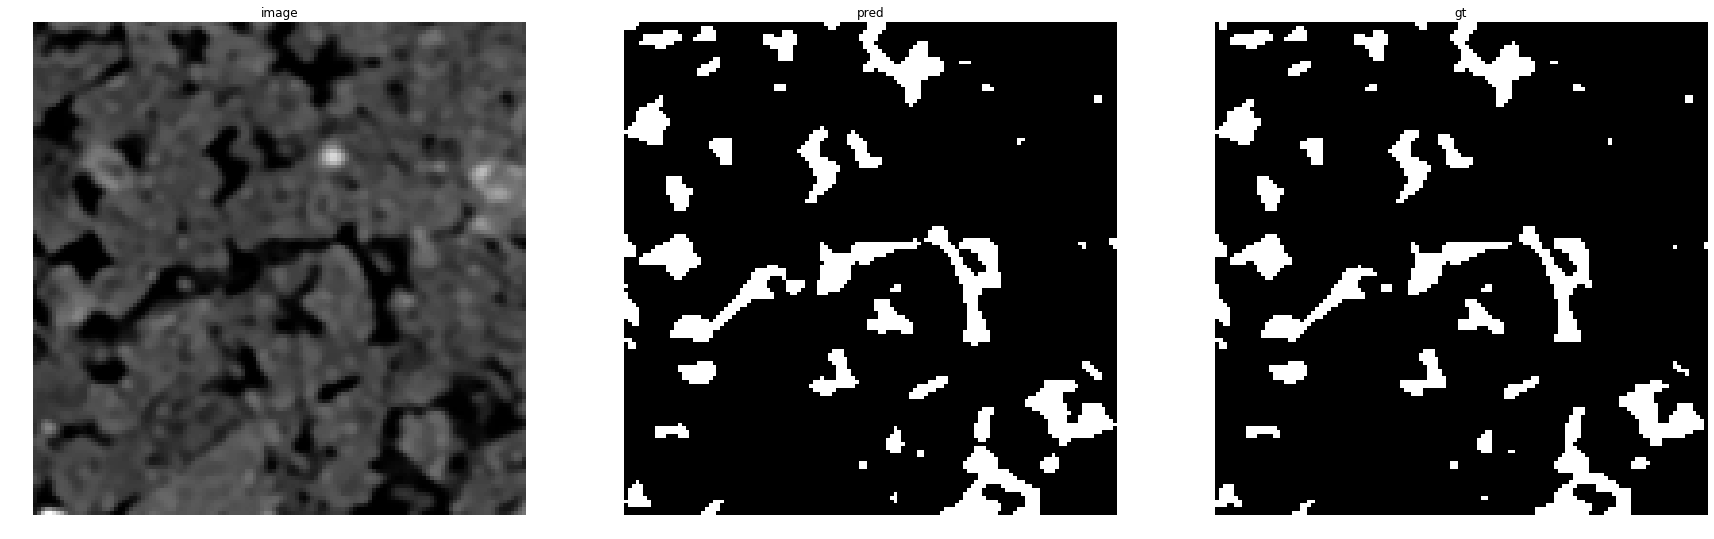

accuracy    : 0.9898681640625
precision   : 0.9261744966442953
recall      : 0.9938271604938271
f1          : 0.9588089330024814
pr_auc      : 0.9967053473545097
iou         : 0.9208770257387988


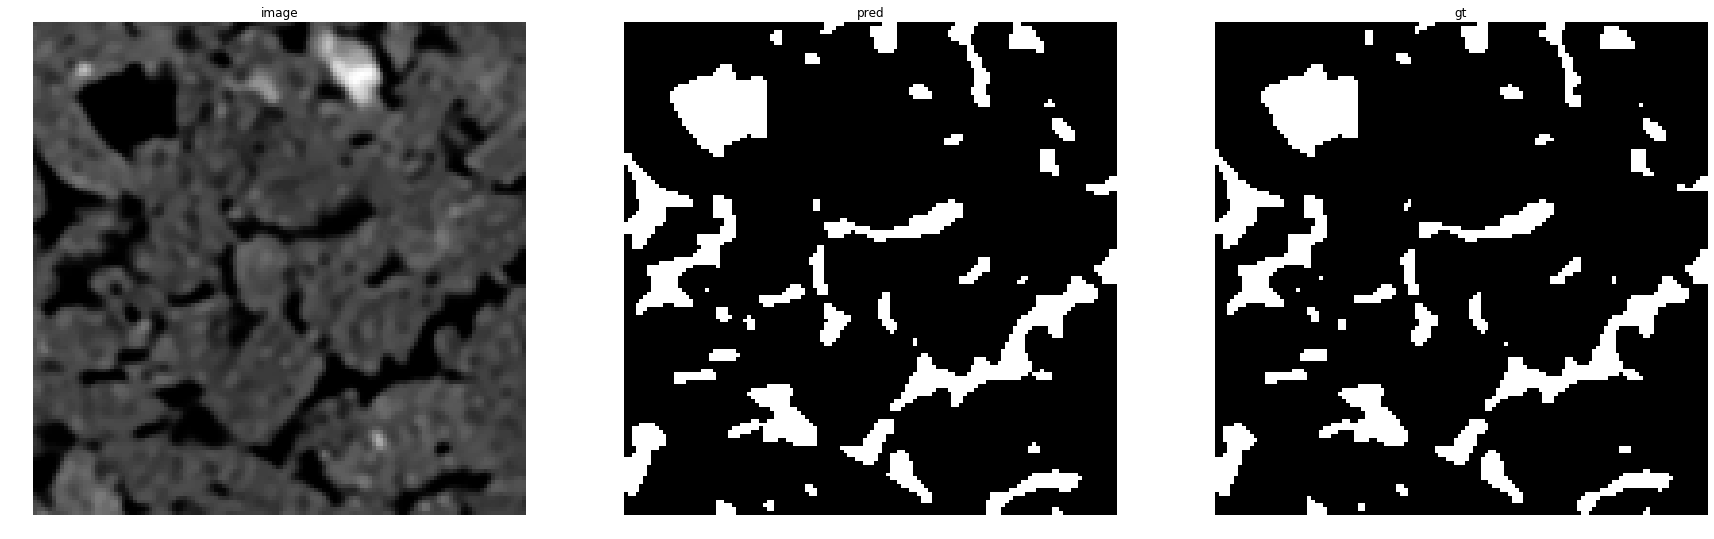

accuracy    : 0.99066162109375
precision   : 0.946366109599689
recall      : 0.9938775510204082
f1          : 0.9695401154688432
pr_auc      : 0.9984033811694185
iou         : 0.9408809891808346


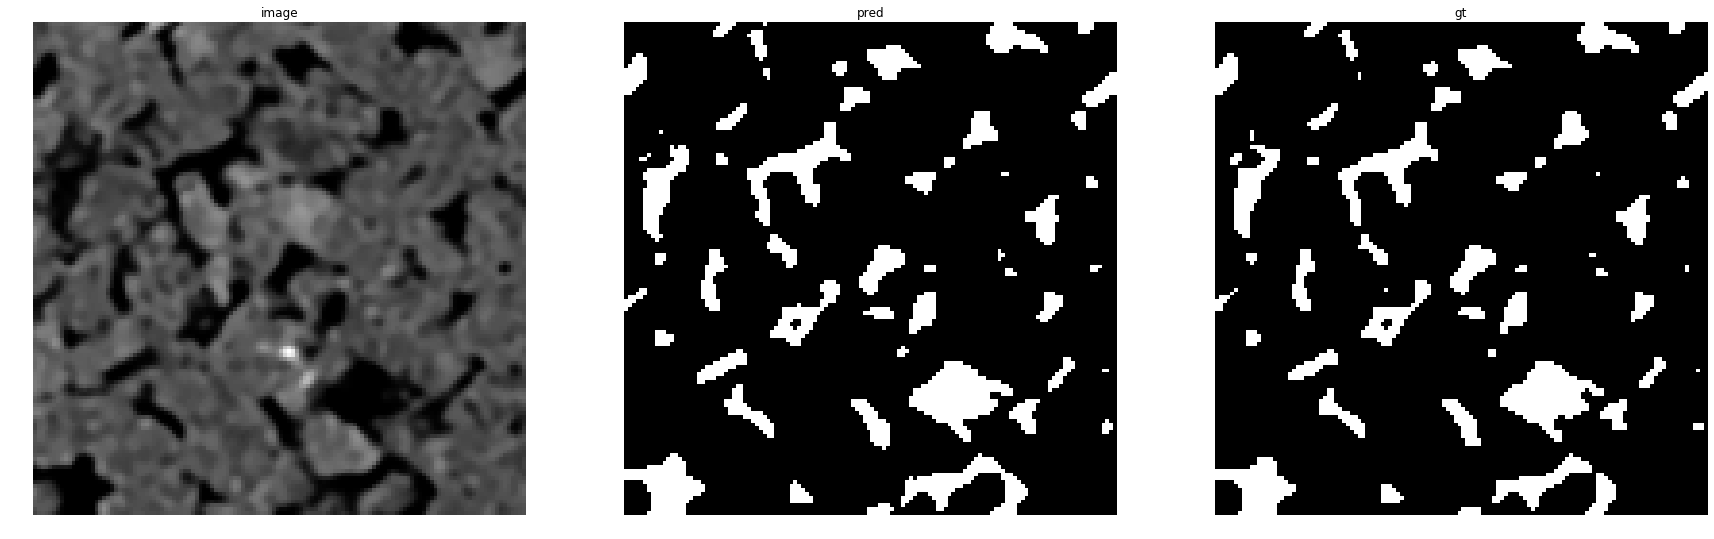

accuracy    : 0.987548828125
precision   : 0.920950323974082
recall      : 0.9902461681374826
f1          : 0.9543419874664278
pr_auc      : 0.9964178280626672
iou         : 0.9126712328767124


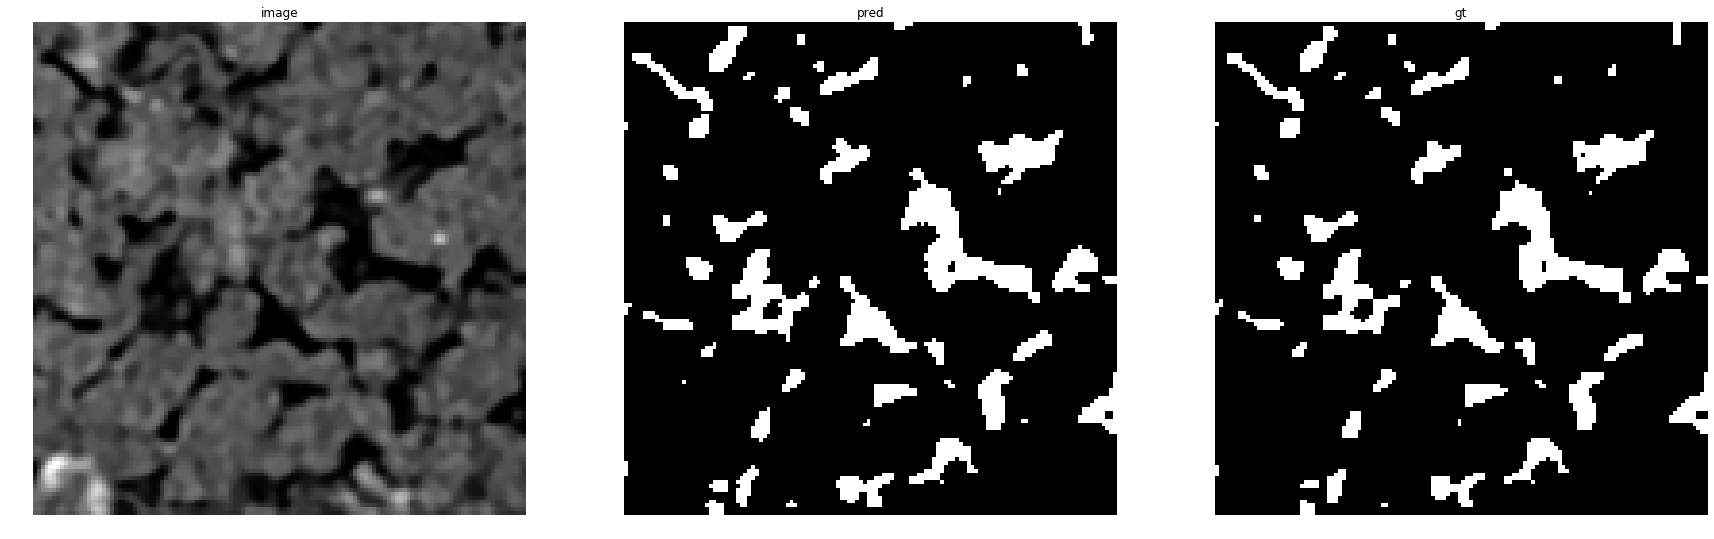

accuracy    : 0.98858642578125
precision   : 0.9213806327900288
recall      : 0.9881748071979435
f1          : 0.9536095261721658
pr_auc      : 0.9960292379894735
iou         : 0.9113323850165955


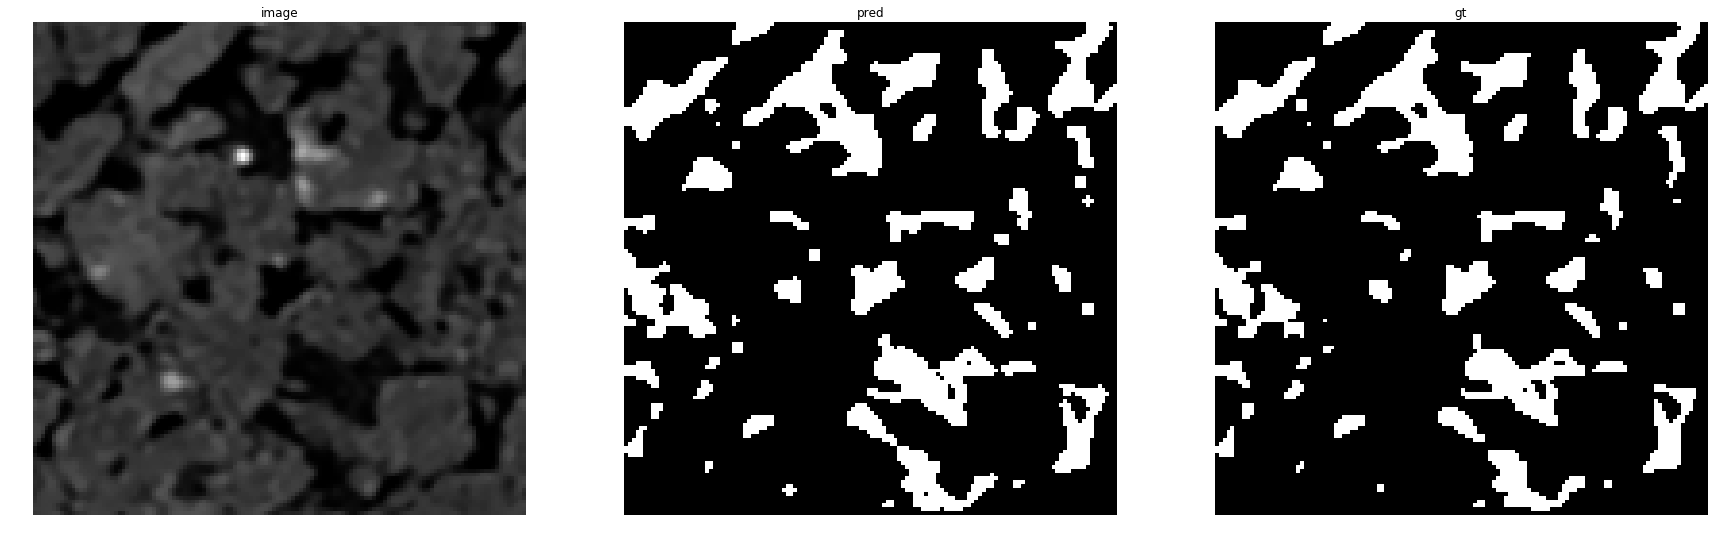

accuracy    : 0.9835205078125
precision   : 0.9241796750557503
recall      : 0.9890896692806
f1          : 0.9555335968379447
pr_auc      : 0.996913907494419
iou         : 0.9148533585619678
Urna_30


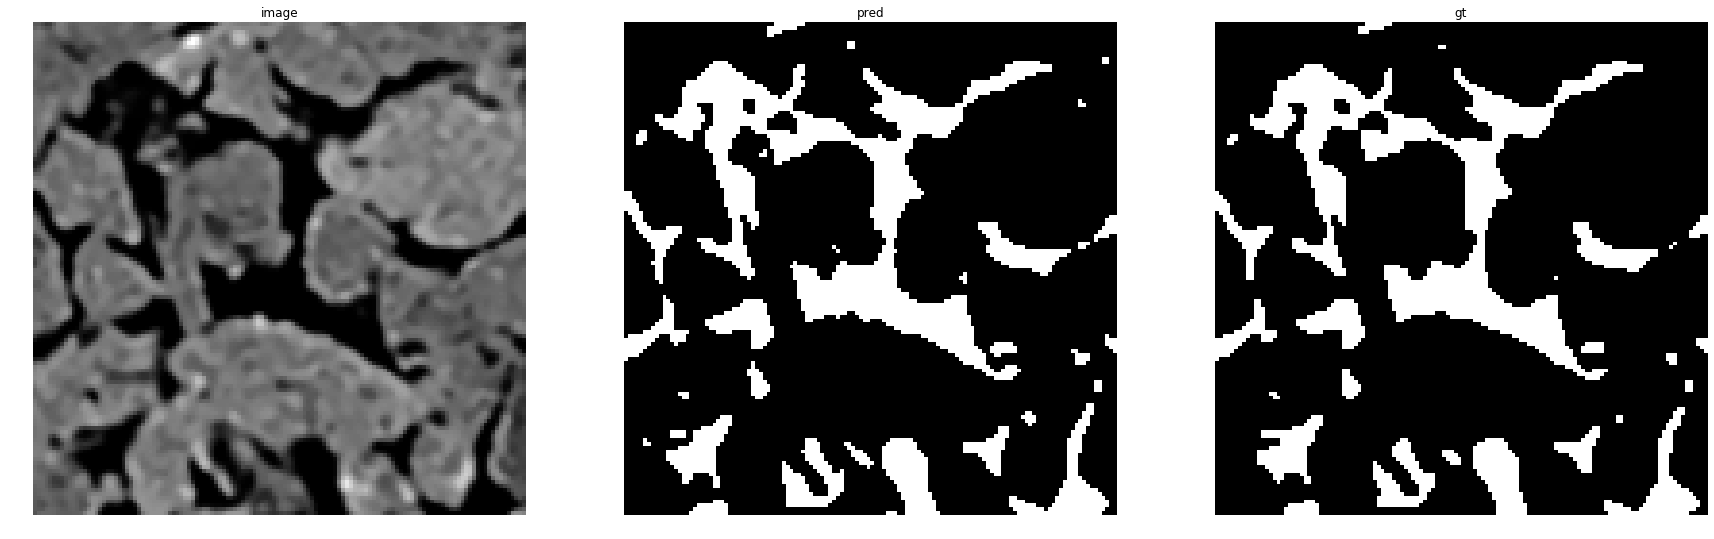

accuracy    : 0.98388671875
precision   : 0.9263588544710696
recall      : 0.9962287869264613
f1          : 0.9600242277407631
pr_auc      : 0.9980364782172759
iou         : 0.9231217239370996


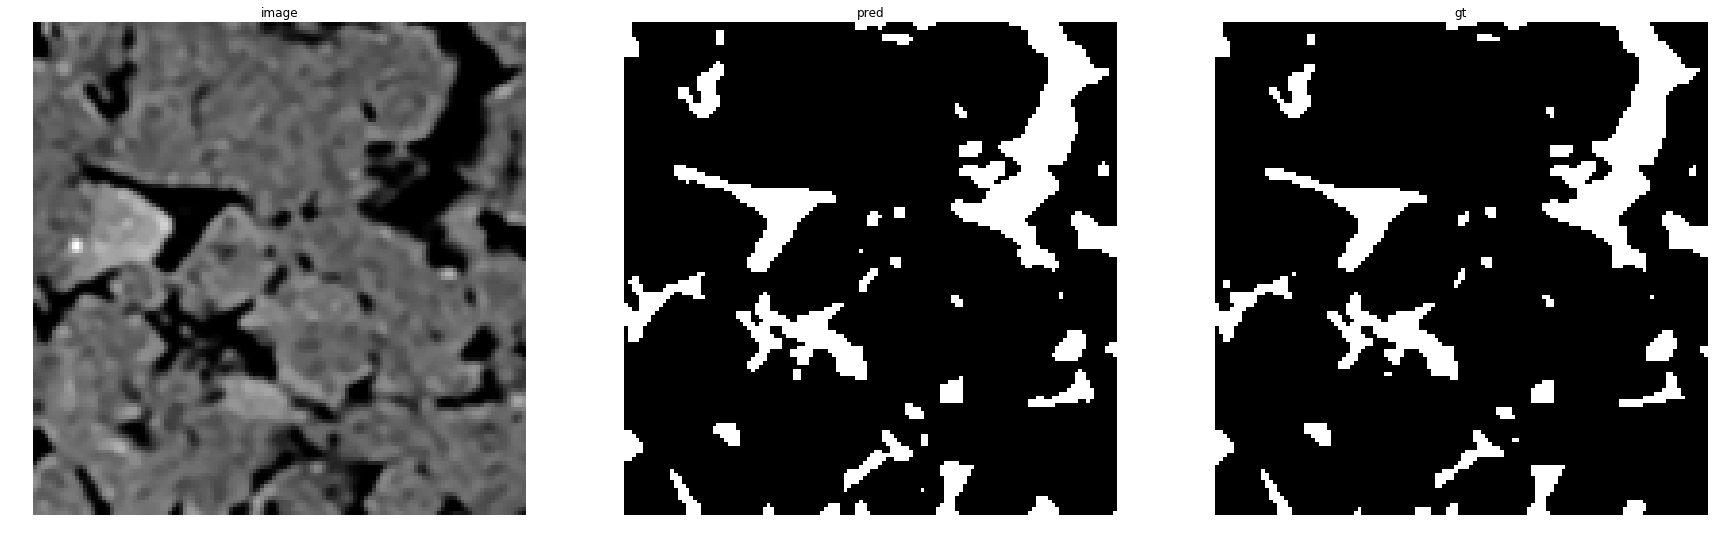

accuracy    : 0.98779296875
precision   : 0.9237079573420837
recall      : 0.9938217122683142
f1          : 0.9574829931972788
pr_auc      : 0.997290066894192
iou         : 0.9184339314845025


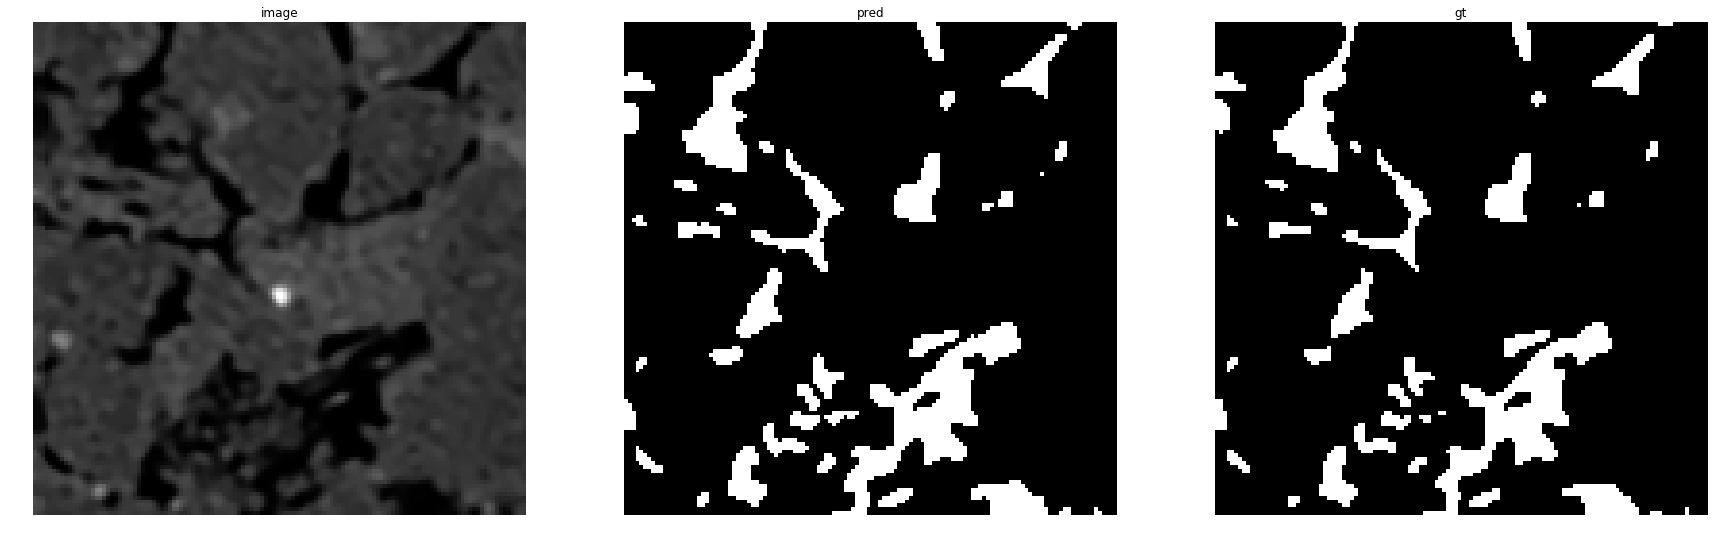

accuracy    : 0.98828125
precision   : 0.9204001739886908
recall      : 0.995764705882353
f1          : 0.9566003616636529
pr_auc      : 0.996365353774085
iou         : 0.9168110918544194


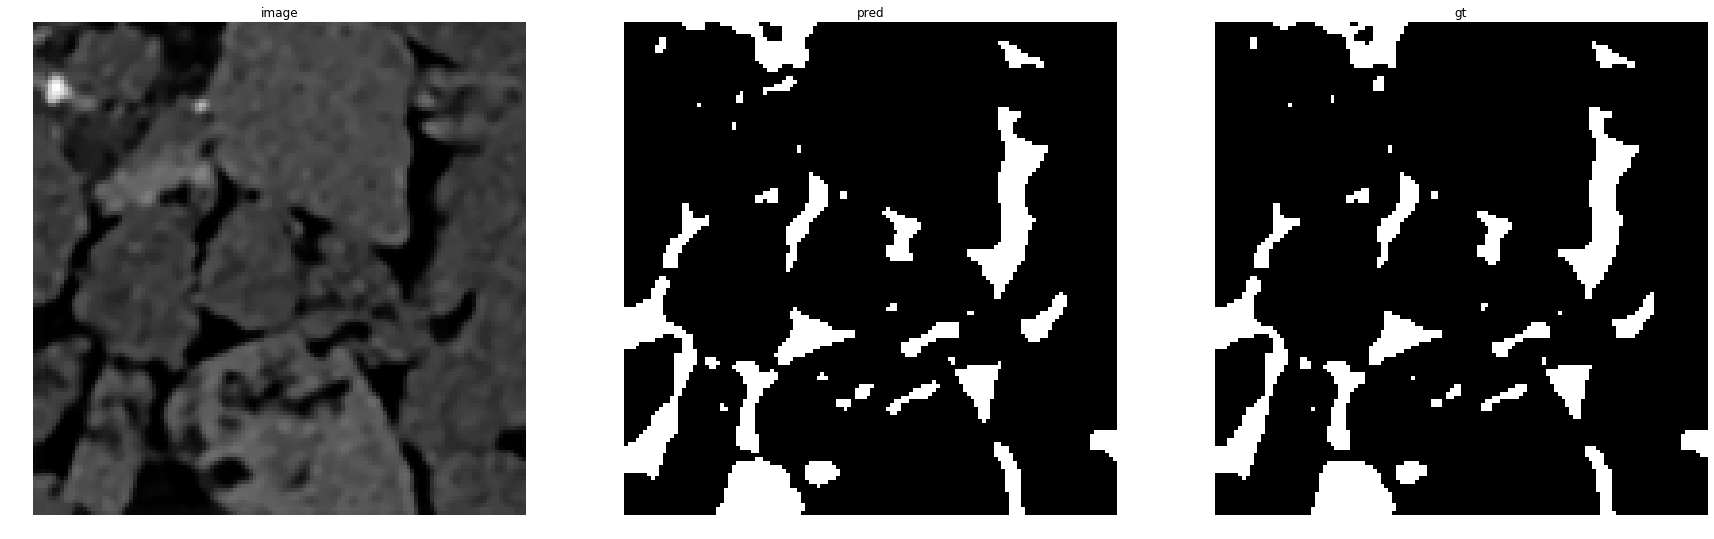

accuracy    : 0.98870849609375
precision   : 0.9252796420581656
recall      : 0.9913710450623202
f1          : 0.9571858366118954
pr_auc      : 0.9971590742459552
iou         : 0.9178872614292055


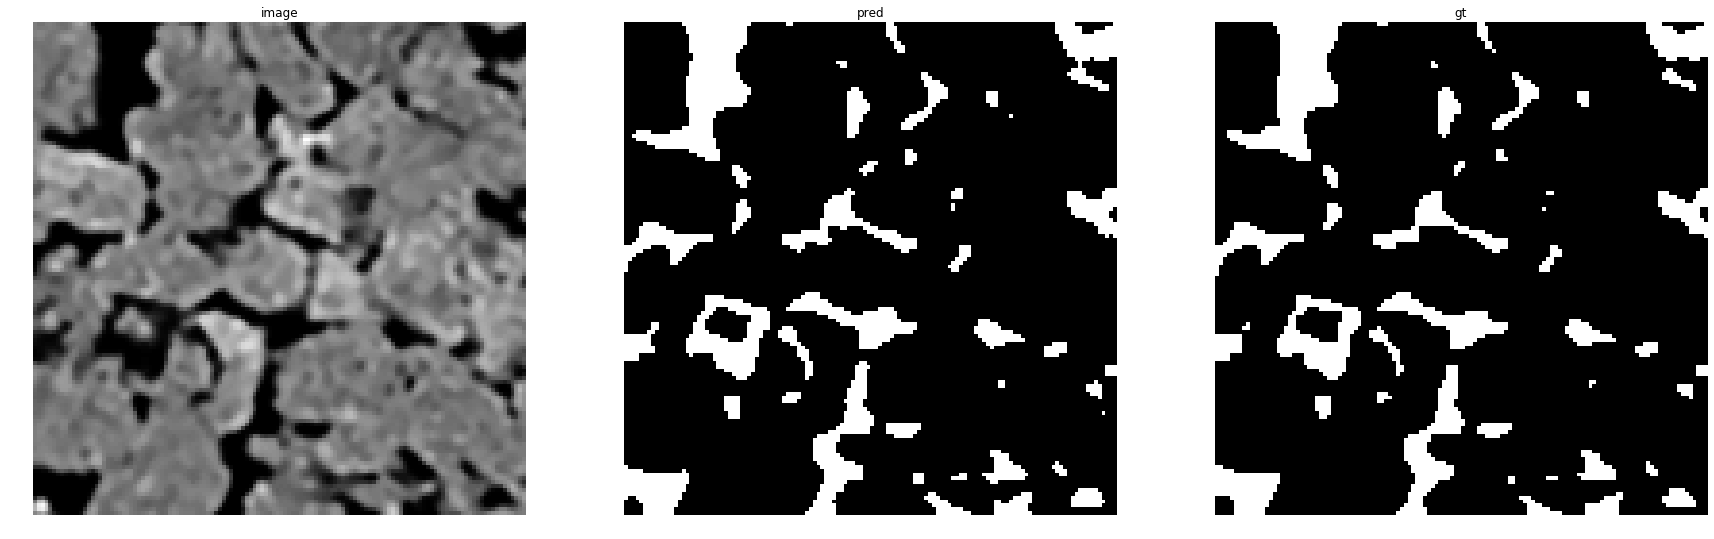

accuracy    : 0.98870849609375
precision   : 0.9356632247815727
recall      : 0.9903320722992854
f1          : 0.9622217684296509
pr_auc      : 0.9974462622237238
iou         : 0.927194018103109


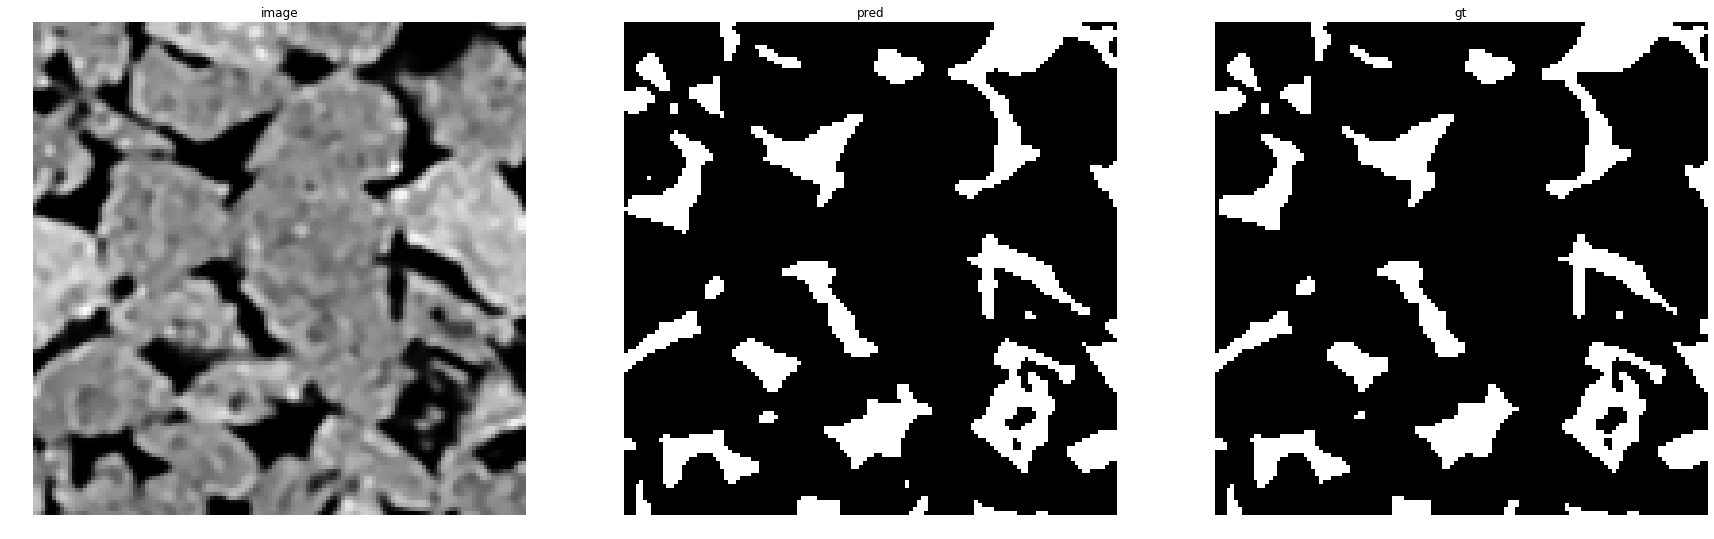

accuracy    : 0.9879150390625
precision   : 0.9449828071272273
recall      : 0.9927750410509031
f1          : 0.9682895579756566
pr_auc      : 0.9979763495281365
iou         : 0.9385284073269171


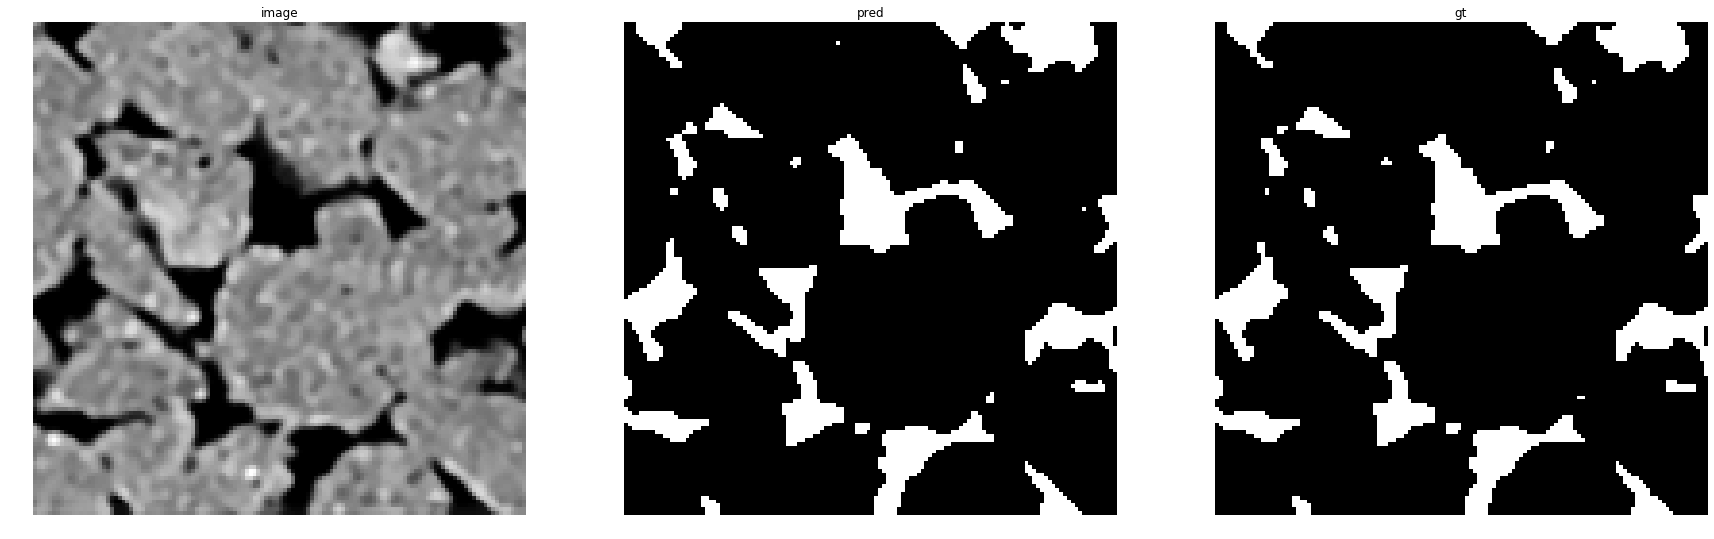

accuracy    : 0.99267578125
precision   : 0.9555555555555556
recall      : 0.9966887417218543
f1          : 0.9756888168557537
pr_auc      : 0.9986932337603448
iou         : 0.9525316455696202


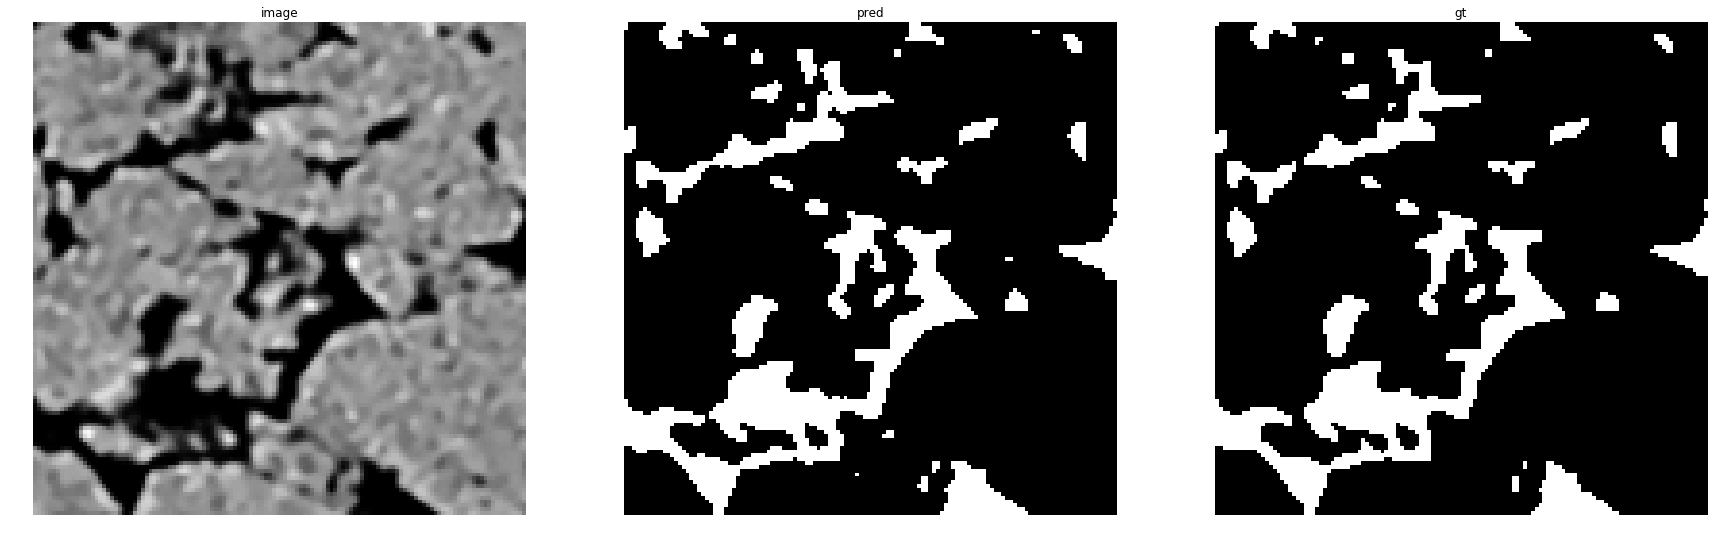

accuracy    : 0.98760986328125
precision   : 0.936154949784792
recall      : 0.9905123339658444
f1          : 0.9625668449197861
pr_auc      : 0.997537029088258
iou         : 0.9278350515463918


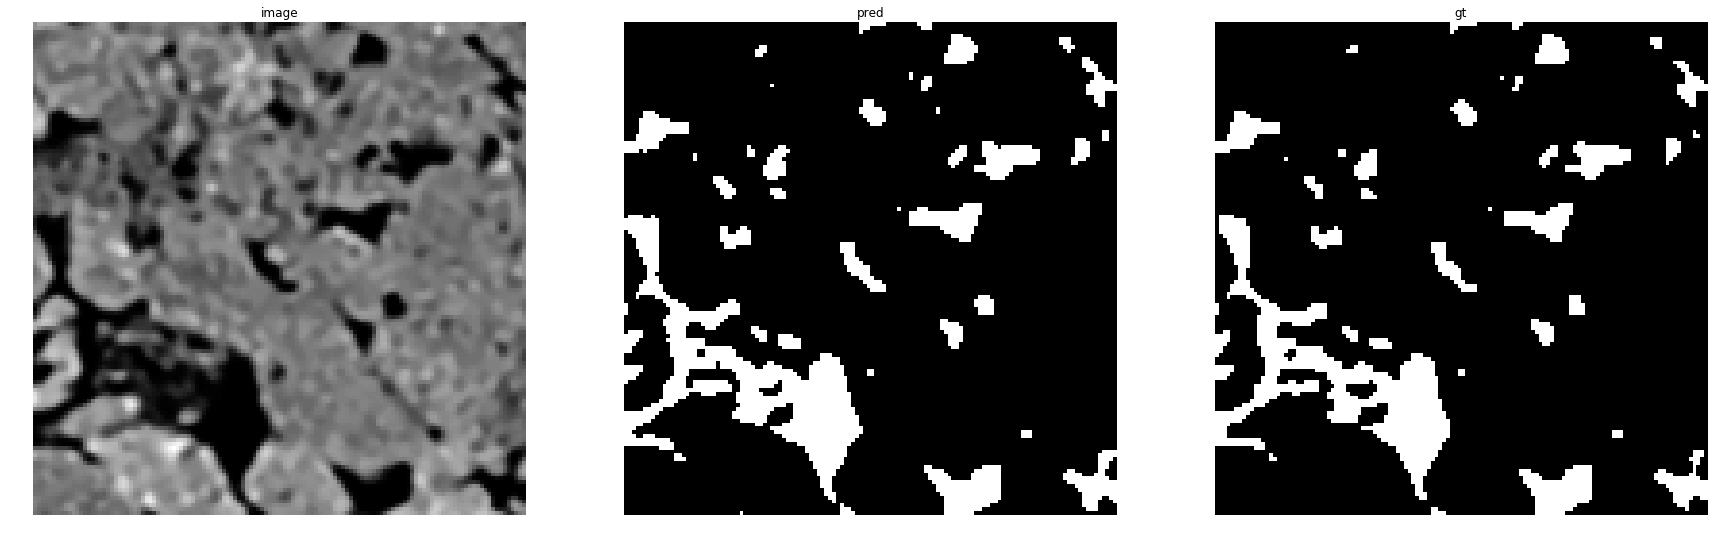

accuracy    : 0.98638916015625
precision   : 0.912311780336581
recall      : 0.988009592326139
f1          : 0.9486530048353672
pr_auc      : 0.9950259710319641
iou         : 0.9023215067893123


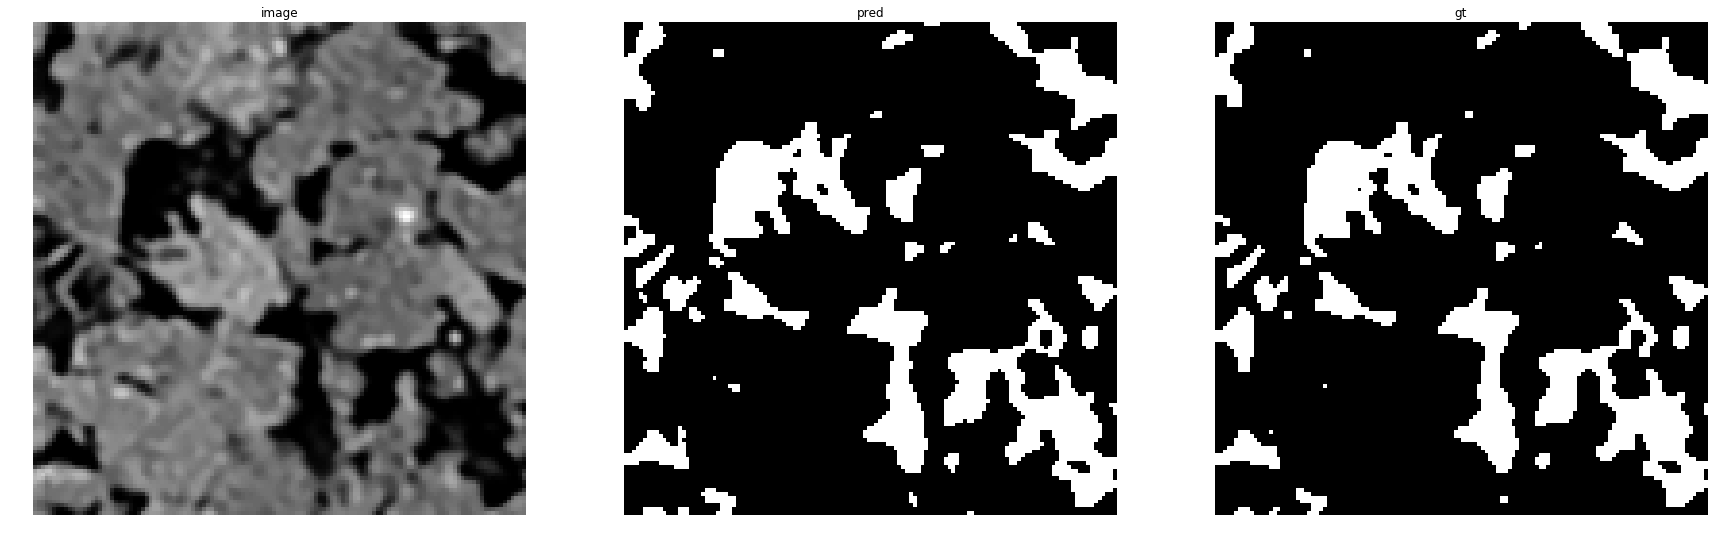

accuracy    : 0.984130859375
precision   : 0.9337401918047079
recall      : 0.9901386748844376
f1          : 0.9611127729584206
pr_auc      : 0.9971427197103309
iou         : 0.9251367693636625
Urna_34


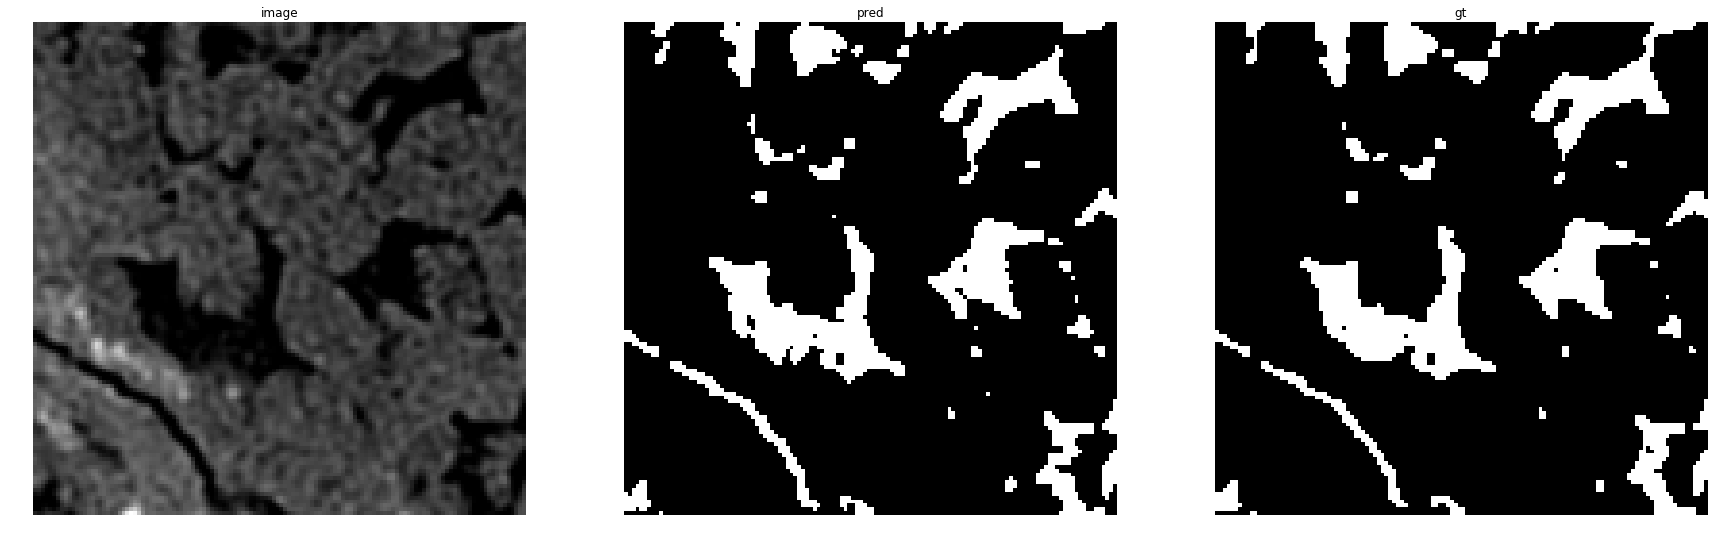

accuracy    : 0.983642578125
precision   : 0.9398584905660378
recall      : 0.9541101356743815
f1          : 0.9469306930693071
pr_auc      : 0.9909522329696594
iou         : 0.8992102294095524


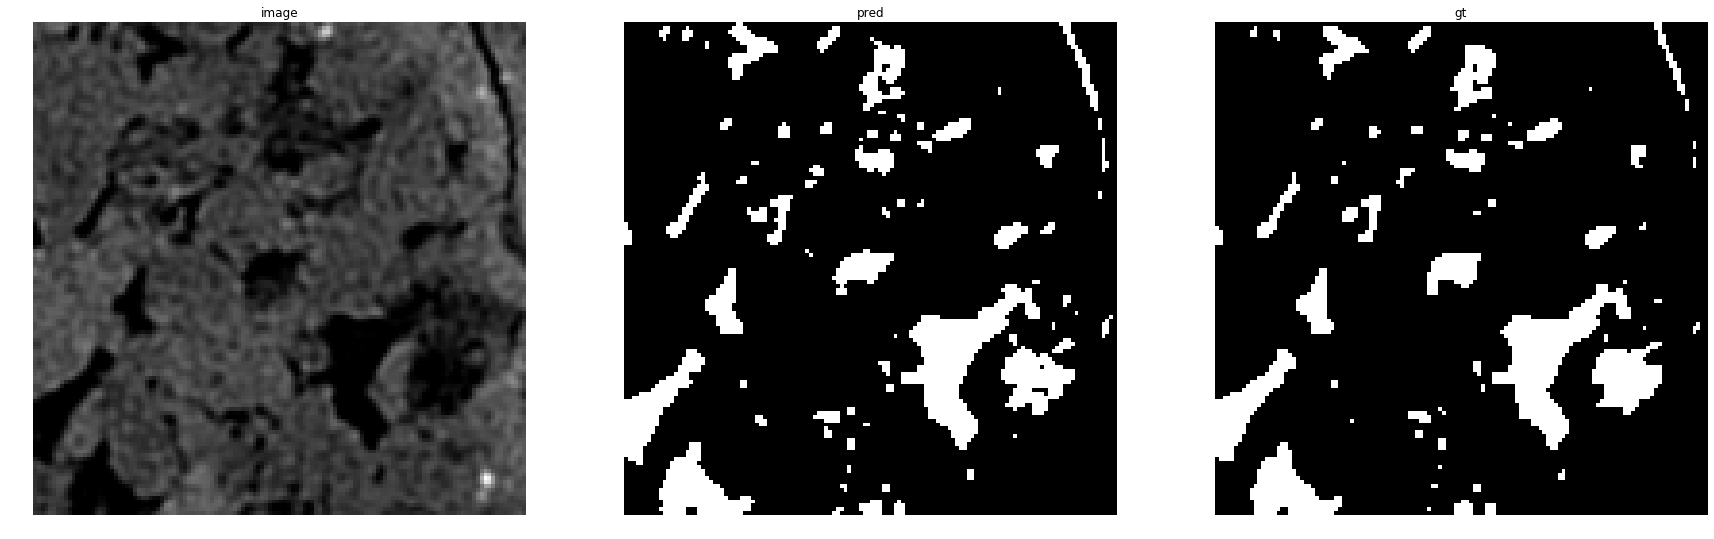

accuracy    : 0.982666015625
precision   : 0.903448275862069
recall      : 0.9637076998528691
f1          : 0.9326056003796868
pr_auc      : 0.9894786477472626
iou         : 0.8737216540684749


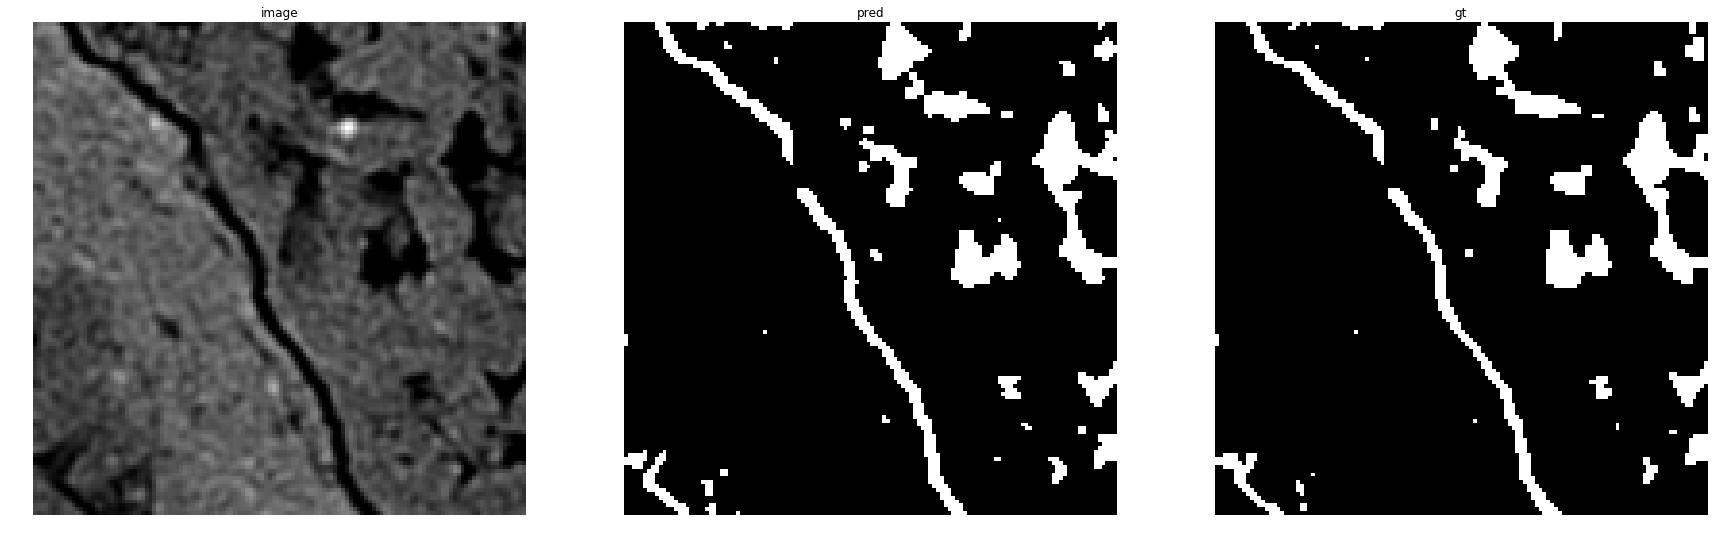

accuracy    : 0.98681640625
precision   : 0.9121621621621622
recall      : 0.9642857142857143
f1          : 0.9375
pr_auc      : 0.9909768740966198
iou         : 0.8823529411764706


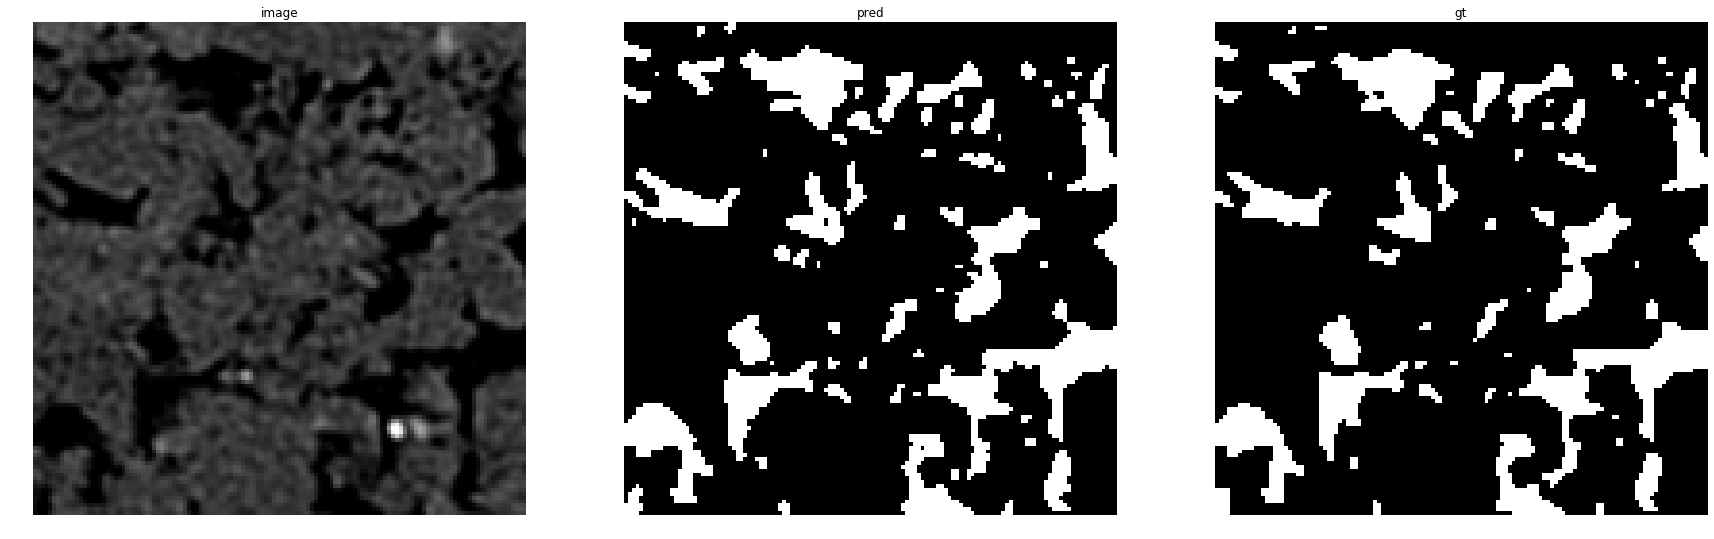

accuracy    : 0.97650146484375
precision   : 0.9118550368550369
recall      : 0.9680469514183241
f1          : 0.9391111814012336
pr_auc      : 0.9913424560628676
iou         : 0.885211687537269


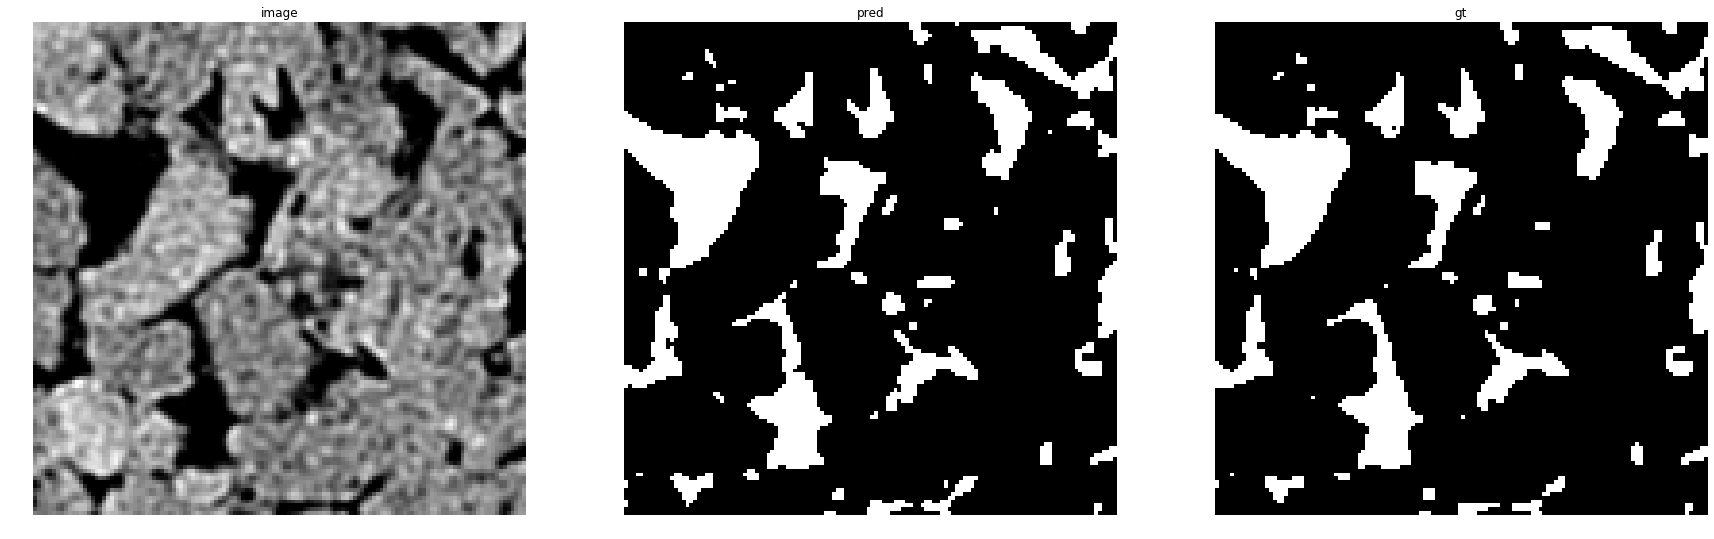

accuracy    : 0.98358154296875
precision   : 0.9333786539768865
recall      : 0.9741042923022348
f1          : 0.9533067175837528
pr_auc      : 0.9940985583867255
iou         : 0.9107794361525705


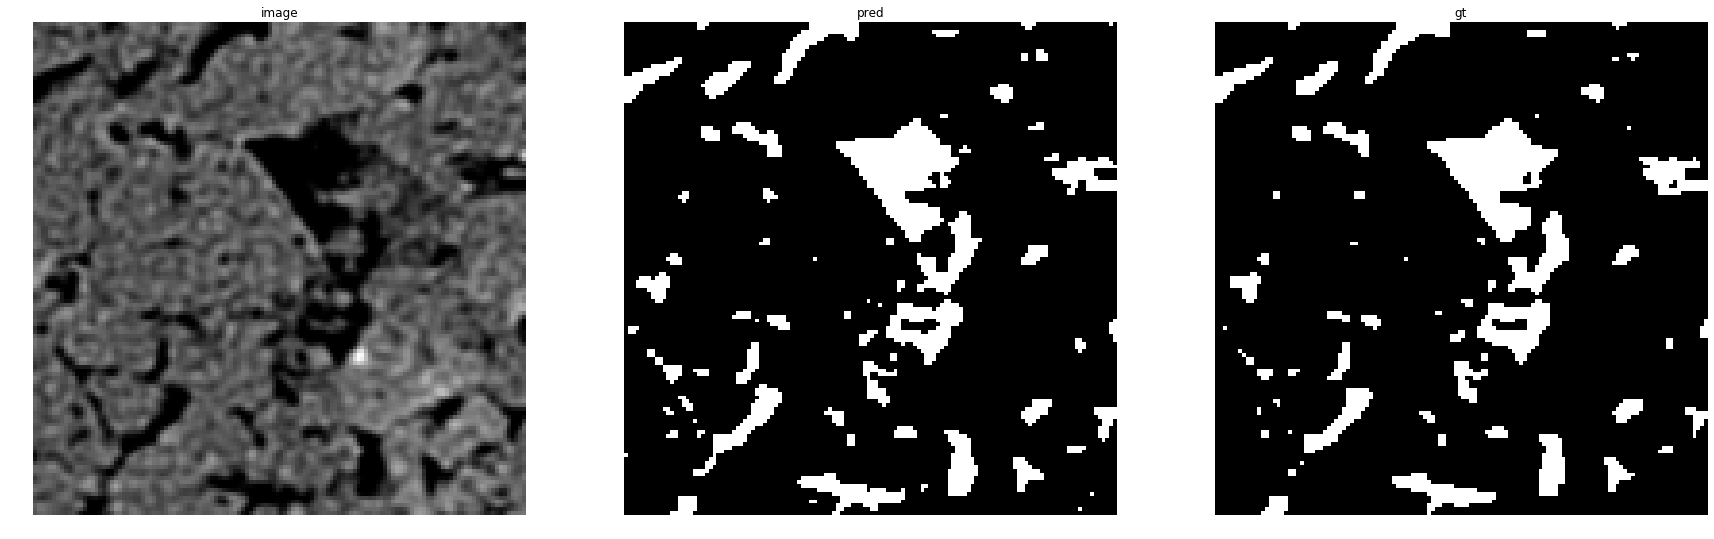

accuracy    : 0.98199462890625
precision   : 0.89924670433145
recall      : 0.9593169261677549
f1          : 0.9283110571081409
pr_auc      : 0.9864052558228473
iou         : 0.8662131519274376


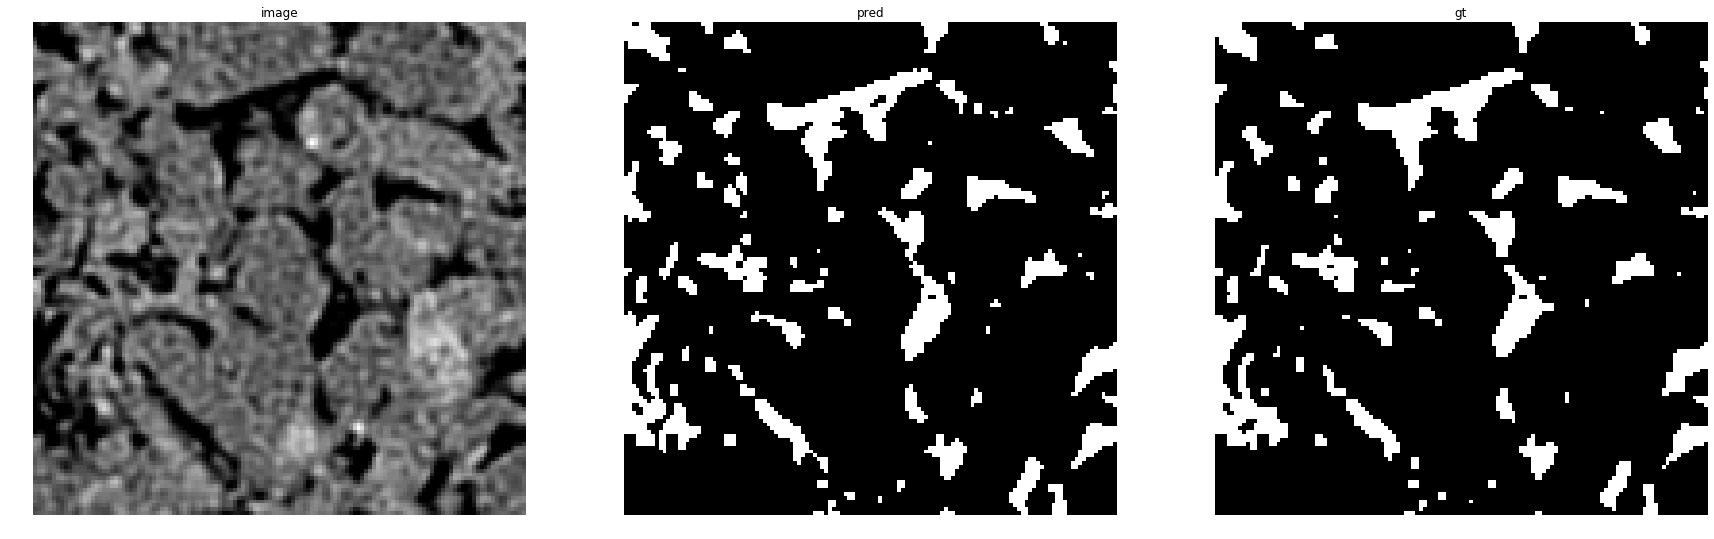

accuracy    : 0.9765625
precision   : 0.8849372384937239
recall      : 0.9509892086330936
f1          : 0.9167750325097529
pr_auc      : 0.9837518810897797
iou         : 0.8463385354141657


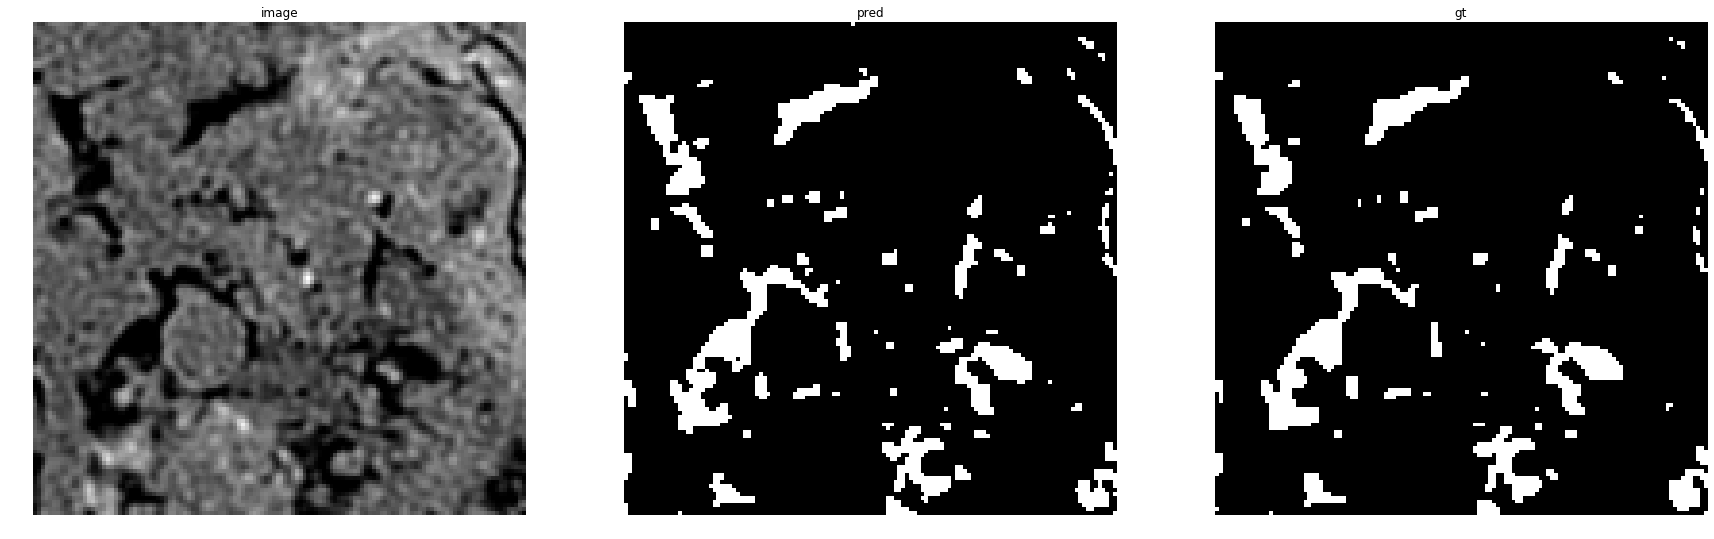

accuracy    : 0.9830322265625
precision   : 0.8747086247086248
recall      : 0.9597186700767263
f1          : 0.9152439024390244
pr_auc      : 0.9844975491579704
iou         : 0.8437324339516582


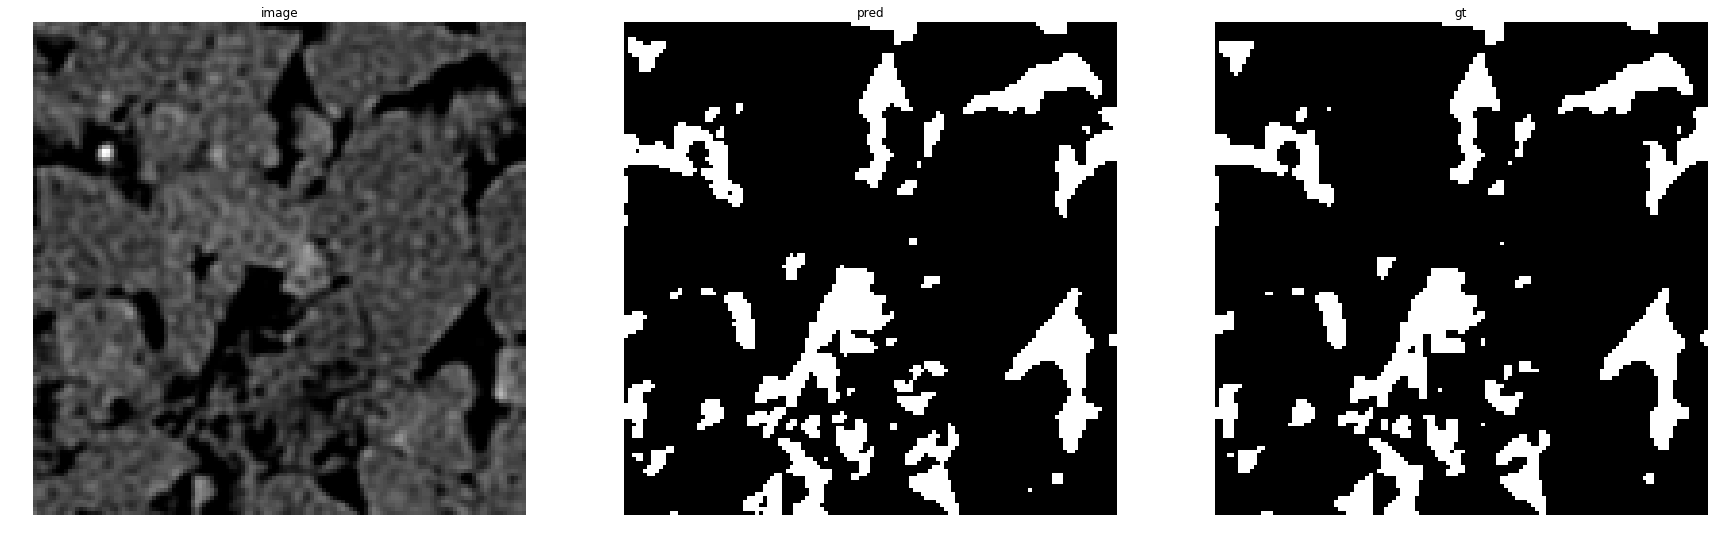

accuracy    : 0.98150634765625
precision   : 0.9250700280112045
recall      : 0.9674112046869279
f1          : 0.9457669590119921
pr_auc      : 0.9922404335055189
iou         : 0.8971137521222411


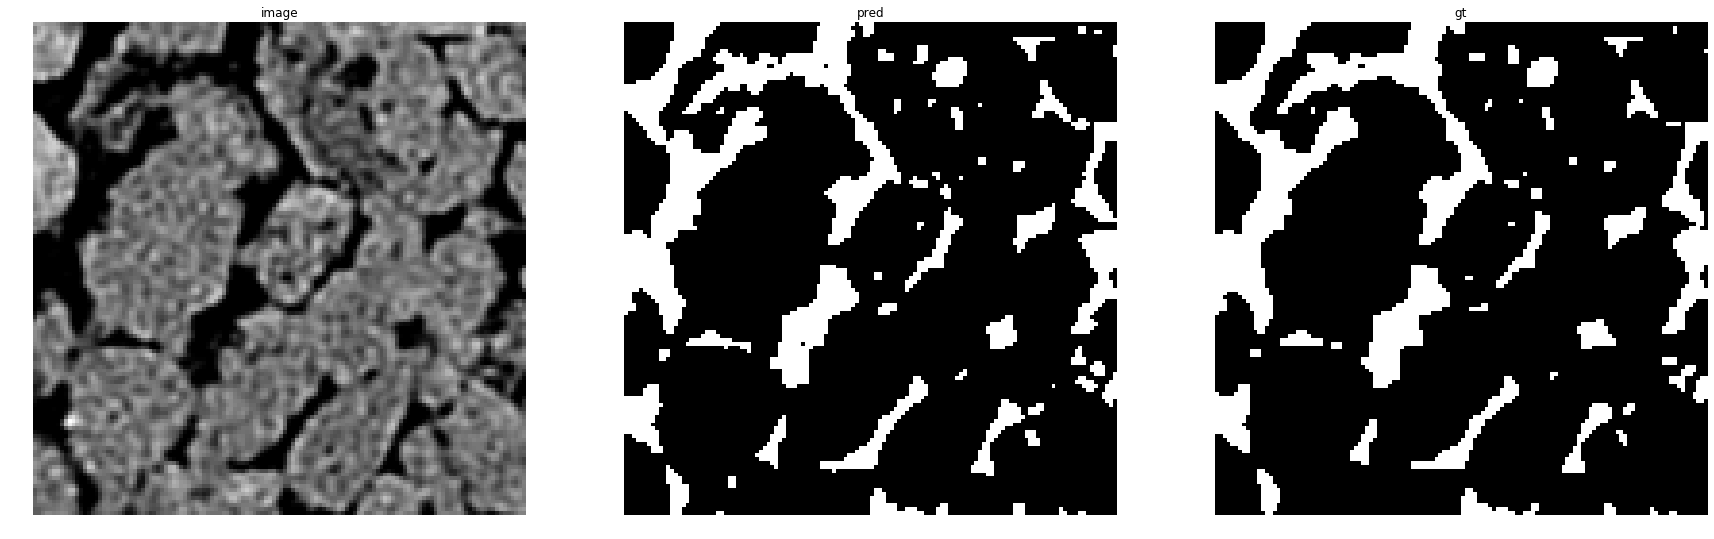

accuracy    : 0.98187255859375
precision   : 0.937192118226601
recall      : 0.9703538412496016
f1          : 0.9534847298355521
pr_auc      : 0.9944145694512164
iou         : 0.911104459742592


In [24]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    print(stack_name)
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, fig_path=None)
            cnt -= 1
            
        if cnt == 0:
            break

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 676.91it/s]
100%|██████████| 700/700 [00:07<00:00, 92.47it/s] 


In [31]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 217268.74it/s]
25200it [02:08, 195.95it/s]
100%|██████████| 25200/25200 [00:08<00:00, 2843.41it/s]


In [32]:
predicted_stack_2 = stack.apply(
    model, 
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 109333.78it/s]
25200it [02:09, 194.37it/s]
100%|██████████| 25200/25200 [00:01<00:00, 13709.53it/s]


In [33]:
predicted_stack_3 = stack.apply(
    model, 
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 218592.03it/s]
25200it [02:21, 178.40it/s]
100%|██████████| 25200/25200 [00:02<00:00, 10588.66it/s]


In [34]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.8507397871385567

In [35]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8501195187587547

In [36]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8501505746373484

In [37]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.8640244025617511

In [39]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.981631
precision   : 0.919325
recall      : 0.919377
f1          : 0.919351
pr_auc      : 0.980822
iou         : 0.850740


In [ ]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=True, preds=True)

## Validate dependence between metrics and distance to patch center

In [21]:
from visualization_utils import output_to_binary

In [25]:
import torch

In [36]:
import pandas as pd

In [62]:
df_agg = None

for i, (img, gt) in tqdm(enumerate(dataloaders_test['../../data/carbRNF'])):
    pred = model(torch.from_numpy(img)).cpu().data.numpy()
    binary = output_to_binary(pred, threshold=0.5, mode='batch')
    
    h, w = binary.shape[1:]
    x = np.arange(h).reshape(-1, 1)
    x = x.repeat(w, axis=1)
    y = np.arange(w).reshape(1, -1)
    y = y.repeat(h, axis=0)
    r = np.sqrt(np.square(x - (h - 1) / 2) + np.square(y - (w - 1) / 2))
    r = r.reshape(1, *r.shape).repeat(binary.shape[0], axis=0).flatten()
    tp = ((binary == 1) & (gt == 1)).astype(np.float32).flatten()
    fp = ((binary == 1) & (gt == 0)).astype(np.float32).flatten()
    fn = ((binary == 0) & (gt == 1)).astype(np.float32).flatten()
    
    df = pd.DataFrame(data={'r': r, 'tp': tp, 'fp': fp, 'fn': fn})
    df['r'] = df['r'].astype('int')
    df['count'] = 1
    if df_agg is None:
        df_agg = df.groupby(by='r').agg({'count': 'sum',
                                         'tp': 'sum',
                                         'fp': 'sum',
                                         'fn': 'sum'})
        
        portion = df.groupby(by='r').agg({'count': 'sum',
                                         'tp': 'sum',
                                         'fp': 'sum',
                                         'fn': 'sum'})
        df_agg = df_agg + portion
    
#     if i > 20:
#         break



0it [00:00, ?it/s]

1it [00:02,  2.39s/it]

2it [00:04,  2.30s/it]

3it [00:06,  2.14s/it]

4it [00:08,  2.04s/it]

5it [00:10,  2.03s/it]

6it [00:12,  2.03s/it]

7it [00:13,  1.95s/it]

8it [00:15,  1.91s/it]

9it [00:17,  1.93s/it]

10it [00:19,  1.87s/it]

11it [00:21,  1.84s/it]

12it [00:22,  1.81s/it]

13it [00:24,  1.80s/it]

14it [00:26,  1.78s/it]

15it [00:28,  1.77s/it]

16it [00:29,  1.77s/it]

17it [00:31,  1.77s/it]

18it [00:33,  1.76s/it]

19it [00:35,  1.76s/it]

20it [00:36,  1.75s/it]

21it [00:38,  1.76s/it]

22it [00:40,  1.76s/it]

23it [00:42,  1.76s/it]

24it [00:43,  1.77s/it]

25it [00:45,  1.80s/it]

26it [00:47,  1.78s/it]

27it [00:49,  1.77s/it]

28it [00:51,  1.77s/it]

29it [00:52,  1.77s/it]

30it [00:54,  1.76s/it]

31it [00:56,  1.76s/it]

32it [00:58,  1.76s/it]

33it [00:59,  1.76s/it]

34it [01:01,  1.76s/it]

35it [01:03,  1.75s/it]

36it [01:05,  1.76s/it]

37it [01:06,  1.76s/it]

38it [01:08,  1.76s/it]

39it [01:10,  1.76s/it]

40it [01:12,

259it [07:44,  1.73s/it]

In [63]:
df_agg

count      tp     fp     fn
r                              
0     256    20.0    4.0    0.0
1     512    44.0   12.0    0.0
2    1280   130.0   16.0    6.0
3    1280   124.0    4.0   14.0
4    1792   154.0    6.0    8.0
5    2048   156.0   30.0   20.0
6    2816   220.0   22.0   34.0
7    3328   330.0   24.0   38.0
8    3072   324.0   24.0   28.0
9    3840   336.0   22.0   38.0
10   4352   430.0   34.0   36.0
11   4096   456.0   62.0   42.0
12   5888   678.0   38.0   54.0
13   4864   540.0   46.0   54.0
14   6400   632.0   54.0   40.0
15   6144   544.0   56.0   50.0
16   6400   594.0   56.0   68.0
17   6912   700.0   72.0   60.0
18   6656   702.0   78.0   40.0
19   8960   912.0   68.0   82.0
20   8448   924.0   70.0   60.0
21   8448   942.0   74.0   90.0
22   8704   932.0   76.0  102.0
23   8960   912.0   88.0   86.0
24  11008  1068.0  110.0   88.0
25   9728   924.0   84.0   98.0
26  10496  1048.0  114.0  122.0
27  11520  1142.0  126.0  100.0
28  11008  1070.0  110.0   82.0
29  11776  1062.0  114.0   78.0
..    ...     ...    ...    ...
60  24320  2366.0  180.0  178.0
61  26368  2554.0  190.0  196.0
62  25344  2414.0  166.0  274.0
63  25600  2440.0  152.0  232.0
64  19712  1902.0  150.0  222.0
65  20224  2022.0  138.0  200.0
66  17408  1678.0  138.0  194.0
67  16128  1538.0  126.0  192.0
68  14592  1438.0  116.0  166.0
69  12288  1254.0  104.0  132.0
70  14592  1588.0  110.0  162.0
71  11008  1142.0   94.0  160.0
72  11520  1368.0   82.0  134.0
73  10240  1200.0   86.0  132.0
74   8960   994.0   54.0  112.0
75   9472  1044.0   66.0   96.0
76   7168   770.0   36.0   80.0
77   7936   846.0   48.0  102.0
78   6400   666.0   44.0   66.0
79   6400   680.0   40.0   86.0
80   5632   584.0   42.0   84.0
81   3840   364.0   30.0   46.0
82   5376   518.0   26.0   64.0
83   3072   346.0   10.0   52.0
84   4352   484.0   28.0   42.0
85   1792   186.0    6.0   16.0
86   2304   192.0   10.0   22.0
87   1536   140.0    4.0   16.0
88    768    84.0    2.0    4.0
89    768    76.0    6.0   14.0

[90 rows x 4 columns]

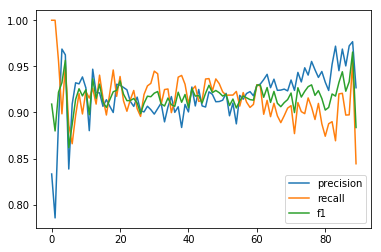

In [65]:
precision = df_agg['tp'] / (df_agg['tp'] + df_agg['fp'])
recall = df_agg['tp'] / (df_agg['tp'] + df_agg['fn'])
plt.plot(df_agg.index, precision, label='precision')
plt.plot(df_agg.index, recall, label='recall')
plt.plot(df_agg.index, 2 * precision * recall / (precision + recall), label='f1')
plt.legend(loc='best')
plt.show()

In [76]:
(2 * precision * recall / (precision + recall)).mean()

0.9169255

In [74]:
np.mean(results['test_metrics']['../../data/carb96558']['f1'])

0.9757604510306116

In [75]:
np.mean(results['test_metrics']['../../data/carbRNF']['f1'])

0.9172696807633565

In [77]:
np.mean(results['test_metrics']['../../data/carbRNF']['iou'])

0.8471886630965806

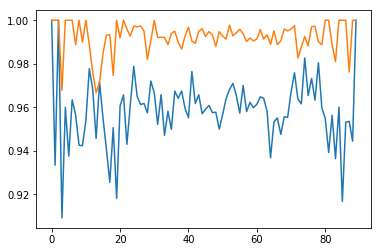

In [60]:
precision = df_agg['tp'] / (df_agg['tp'] + df_agg['fp'])
recall = df_agg['tp'] / (df_agg['tp'] + df_agg['fn'])
plt.plot(df_agg.index, precision)
plt.plot(df_agg.index, recall)
plt.show()